In [1]:
from pathlib import Path
checkpoint = Path('/').joinpath('workspace', 'outputs', '2020-07-18', '09-35-56')
checkpoint

PosixPath('/workspace/outputs/2020-07-18/09-35-56')

In [2]:
import torch
import pytorch_lightning as pl
import torchvision
from torchvision.transforms.functional import to_pil_image
from torchvision.utils import make_grid
import hydra
import yaml
import matplotlib.pyplot as plt

In [3]:
from src.model import Encoder, Decoder
from src.integrated_model import IntegratedModel
from src.patch import make_patch2d

In [4]:
with open(checkpoint.joinpath('.hydra', 'config.yaml')) as file:
    config = hydra.utils.DictConfig(yaml.safe_load(file))
print(config)

{'callback': {'callbacks': None, 'checkpoint': {'class': 'pytorch_lightning.callbacks.ModelCheckpoint', 'params': {'filepath': None, 'mode': 'auto', 'monitor': 'val_loss', 'save_top_k': 1, 'verbose': False}}, 'early_stopping': {'class': 'pytorch_lightning.callbacks.EarlyStopping', 'params': {'min_delta': 0, 'mode': 'auto', 'monitor': 'val_loss', 'patience': '${hparams.early_stopping}', 'verbose': False}}}, 'dataset': {'class': 'src.dataset.adobe_font_char_images', 'params': {'root': '/dataset/'}}, 'dataset_output_n': 52, 'experiment_name': 'tesutodesu', 'hparams': {'batch_size': 1024, 'dataset_n': 0, 'dataset_n_splits': 5, 'early_stopping': 200, 'latent_dim': 256, 'lr': 0.001, 'max_epochs': 100000, 'min_epochs': 1, 'n_pow': 1, 'num_workers': 6, 'patch_size': 15, 'seed': 0, 'test_patch_n': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512], 'train_patch_n': [1, 2, 4, 8, 16, 32, 64, 128, 256]}, 'loggers': [{'class': 'pytorch_lightning.loggers.TensorBoardLogger', 'params': {'name': '', 'save_dir': '

In [5]:
encoder = Encoder(**config.model_params.encoder)
decoder = Decoder(**config.model_params.decoder)

In [6]:
import glob

model_checkpoint = glob.glob(str(checkpoint / '**' / '*.ckpt'), recursive=True)
assert len(model_checkpoint) == 1
model_checkpoint = model_checkpoint[0]

In [7]:
transform = torchvision.transforms.Compose([hydra.utils.instantiate(i) for i in config.transform]) if config.transform else None
# target_transform = torchvision.transforms.Compose([hydra.utils.instantiate(i) for i in config.target_transform]) if config.target_transform else None
target_transform = None

____, dataset = hydra.utils.instantiate(config.dataset)
dataset.set_transform(transform, target_transform)

100%|██████████| 11804/11804 [00:00<00:00, 17917.04it/s]


In [8]:
model = IntegratedModel.load_from_checkpoint(model_checkpoint, encoder=encoder, decoder=decoder, optim=None, dataset=dataset).cuda()
model

IntegratedModel(
  (encoder): Encoder(
    (linear_0): Linear(in_features=225, out_features=256, bias=True)
    (linear_1): Linear(in_features=256, out_features=256, bias=True)
    (linear_2): Linear(in_features=256, out_features=256, bias=True)
  )
  (decoder): Decoder(
    (linear_0): Linear(in_features=256, out_features=256, bias=True)
    (linear_1): Linear(in_features=256, out_features=256, bias=True)
    (linear_2): Linear(in_features=256, out_features=52, bias=True)
  )
)

In [9]:
a = torch.zeros([1, 1, 1, 15, 15], device='cuda')
a = encoder(a)
print(a.mean().item(), a.var().item())
a = torch.zeros([1, 16, 1, 15, 15], device='cuda')
a = encoder(a)
print(a.mean().item(), a.var().item())
a = torch.zeros([1, 256, 1, 15, 15], device='cuda')
a = encoder(a)
print(a.mean().item(), a.var().item())

print()

a = torch.ones([1, 1, 1, 15, 15], device='cuda')
a = encoder(a)
print(a.mean().item(), a.var().item())
a = torch.ones([1, 16, 1, 15, 15], device='cuda')
a = encoder(a)
print(a.mean().item(), a.var().item())
a = torch.ones([1, 256, 1, 15, 15], device='cuda')
a = encoder(a)
print(a.mean().item(), a.var().item())


0.00893145240843296 0.057576734572649
0.00893145240843296 0.057576734572649
0.008931449614465237 0.05757672339677811

0.003937305882573128 0.013961881399154663
0.003937305882573128 0.013961881399154663
0.003937315195798874 0.01396190095692873


227.0
0 AGaramondPro-BoldItalic capA


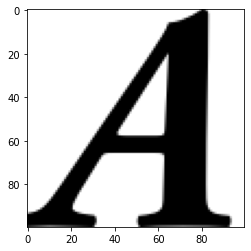


(true_class == predicted_class).item()=True
capA 0.9994632601737976
capA 0.9994632601737976


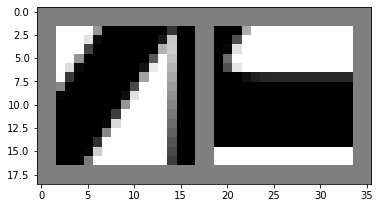


(true_class == predicted_class).item()=True
capA 0.9966289401054382
capA 0.9966289401054382


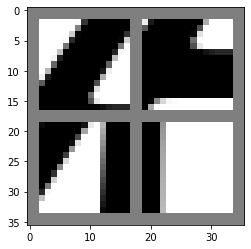


(true_class == predicted_class).item()=True
capA 0.9999988079071045
capA 0.9999988079071045


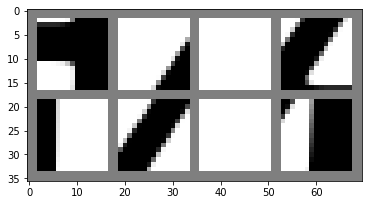


1 AGaramondPro-BoldItalic capB


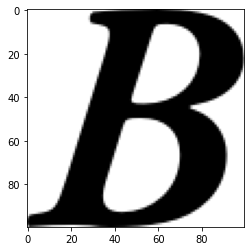


(true_class == predicted_class).item()=True
capB 0.8324379324913025
capB 0.8324379324913025


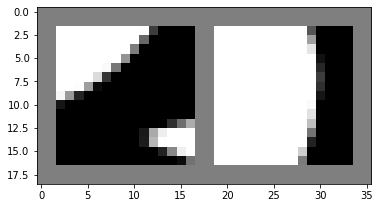


(true_class == predicted_class).item()=True
capB 0.9961394667625427
capB 0.9961394667625427


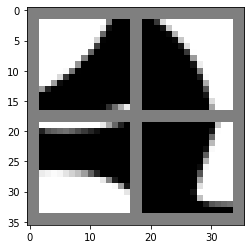


(true_class == predicted_class).item()=True
capB 0.9980713725090027
capB 0.9980713725090027


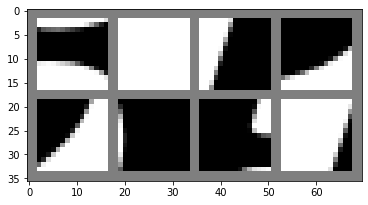


2 AGaramondPro-BoldItalic capC


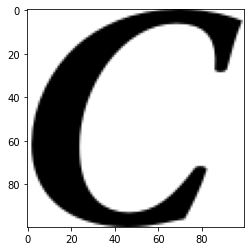


(true_class == predicted_class).item()=False
capC 0.028757881373167038
capE 0.9083126783370972


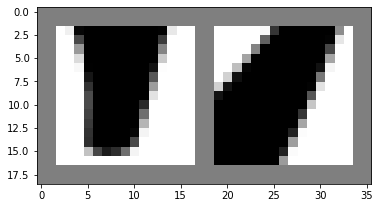


(true_class == predicted_class).item()=True
capC 0.9848301410675049
capC 0.9848301410675049


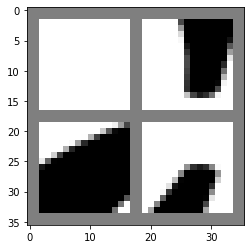


(true_class == predicted_class).item()=True
capC 0.8590112328529358
capC 0.8590112328529358


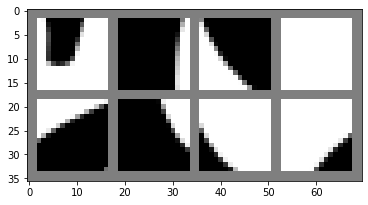


3 AGaramondPro-BoldItalic capD


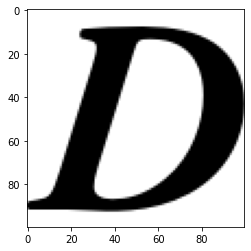


(true_class == predicted_class).item()=True
capD 0.6893273591995239
capD 0.6893273591995239


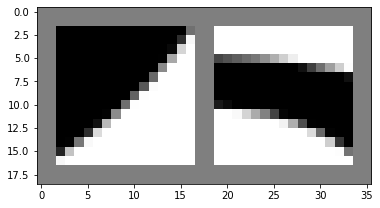


(true_class == predicted_class).item()=True
capD 0.9996346235275269
capD 0.9996346235275269


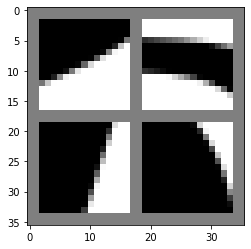


(true_class == predicted_class).item()=True
capD 0.9999735355377197
capD 0.9999735355377197


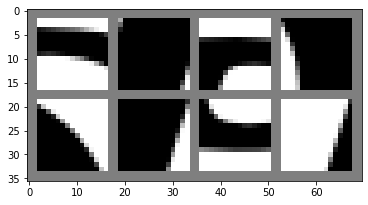


4 AGaramondPro-BoldItalic capE


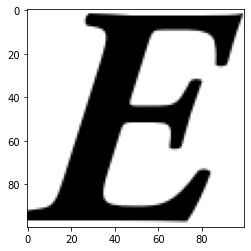


(true_class == predicted_class).item()=True
capE 0.9480504989624023
capE 0.9480504989624023


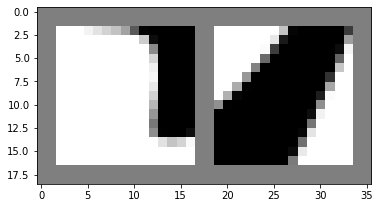


(true_class == predicted_class).item()=True
capE 0.999169111251831
capE 0.999169111251831


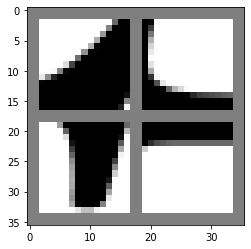


(true_class == predicted_class).item()=True
capE 0.8570591807365417
capE 0.8570591807365417


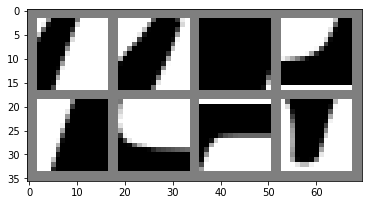


5 AGaramondPro-BoldItalic capF


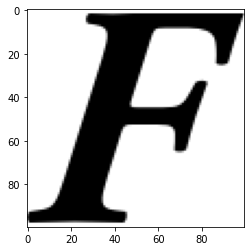


(true_class == predicted_class).item()=False
capF 0.45444315671920776
capE 0.5455175042152405


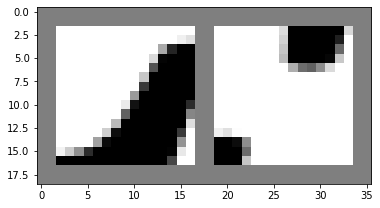


(true_class == predicted_class).item()=False
capF 0.4616752564907074
capE 0.5383208990097046


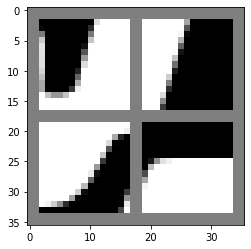


(true_class == predicted_class).item()=True
capF 0.6909995675086975
capF 0.6909995675086975


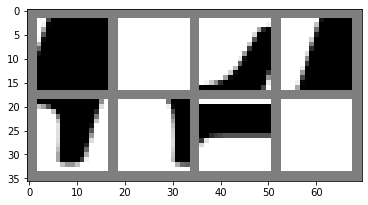


6 AGaramondPro-BoldItalic capG


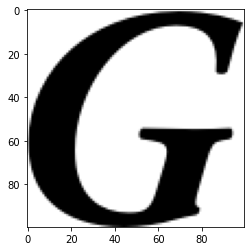


(true_class == predicted_class).item()=True
capG 0.9982529282569885
capG 0.9982529282569885


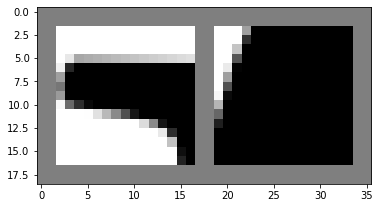


(true_class == predicted_class).item()=False
capG 0.3976685106754303
capC 0.5870431661605835


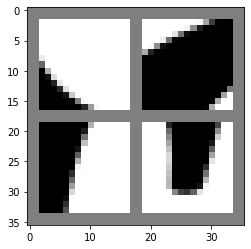


(true_class == predicted_class).item()=True
capG 0.9991894364356995
capG 0.9991894364356995


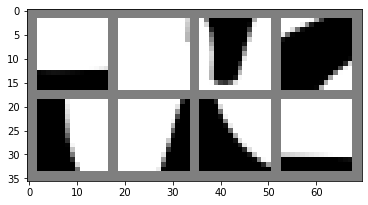


7 AGaramondPro-BoldItalic capH


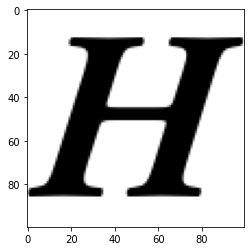


(true_class == predicted_class).item()=True
capH 0.9681459665298462
capH 0.9681459665298462


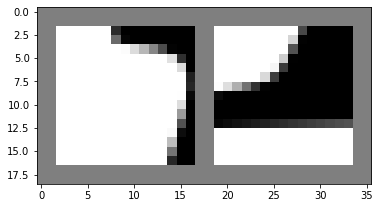


(true_class == predicted_class).item()=True
capH 0.9999523162841797
capH 0.9999523162841797


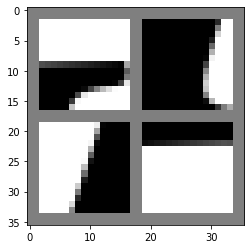


(true_class == predicted_class).item()=True
capH 0.9999805688858032
capH 0.9999805688858032


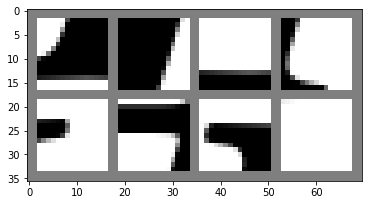


8 AGaramondPro-BoldItalic capI


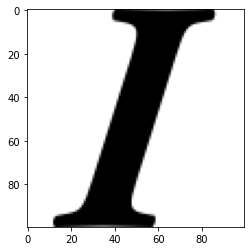


(true_class == predicted_class).item()=True
capI 0.37262311577796936
capI 0.37262311577796936


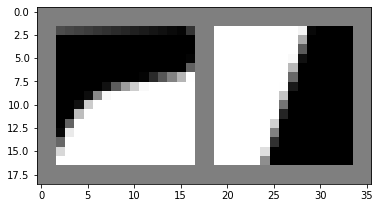


(true_class == predicted_class).item()=True
capI 0.6736555099487305
capI 0.6736555099487305


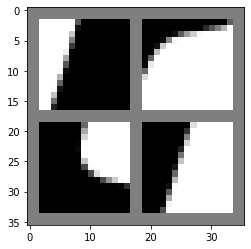


(true_class == predicted_class).item()=True
capI 0.9633198976516724
capI 0.9633198976516724


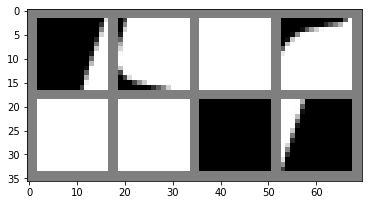


9 AGaramondPro-BoldItalic capJ


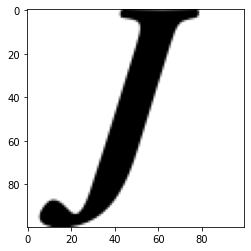


(true_class == predicted_class).item()=True
capJ 0.8094291687011719
capJ 0.8094291687011719


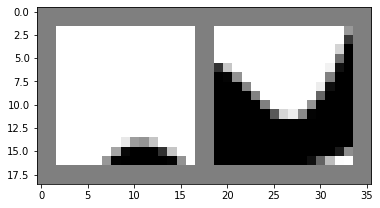


(true_class == predicted_class).item()=True
capJ 0.620334267616272
capJ 0.620334267616272


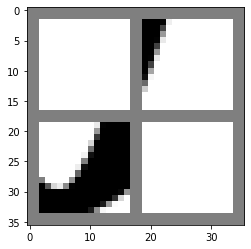


(true_class == predicted_class).item()=True
capJ 0.998244047164917
capJ 0.998244047164917


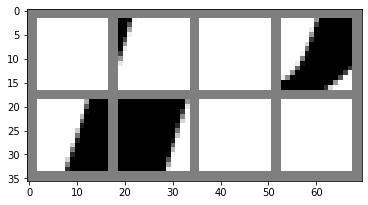


10 AGaramondPro-BoldItalic capK


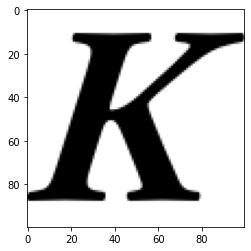


(true_class == predicted_class).item()=True
capK 0.9110327363014221
capK 0.9110327363014221


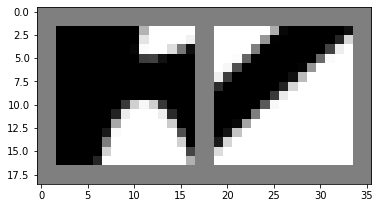


(true_class == predicted_class).item()=True
capK 0.9337639212608337
capK 0.9337639212608337


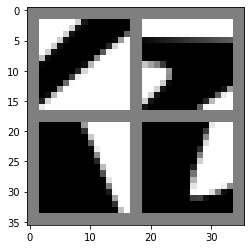


(true_class == predicted_class).item()=True
capK 0.999975323677063
capK 0.999975323677063


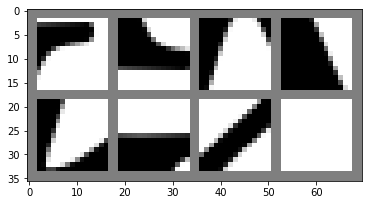


11 AGaramondPro-BoldItalic capL


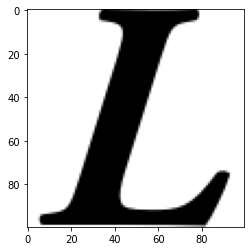


(true_class == predicted_class).item()=True
capL 0.6626999974250793
capL 0.6626999974250793


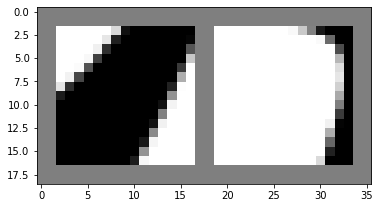


(true_class == predicted_class).item()=True
capL 0.7559938430786133
capL 0.7559938430786133


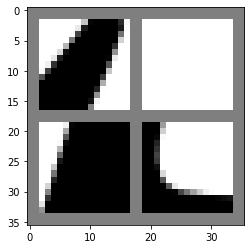


(true_class == predicted_class).item()=True
capL 0.9993545413017273
capL 0.9993545413017273


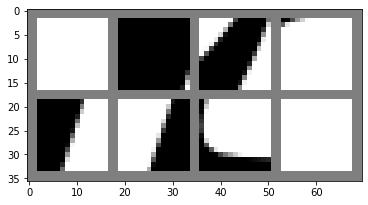


12 AGaramondPro-BoldItalic capM


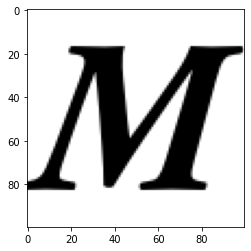


(true_class == predicted_class).item()=True
capM 0.9452698230743408
capM 0.9452698230743408


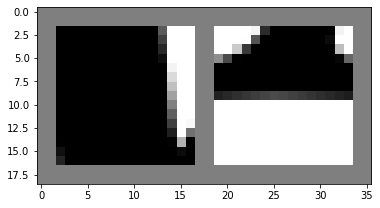


(true_class == predicted_class).item()=True
capM 0.9999971389770508
capM 0.9999971389770508


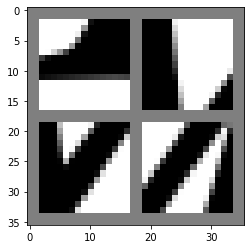


(true_class == predicted_class).item()=True
capM 0.999998927116394
capM 0.999998927116394


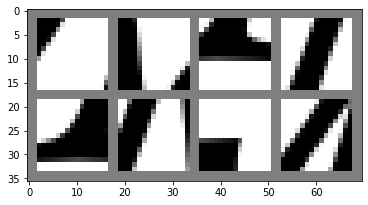


13 AGaramondPro-BoldItalic capN


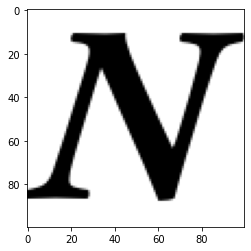


(true_class == predicted_class).item()=True
capN 0.6828457117080688
capN 0.6828457117080688


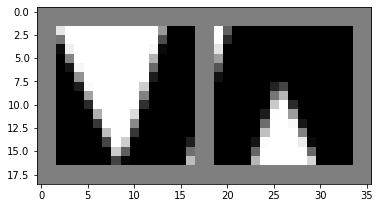


(true_class == predicted_class).item()=True
capN 0.9996309280395508
capN 0.9996309280395508


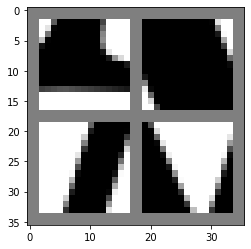


(true_class == predicted_class).item()=True
capN 0.9736133813858032
capN 0.9736133813858032


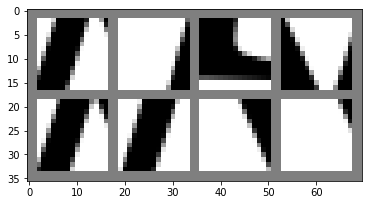


14 AGaramondPro-BoldItalic capO


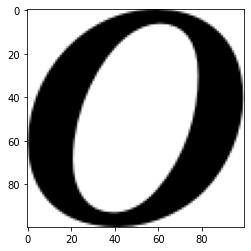


(true_class == predicted_class).item()=True
capO 0.4959964156150818
capO 0.4959964156150818


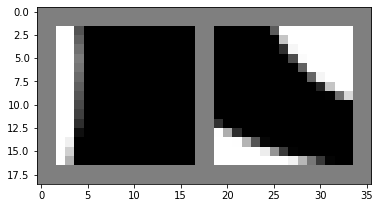


(true_class == predicted_class).item()=True
capO 0.5685019493103027
capO 0.5685019493103027


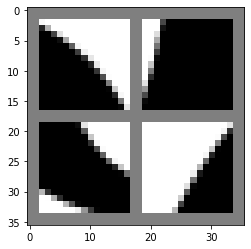


(true_class == predicted_class).item()=True
capO 0.5317383408546448
capO 0.5317383408546448


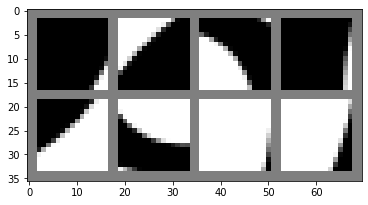


15 AGaramondPro-BoldItalic capP


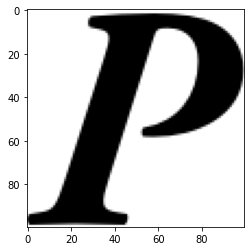


(true_class == predicted_class).item()=True
capP 0.8606388568878174
capP 0.8606388568878174


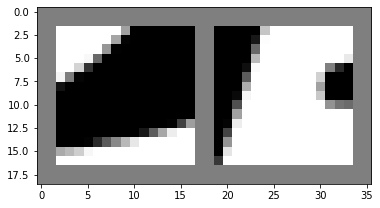


(true_class == predicted_class).item()=True
capP 0.9673956632614136
capP 0.9673956632614136


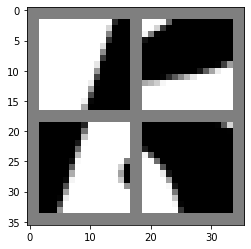


(true_class == predicted_class).item()=True
capP 0.9897279143333435
capP 0.9897279143333435


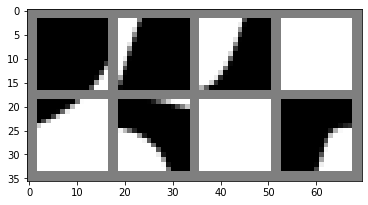


16 AGaramondPro-BoldItalic capQ


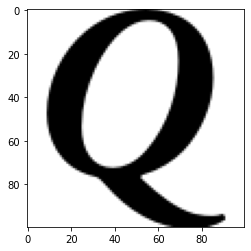


(true_class == predicted_class).item()=True
capQ 0.9951413869857788
capQ 0.9951413869857788


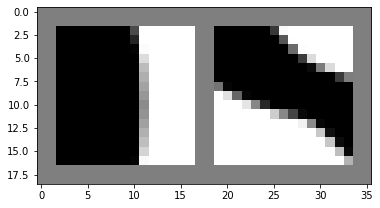


(true_class == predicted_class).item()=True
capQ 0.999962568283081
capQ 0.999962568283081


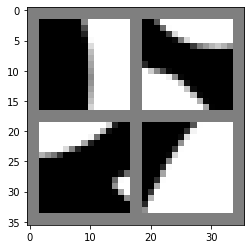


(true_class == predicted_class).item()=True
capQ 0.9999421834945679
capQ 0.9999421834945679


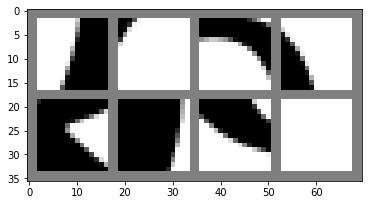


17 AGaramondPro-BoldItalic capR


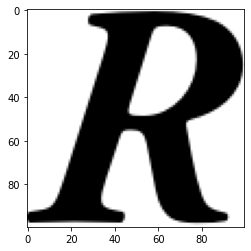


(true_class == predicted_class).item()=True
capR 0.9910529255867004
capR 0.9910529255867004


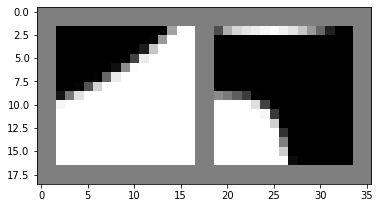


(true_class == predicted_class).item()=True
capR 0.9915880560874939
capR 0.9915880560874939


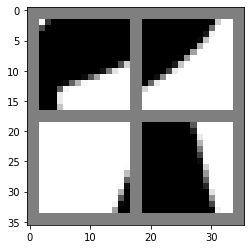


(true_class == predicted_class).item()=True
capR 0.9989816546440125
capR 0.9989816546440125


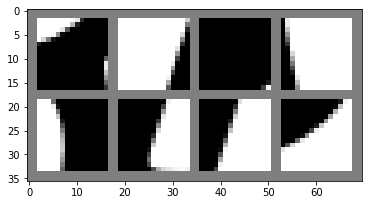


18 AGaramondPro-BoldItalic capS


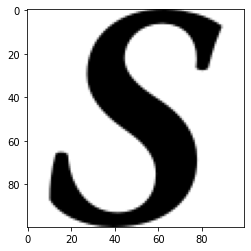


(true_class == predicted_class).item()=True
capS 0.5269523859024048
capS 0.5269523859024048


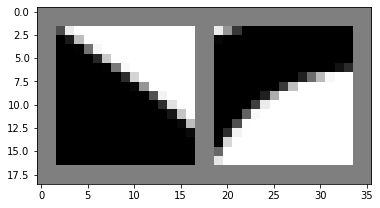


(true_class == predicted_class).item()=True
capS 0.6962248682975769
capS 0.6962248682975769


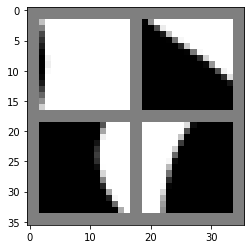


(true_class == predicted_class).item()=False
capS 0.3093911111354828
smallS 0.6906086206436157


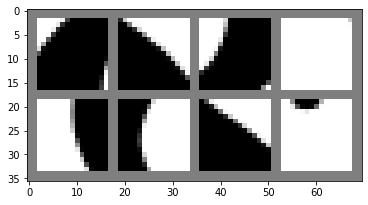


19 AGaramondPro-BoldItalic capT


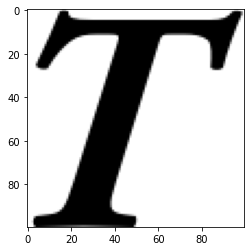


(true_class == predicted_class).item()=True
capT 0.9925093650817871
capT 0.9925093650817871


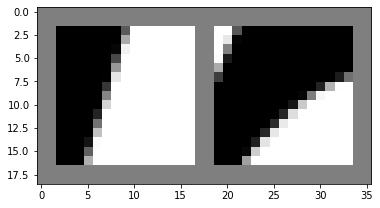


(true_class == predicted_class).item()=True
capT 0.9989814162254333
capT 0.9989814162254333


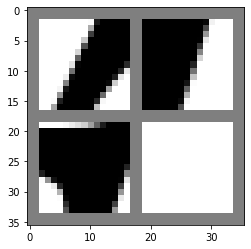


(true_class == predicted_class).item()=True
capT 0.9999792575836182
capT 0.9999792575836182


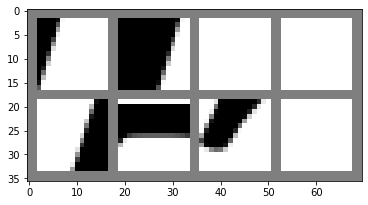


20 AGaramondPro-BoldItalic capU


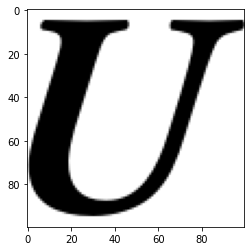


(true_class == predicted_class).item()=True
capU 0.9977849721908569
capU 0.9977849721908569


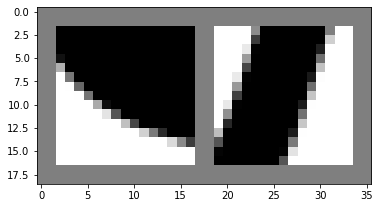


(true_class == predicted_class).item()=True
capU 0.999954104423523
capU 0.999954104423523


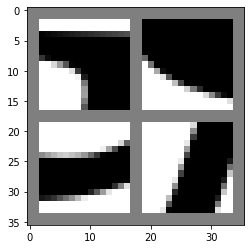


(true_class == predicted_class).item()=True
capU 0.9999942779541016
capU 0.9999942779541016


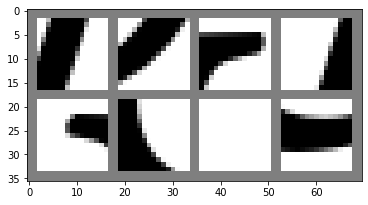


21 AGaramondPro-BoldItalic capV


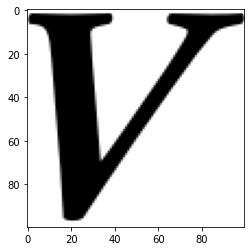


(true_class == predicted_class).item()=True
capV 0.6423031091690063
capV 0.6423031091690063


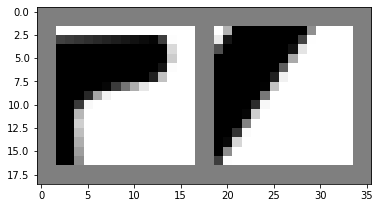


(true_class == predicted_class).item()=True
capV 0.9589782953262329
capV 0.9589782953262329


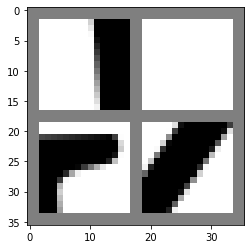


(true_class == predicted_class).item()=True
capV 0.9993714690208435
capV 0.9993714690208435


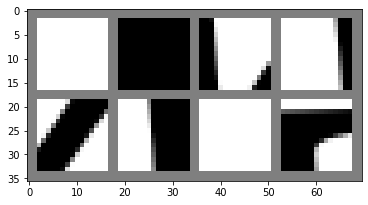


22 AGaramondPro-BoldItalic capW


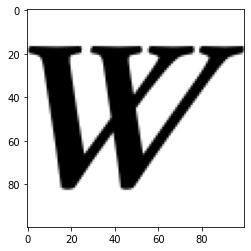


(true_class == predicted_class).item()=True
capW 0.9547182321548462
capW 0.9547182321548462


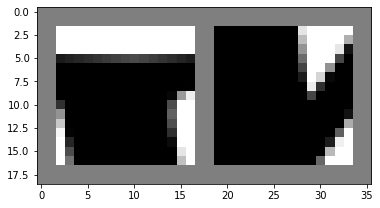


(true_class == predicted_class).item()=True
capW 0.9602446556091309
capW 0.9602446556091309


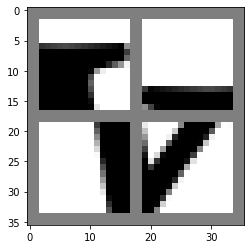


(true_class == predicted_class).item()=True
capW 0.9714745283126831
capW 0.9714745283126831


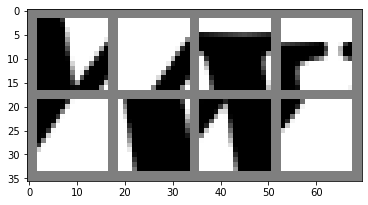


23 AGaramondPro-BoldItalic capX


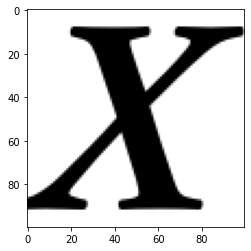


(true_class == predicted_class).item()=True
capX 0.8291918635368347
capX 0.8291918635368347


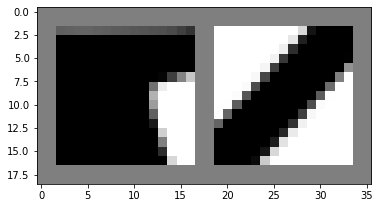


(true_class == predicted_class).item()=True
capX 0.8816017508506775
capX 0.8816017508506775


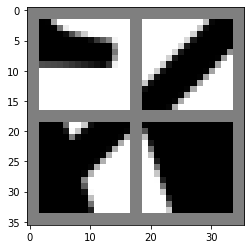


(true_class == predicted_class).item()=True
capX 0.9707330465316772
capX 0.9707330465316772


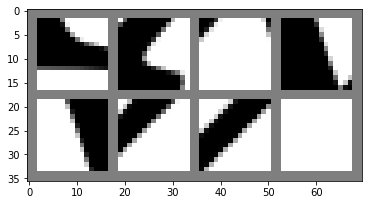


24 AGaramondPro-BoldItalic capY


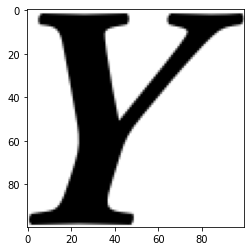


(true_class == predicted_class).item()=True
capY 0.9905675053596497
capY 0.9905675053596497


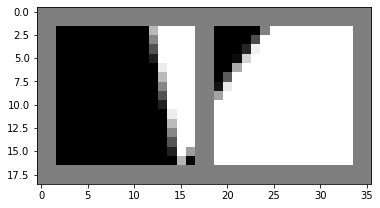


(true_class == predicted_class).item()=True
capY 0.9766075015068054
capY 0.9766075015068054


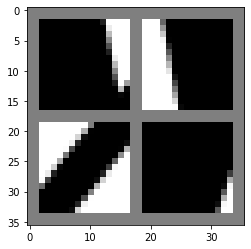


(true_class == predicted_class).item()=True
capY 0.9954498410224915
capY 0.9954498410224915


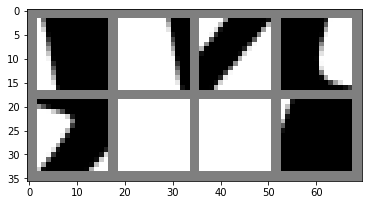


25 AGaramondPro-BoldItalic capZ


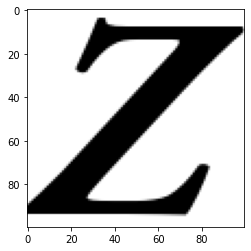


(true_class == predicted_class).item()=True
capZ 0.6537718772888184
capZ 0.6537718772888184


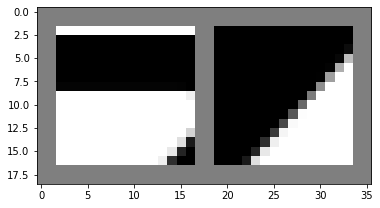


(true_class == predicted_class).item()=True
capZ 0.6185883283615112
capZ 0.6185883283615112


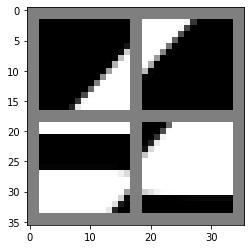


(true_class == predicted_class).item()=True
capZ 0.8880807161331177
capZ 0.8880807161331177


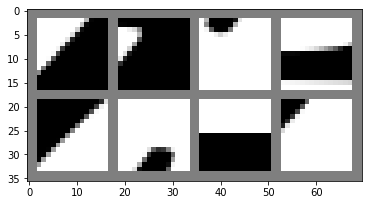


26 AGaramondPro-BoldItalic smallA


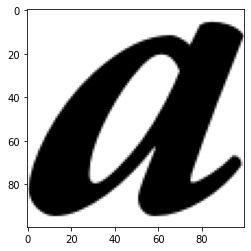


(true_class == predicted_class).item()=True
smallA 0.948494017124176
smallA 0.948494017124176


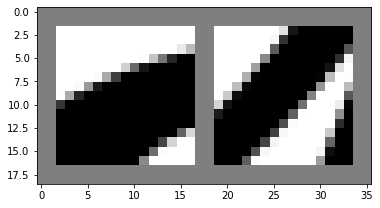


(true_class == predicted_class).item()=True
smallA 0.9630560278892517
smallA 0.9630560278892517


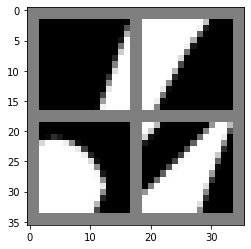


(true_class == predicted_class).item()=True
smallA 0.9917612075805664
smallA 0.9917612075805664


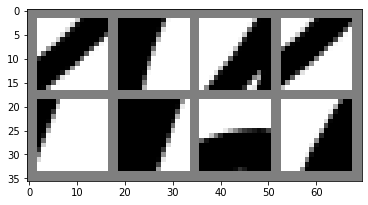


27 AGaramondPro-BoldItalic smallB


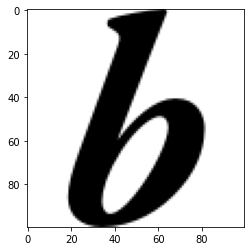


(true_class == predicted_class).item()=True
smallB 0.5509400963783264
smallB 0.5509400963783264


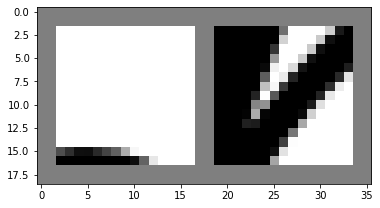


(true_class == predicted_class).item()=True
smallB 0.8473396897315979
smallB 0.8473396897315979


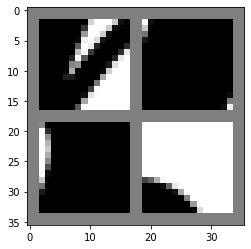


(true_class == predicted_class).item()=True
smallB 0.9871460199356079
smallB 0.9871460199356079


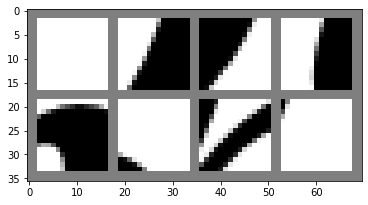


28 AGaramondPro-BoldItalic smallC


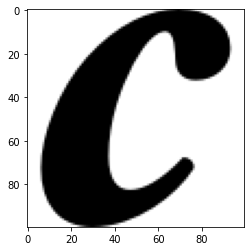


(true_class == predicted_class).item()=True
smallC 0.7787586450576782
smallC 0.7787586450576782


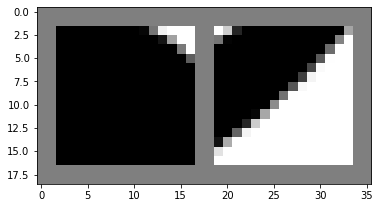


(true_class == predicted_class).item()=True
smallC 0.8313940763473511
smallC 0.8313940763473511


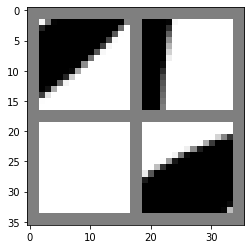


(true_class == predicted_class).item()=True
smallC 0.9976487755775452
smallC 0.9976487755775452


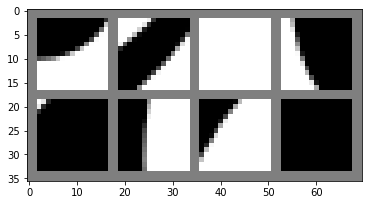


29 AGaramondPro-BoldItalic smallD


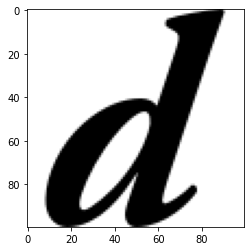


(true_class == predicted_class).item()=True
smallD 0.9904131293296814
smallD 0.9904131293296814


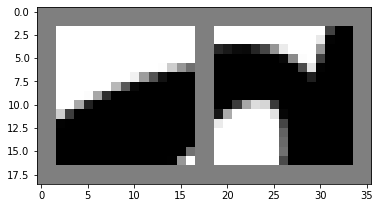


(true_class == predicted_class).item()=True
smallD 0.9882290363311768
smallD 0.9882290363311768


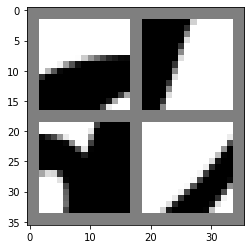


(true_class == predicted_class).item()=True
smallD 0.9999849796295166
smallD 0.9999849796295166


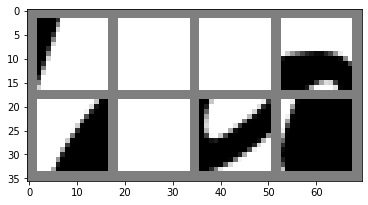


30 AGaramondPro-BoldItalic smallE


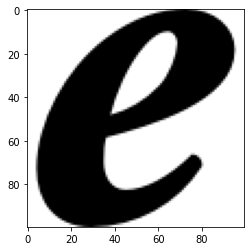


(true_class == predicted_class).item()=True
smallE 0.9849982857704163
smallE 0.9849982857704163


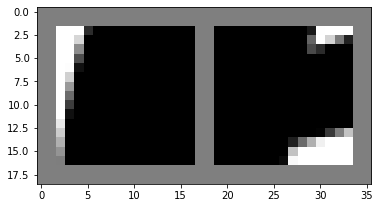


(true_class == predicted_class).item()=True
smallE 0.9984307885169983
smallE 0.9984307885169983


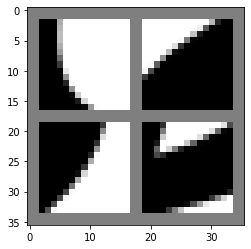


(true_class == predicted_class).item()=True
smallE 0.9999945163726807
smallE 0.9999945163726807


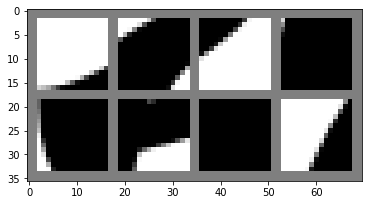


31 AGaramondPro-BoldItalic smallF


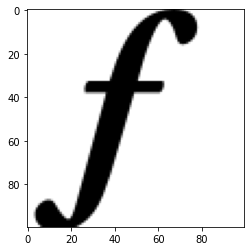


(true_class == predicted_class).item()=True
smallF 0.948515772819519
smallF 0.948515772819519


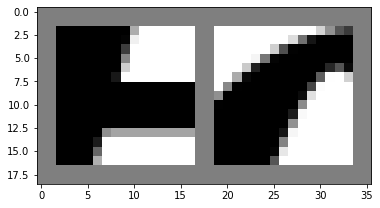


(true_class == predicted_class).item()=True
smallF 0.9920676946640015
smallF 0.9920676946640015


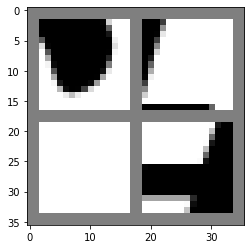


(true_class == predicted_class).item()=True
smallF 0.9982181191444397
smallF 0.9982181191444397


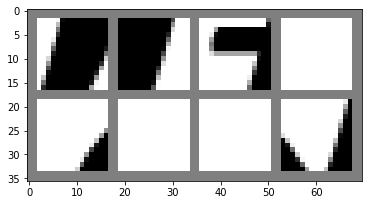


32 AGaramondPro-BoldItalic smallG


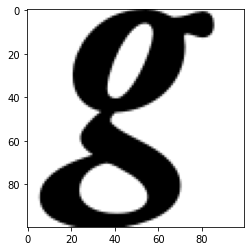


(true_class == predicted_class).item()=True
smallG 0.9999901056289673
smallG 0.9999901056289673


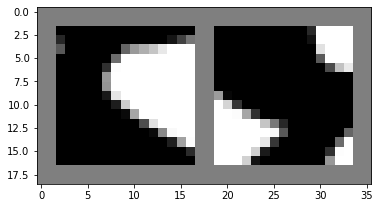


(true_class == predicted_class).item()=True
smallG 0.9999914169311523
smallG 0.9999914169311523


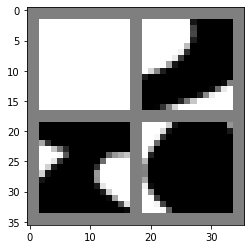


(true_class == predicted_class).item()=True
smallG 0.9999932050704956
smallG 0.9999932050704956


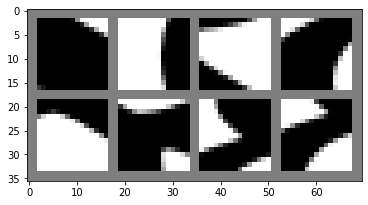


33 AGaramondPro-BoldItalic smallH


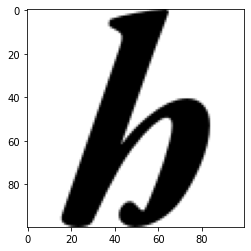


(true_class == predicted_class).item()=True
smallH 0.8318055272102356
smallH 0.8318055272102356


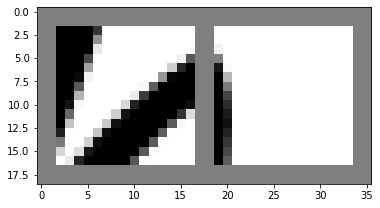


(true_class == predicted_class).item()=False
smallH 0.40998661518096924
smallB 0.48940733075141907


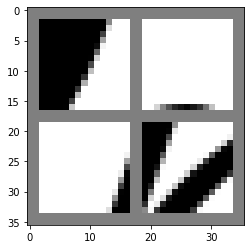


(true_class == predicted_class).item()=True
smallH 0.9671322107315063
smallH 0.9671322107315063


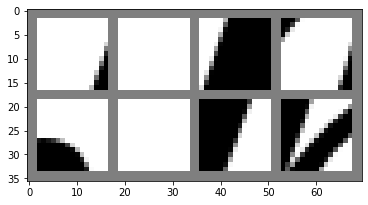


34 AGaramondPro-BoldItalic smallI


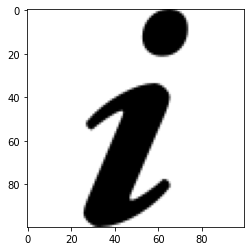


(true_class == predicted_class).item()=True
smallI 0.5414150357246399
smallI 0.5414150357246399


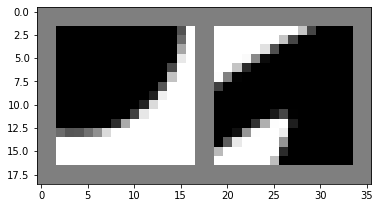


(true_class == predicted_class).item()=True
smallI 0.9771242737770081
smallI 0.9771242737770081


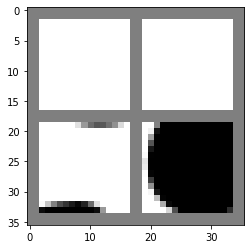


(true_class == predicted_class).item()=True
smallI 0.978789210319519
smallI 0.978789210319519


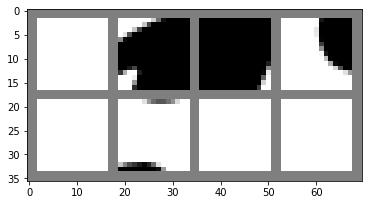


35 AGaramondPro-BoldItalic smallJ


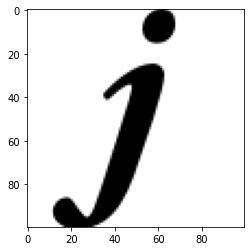


(true_class == predicted_class).item()=True
smallJ 0.8959308862686157
smallJ 0.8959308862686157


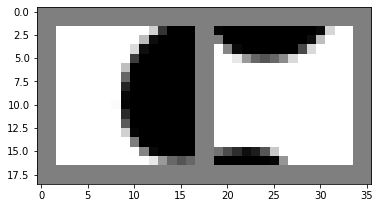


(true_class == predicted_class).item()=True
smallJ 0.9618794918060303
smallJ 0.9618794918060303


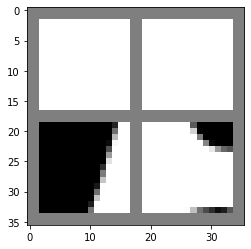


(true_class == predicted_class).item()=True
smallJ 0.9998490810394287
smallJ 0.9998490810394287


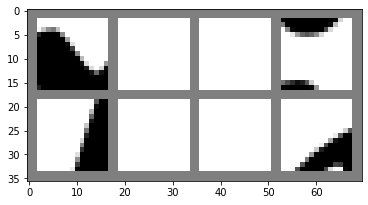


36 AGaramondPro-BoldItalic smallK


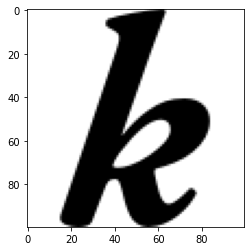


(true_class == predicted_class).item()=False
smallK 0.4914102256298065
capK 0.5075879096984863


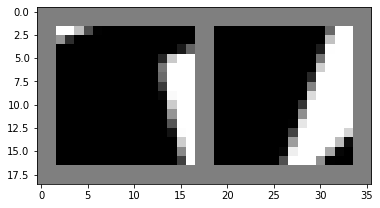


(true_class == predicted_class).item()=True
smallK 0.7205654382705688
smallK 0.7205654382705688


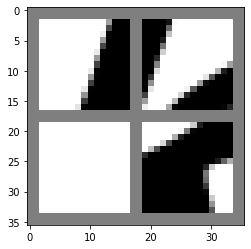


(true_class == predicted_class).item()=True
smallK 0.9993528723716736
smallK 0.9993528723716736


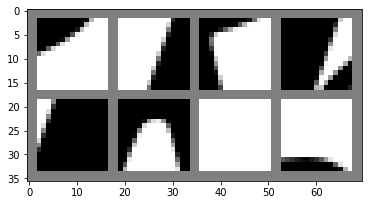


37 AGaramondPro-BoldItalic smallL


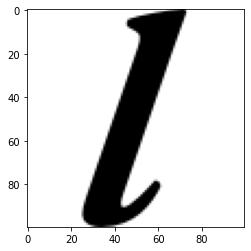


(true_class == predicted_class).item()=True
smallL 0.35862794518470764
smallL 0.35862794518470764


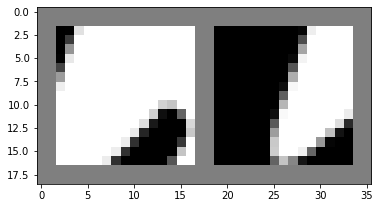


(true_class == predicted_class).item()=True
smallL 0.8719785213470459
smallL 0.8719785213470459


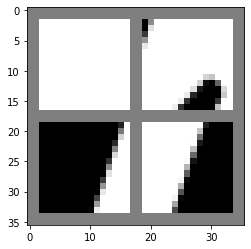


(true_class == predicted_class).item()=True
smallL 0.9949042797088623
smallL 0.9949042797088623


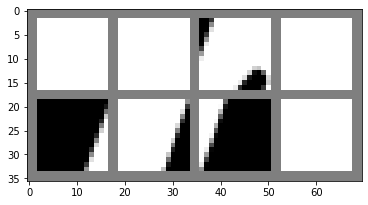


38 AGaramondPro-BoldItalic smallM


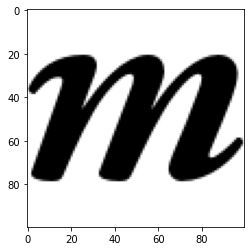


(true_class == predicted_class).item()=False
smallM 0.43277832865715027
smallN 0.4334656596183777


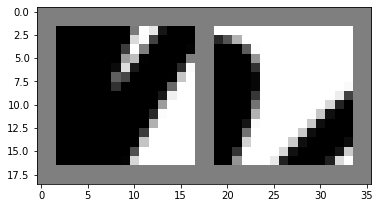


(true_class == predicted_class).item()=True
smallM 0.9994277358055115
smallM 0.9994277358055115


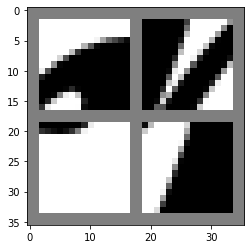


(true_class == predicted_class).item()=True
smallM 0.9999890327453613
smallM 0.9999890327453613


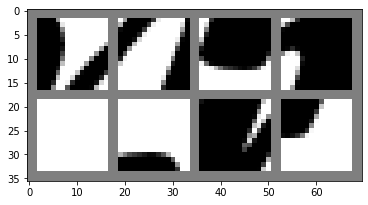


39 AGaramondPro-BoldItalic smallN


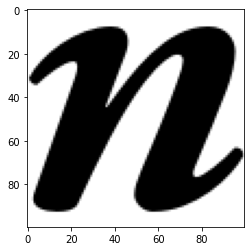


(true_class == predicted_class).item()=True
smallN 0.7831143140792847
smallN 0.7831143140792847


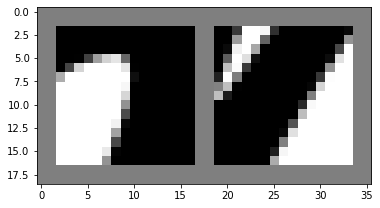


(true_class == predicted_class).item()=True
smallN 0.9828398823738098
smallN 0.9828398823738098


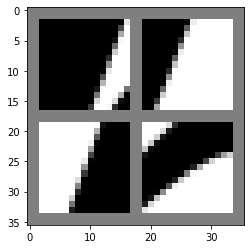


(true_class == predicted_class).item()=True
smallN 0.9999314546585083
smallN 0.9999314546585083


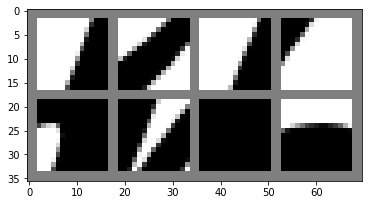


40 AGaramondPro-BoldItalic smallO


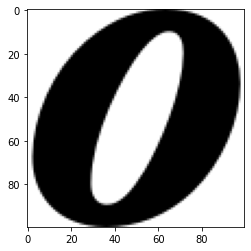


(true_class == predicted_class).item()=True
smallO 0.5196388363838196
smallO 0.5196388363838196


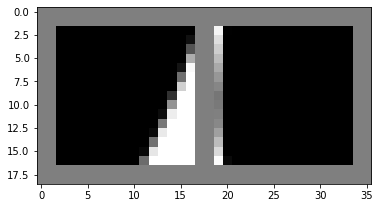


(true_class == predicted_class).item()=False
smallO 0.43489664793014526
capO 0.4587654173374176


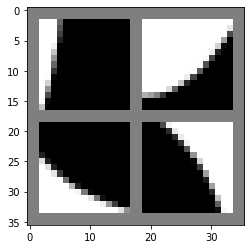


(true_class == predicted_class).item()=True
smallO 0.5499634742736816
smallO 0.5499634742736816


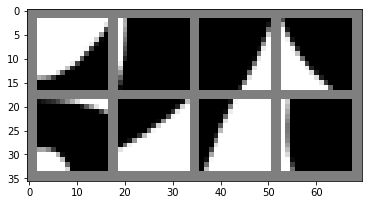


41 AGaramondPro-BoldItalic smallP


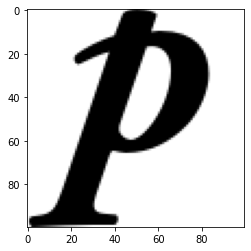


(true_class == predicted_class).item()=False
smallP 0.23038789629936218
capP 0.6222110986709595


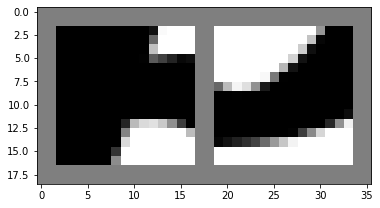


(true_class == predicted_class).item()=True
smallP 0.9999232292175293
smallP 0.9999232292175293


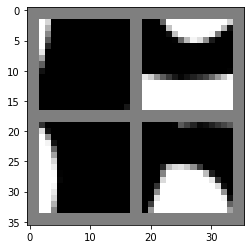


(true_class == predicted_class).item()=True
smallP 0.9993489384651184
smallP 0.9993489384651184


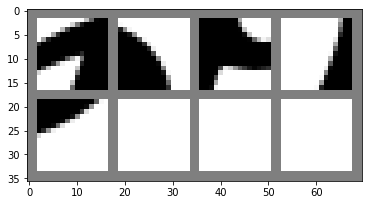


42 AGaramondPro-BoldItalic smallQ


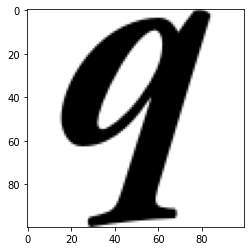


(true_class == predicted_class).item()=True
smallQ 0.8767936825752258
smallQ 0.8767936825752258


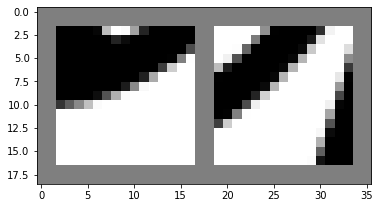


(true_class == predicted_class).item()=True
smallQ 0.5934383869171143
smallQ 0.5934383869171143


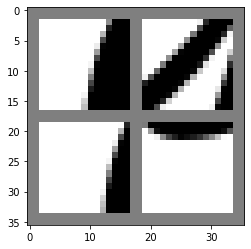


(true_class == predicted_class).item()=True
smallQ 0.9186556935310364
smallQ 0.9186556935310364


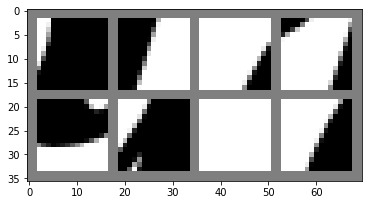


43 AGaramondPro-BoldItalic smallR


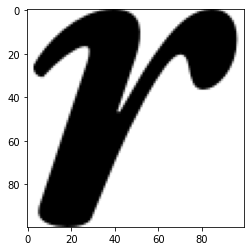


(true_class == predicted_class).item()=True
smallR 0.9162161946296692
smallR 0.9162161946296692


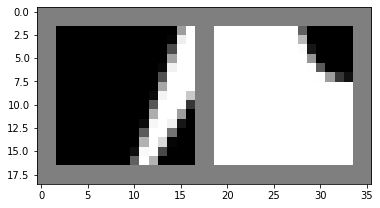


(true_class == predicted_class).item()=True
smallR 0.9997275471687317
smallR 0.9997275471687317


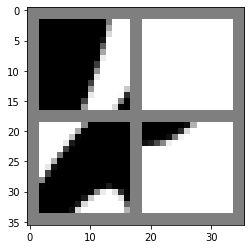


(true_class == predicted_class).item()=True
smallR 0.9999977350234985
smallR 0.9999977350234985


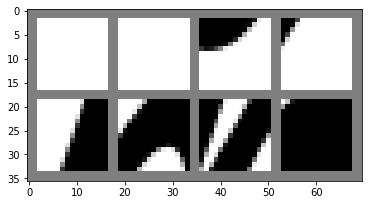


44 AGaramondPro-BoldItalic smallS


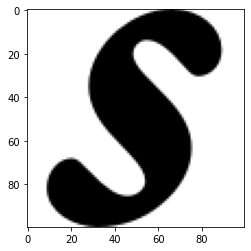


(true_class == predicted_class).item()=False
smallS 0.4381576180458069
capS 0.5606142282485962


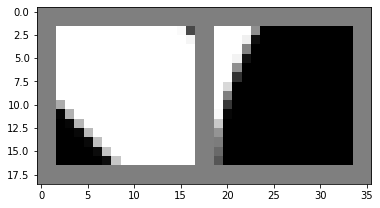


(true_class == predicted_class).item()=True
smallS 0.6767537593841553
smallS 0.6767537593841553


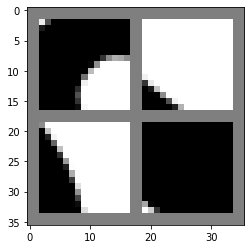


(true_class == predicted_class).item()=True
smallS 0.9969167709350586
smallS 0.9969167709350586


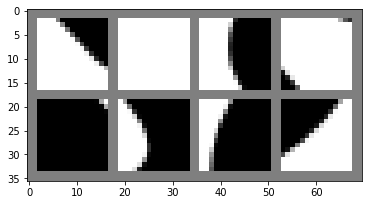


45 AGaramondPro-BoldItalic smallT


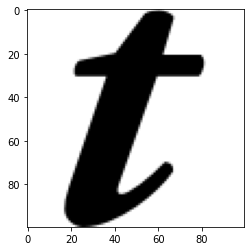


(true_class == predicted_class).item()=False
smallT 0.22341004014015198
capH 0.4361867308616638


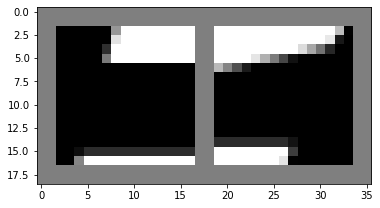


(true_class == predicted_class).item()=True
smallT 0.8646252751350403
smallT 0.8646252751350403


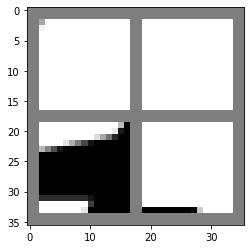


(true_class == predicted_class).item()=True
smallT 0.9997053742408752
smallT 0.9997053742408752


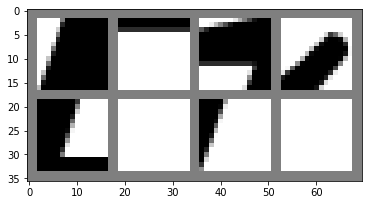


46 AGaramondPro-BoldItalic smallU


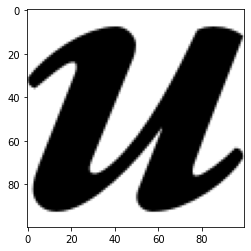


(true_class == predicted_class).item()=True
smallU 0.6793178915977478
smallU 0.6793178915977478


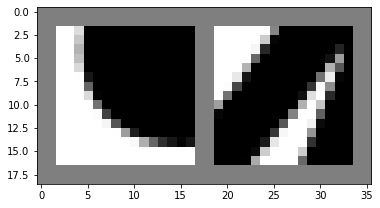


(true_class == predicted_class).item()=True
smallU 0.993881344795227
smallU 0.993881344795227


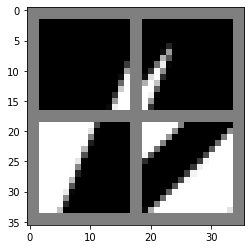


(true_class == predicted_class).item()=True
smallU 0.9994040727615356
smallU 0.9994040727615356


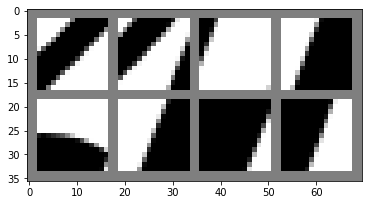


47 AGaramondPro-BoldItalic smallV


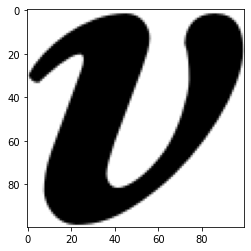


(true_class == predicted_class).item()=True
smallV 0.7631950974464417
smallV 0.7631950974464417


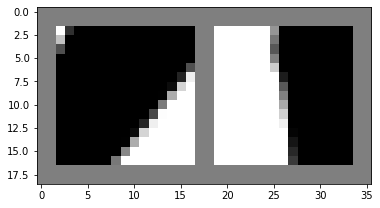


(true_class == predicted_class).item()=True
smallV 0.9805243015289307
smallV 0.9805243015289307


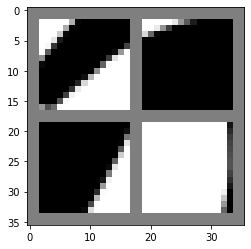


(true_class == predicted_class).item()=True
smallV 0.9972698092460632
smallV 0.9972698092460632


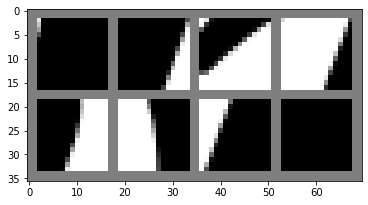


48 AGaramondPro-BoldItalic smallW


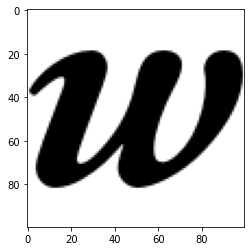


(true_class == predicted_class).item()=False
smallW 0.07584062218666077
smallG 0.7875936627388


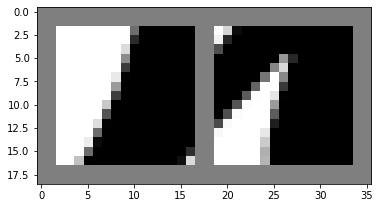


(true_class == predicted_class).item()=True
smallW 0.929549515247345
smallW 0.929549515247345


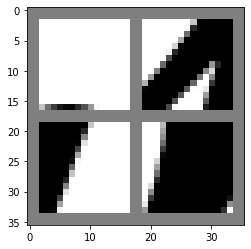


(true_class == predicted_class).item()=True
smallW 0.9968460202217102
smallW 0.9968460202217102


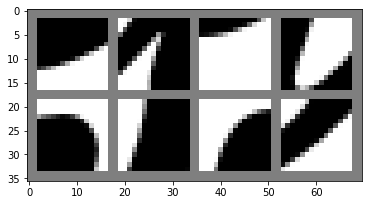


49 AGaramondPro-BoldItalic smallX


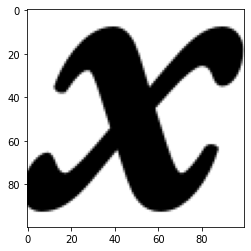


(true_class == predicted_class).item()=True
smallX 0.92328941822052
smallX 0.92328941822052


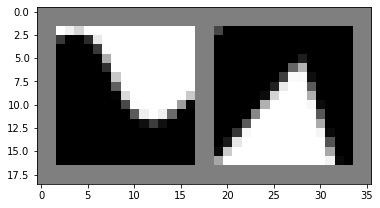


(true_class == predicted_class).item()=True
smallX 0.9896367192268372
smallX 0.9896367192268372


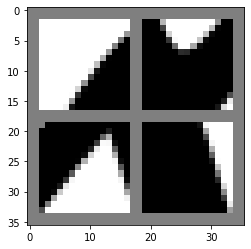


(true_class == predicted_class).item()=True
smallX 0.9998241066932678
smallX 0.9998241066932678


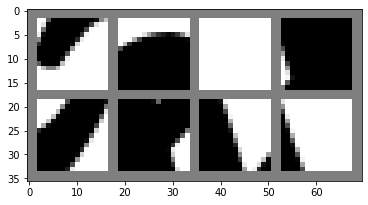


50 AGaramondPro-BoldItalic smallY


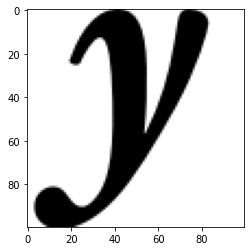


(true_class == predicted_class).item()=False
smallY 0.15268367528915405
smallV 0.7463670969009399


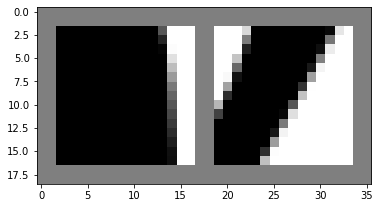


(true_class == predicted_class).item()=True
smallY 0.9992721676826477
smallY 0.9992721676826477


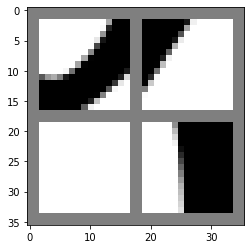


(true_class == predicted_class).item()=True
smallY 0.9993481040000916
smallY 0.9993481040000916


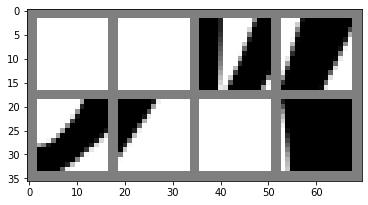


51 AGaramondPro-BoldItalic smallZ


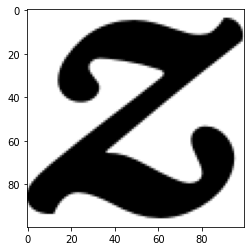


(true_class == predicted_class).item()=True
smallZ 0.9950777292251587
smallZ 0.9950777292251587


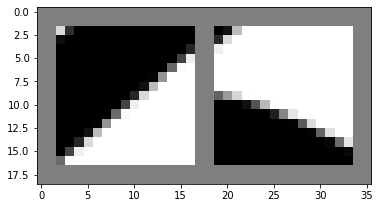


(true_class == predicted_class).item()=True
smallZ 0.998405396938324
smallZ 0.998405396938324


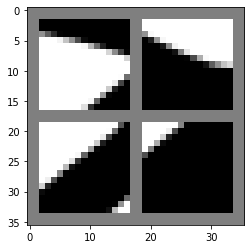


(true_class == predicted_class).item()=True
smallZ 0.9993970394134521
smallZ 0.9993970394134521


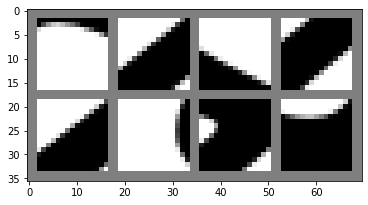


52 AGaramondPro-SemiboldItalic capA


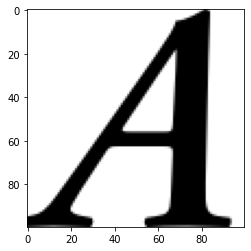


(true_class == predicted_class).item()=True
capA 0.9979433417320251
capA 0.9979433417320251


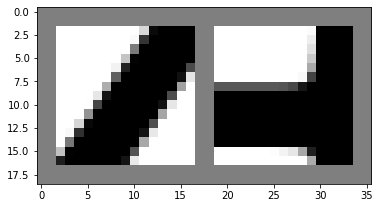


(true_class == predicted_class).item()=True
capA 0.9992116689682007
capA 0.9992116689682007


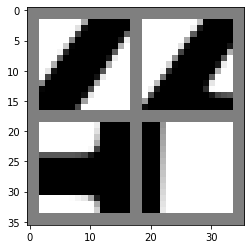


(true_class == predicted_class).item()=True
capA 0.9999964237213135
capA 0.9999964237213135


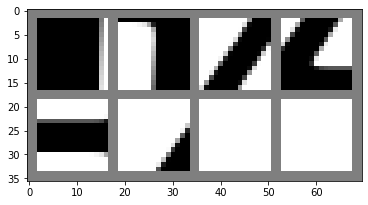


53 AGaramondPro-SemiboldItalic capB


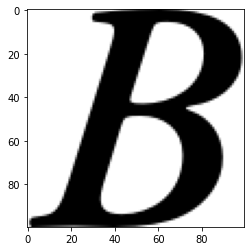


(true_class == predicted_class).item()=True
capB 0.9294231534004211
capB 0.9294231534004211


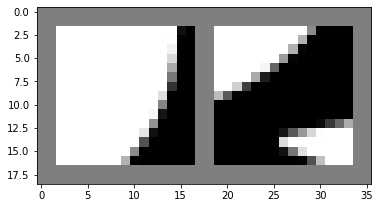


(true_class == predicted_class).item()=True
capB 0.9912658333778381
capB 0.9912658333778381


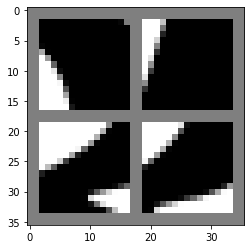


(true_class == predicted_class).item()=True
capB 0.98982834815979
capB 0.98982834815979


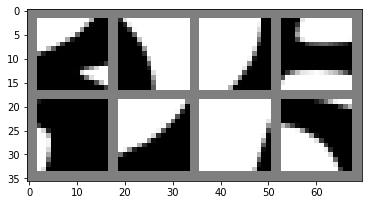


54 AGaramondPro-SemiboldItalic capC


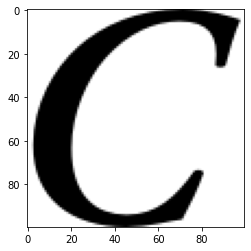


(true_class == predicted_class).item()=True
capC 0.7849944233894348
capC 0.7849944233894348


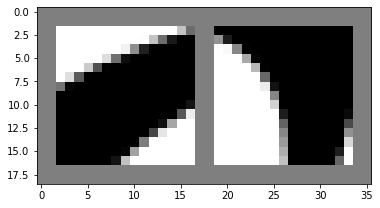


(true_class == predicted_class).item()=False
capC 0.4356316328048706
capG 0.5548768043518066


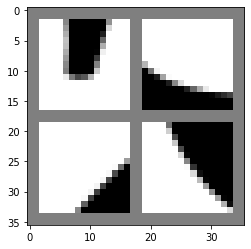


(true_class == predicted_class).item()=True
capC 0.838610827922821
capC 0.838610827922821


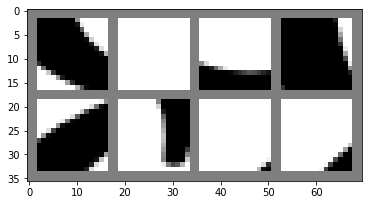


55 AGaramondPro-SemiboldItalic capD


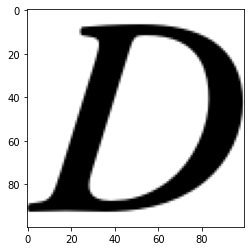


(true_class == predicted_class).item()=True
capD 0.9695847630500793
capD 0.9695847630500793


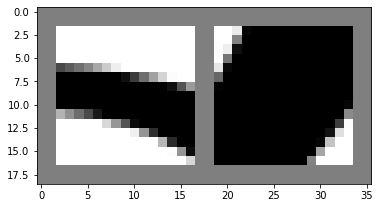


(true_class == predicted_class).item()=True
capD 0.9990977048873901
capD 0.9990977048873901


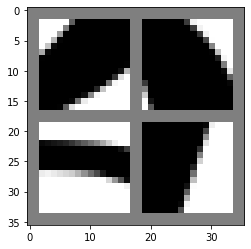


(true_class == predicted_class).item()=True
capD 0.9999067783355713
capD 0.9999067783355713


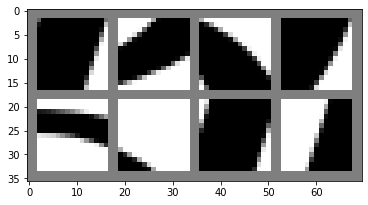


56 AGaramondPro-SemiboldItalic capE


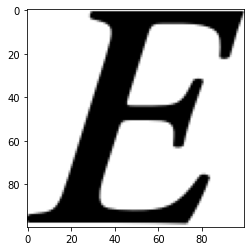


(true_class == predicted_class).item()=True
capE 0.7871431112289429
capE 0.7871431112289429


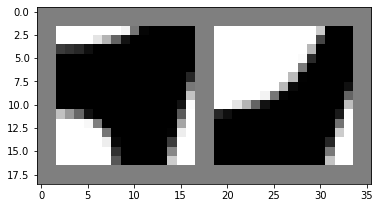


(true_class == predicted_class).item()=True
capE 0.8532247543334961
capE 0.8532247543334961


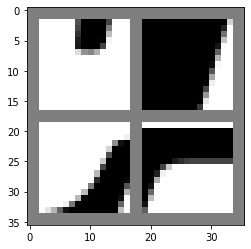


(true_class == predicted_class).item()=True
capE 0.9825097322463989
capE 0.9825097322463989


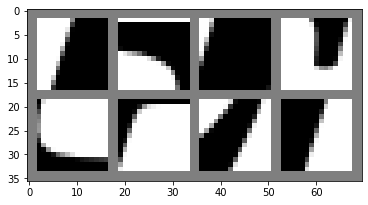


57 AGaramondPro-SemiboldItalic capF


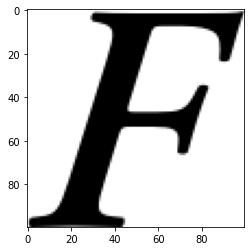


(true_class == predicted_class).item()=True
capF 0.5740934014320374
capF 0.5740934014320374


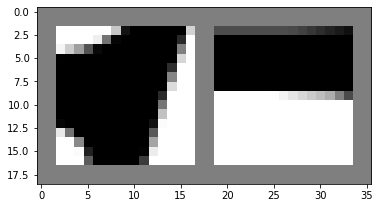


(true_class == predicted_class).item()=True
capF 0.6491276621818542
capF 0.6491276621818542


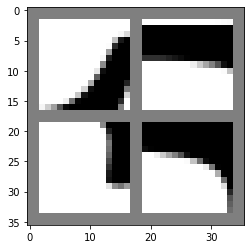


(true_class == predicted_class).item()=False
capF 0.26451411843299866
capE 0.7354856729507446


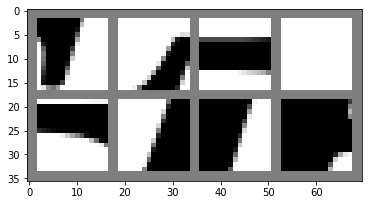


58 AGaramondPro-SemiboldItalic capG


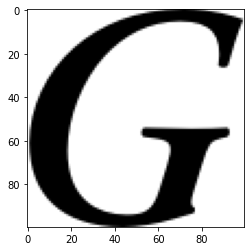


(true_class == predicted_class).item()=False
capG 0.4819782078266144
capC 0.505518913269043


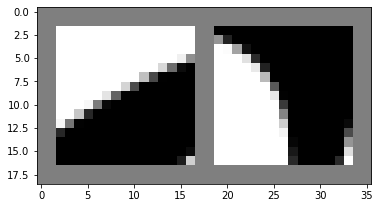


(true_class == predicted_class).item()=True
capG 0.9940961599349976
capG 0.9940961599349976


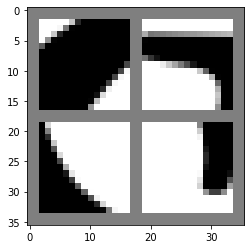


(true_class == predicted_class).item()=True
capG 0.9998821020126343
capG 0.9998821020126343


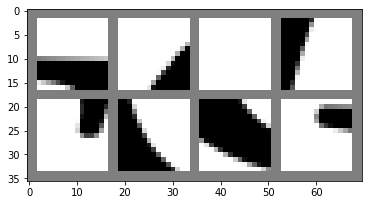


59 AGaramondPro-SemiboldItalic capH


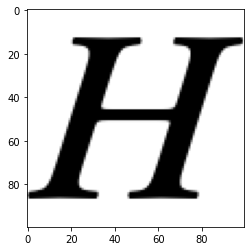


(true_class == predicted_class).item()=True
capH 0.9357292652130127
capH 0.9357292652130127


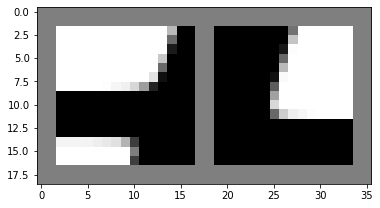


(true_class == predicted_class).item()=True
capH 0.9998748302459717
capH 0.9998748302459717


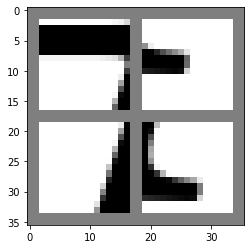


(true_class == predicted_class).item()=True
capH 0.9998801946640015
capH 0.9998801946640015


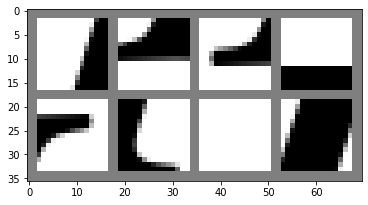


60 AGaramondPro-SemiboldItalic capI


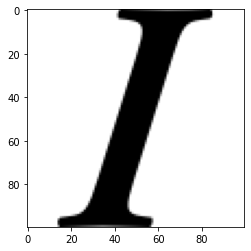


(true_class == predicted_class).item()=True
capI 0.3789688050746918
capI 0.3789688050746918


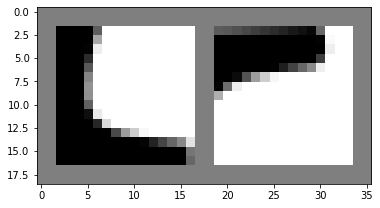


(true_class == predicted_class).item()=True
capI 0.8094901442527771
capI 0.8094901442527771


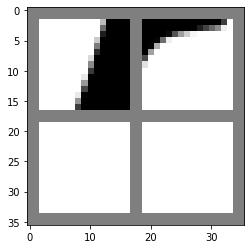


(true_class == predicted_class).item()=True
capI 0.9361836314201355
capI 0.9361836314201355


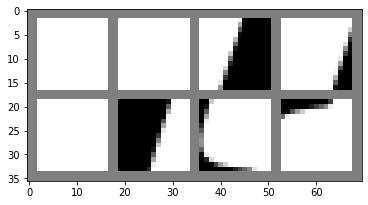


61 AGaramondPro-SemiboldItalic capJ


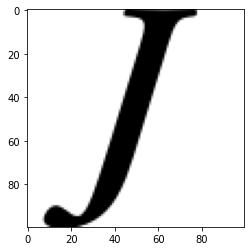


(true_class == predicted_class).item()=True
capJ 0.4571768045425415
capJ 0.4571768045425415


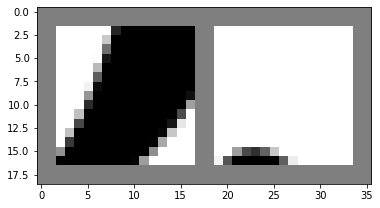


(true_class == predicted_class).item()=True
capJ 0.8014823198318481
capJ 0.8014823198318481


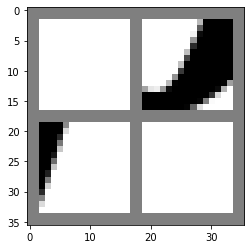


(true_class == predicted_class).item()=True
capJ 0.9807431697845459
capJ 0.9807431697845459


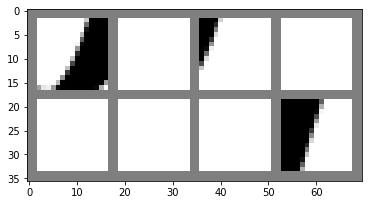


62 AGaramondPro-SemiboldItalic capK


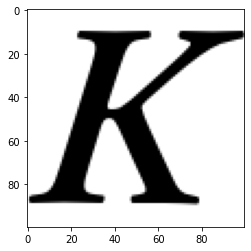


(true_class == predicted_class).item()=True
capK 0.9809094071388245
capK 0.9809094071388245


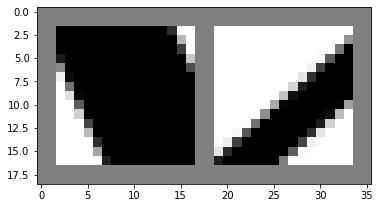


(true_class == predicted_class).item()=True
capK 0.9965611100196838
capK 0.9965611100196838


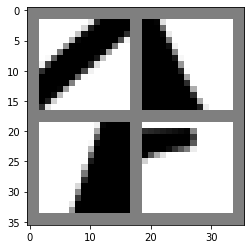


(true_class == predicted_class).item()=True
capK 0.999958872795105
capK 0.999958872795105


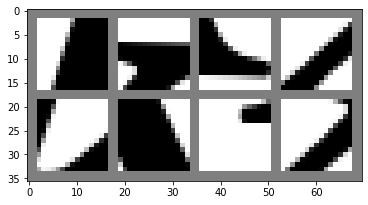


63 AGaramondPro-SemiboldItalic capL


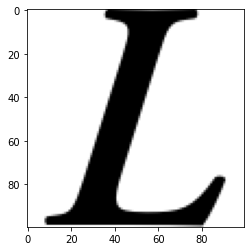


(true_class == predicted_class).item()=False
capL 0.41060858964920044
capE 0.5355854034423828


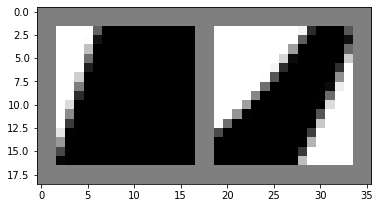


(true_class == predicted_class).item()=True
capL 0.992504358291626
capL 0.992504358291626


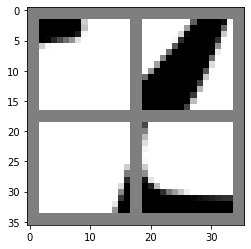


(true_class == predicted_class).item()=True
capL 0.9998258948326111
capL 0.9998258948326111


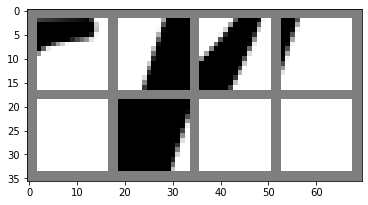


64 AGaramondPro-SemiboldItalic capM


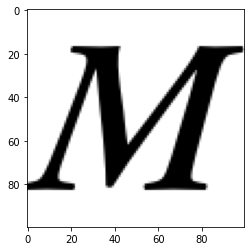


(true_class == predicted_class).item()=True
capM 0.9991555213928223
capM 0.9991555213928223


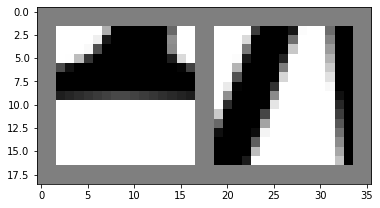


(true_class == predicted_class).item()=True
capM 0.999945878982544
capM 0.999945878982544


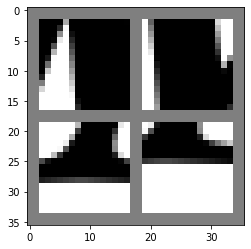


(true_class == predicted_class).item()=True
capM 0.9999995231628418
capM 0.9999995231628418


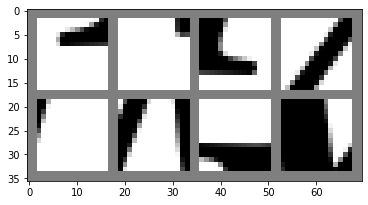


65 AGaramondPro-SemiboldItalic capN


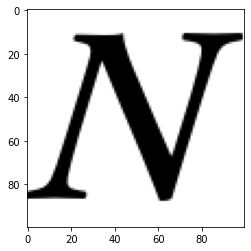


(true_class == predicted_class).item()=True
capN 0.9936057329177856
capN 0.9936057329177856


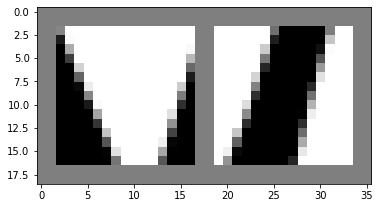


(true_class == predicted_class).item()=True
capN 0.9934473633766174
capN 0.9934473633766174


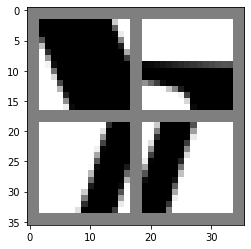


(true_class == predicted_class).item()=True
capN 0.9999731779098511
capN 0.9999731779098511


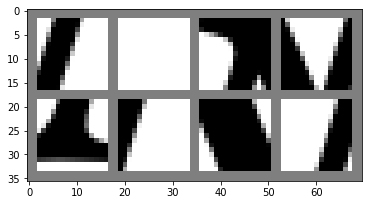


66 AGaramondPro-SemiboldItalic capO


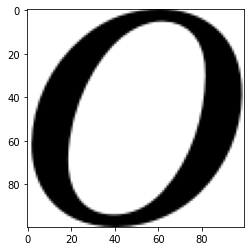


(true_class == predicted_class).item()=True
capO 0.5031799077987671
capO 0.5031799077987671


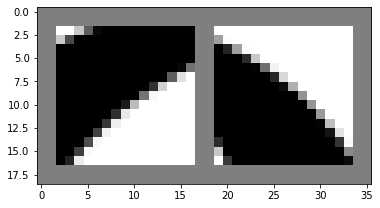


(true_class == predicted_class).item()=True
capO 0.5091179609298706
capO 0.5091179609298706


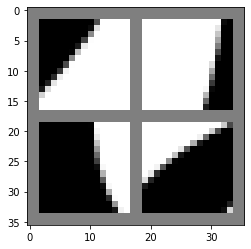


(true_class == predicted_class).item()=True
capO 0.5364975929260254
capO 0.5364975929260254


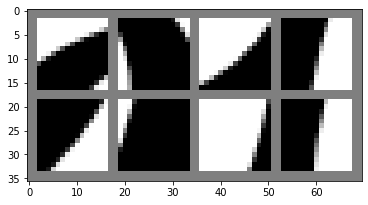


67 AGaramondPro-SemiboldItalic capP


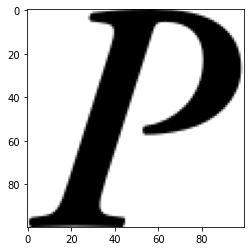


(true_class == predicted_class).item()=True
capP 0.8108665943145752
capP 0.8108665943145752


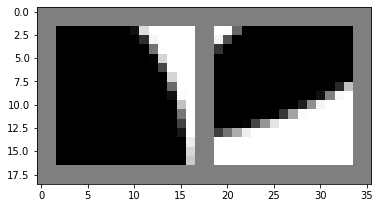


(true_class == predicted_class).item()=True
capP 0.9772770404815674
capP 0.9772770404815674


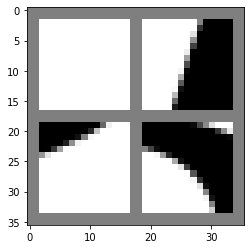


(true_class == predicted_class).item()=True
capP 0.9905547499656677
capP 0.9905547499656677


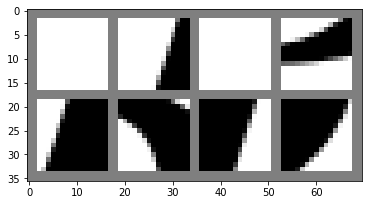


68 AGaramondPro-SemiboldItalic capQ


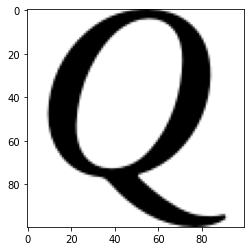


(true_class == predicted_class).item()=True
capQ 0.9999403953552246
capQ 0.9999403953552246


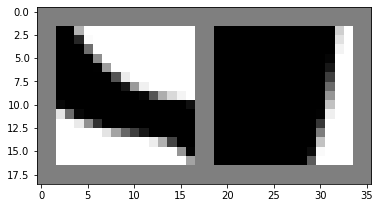


(true_class == predicted_class).item()=True
capQ 0.999640941619873
capQ 0.999640941619873


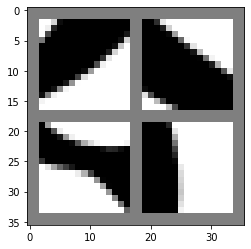


(true_class == predicted_class).item()=True
capQ 0.9999957084655762
capQ 0.9999957084655762


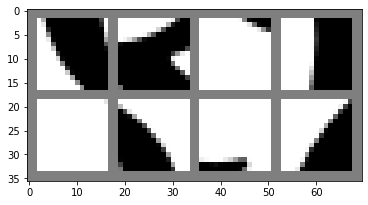


69 AGaramondPro-SemiboldItalic capR


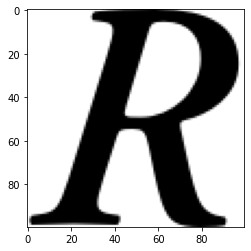


(true_class == predicted_class).item()=False
capR 0.1962801218032837
capB 0.6240250468254089


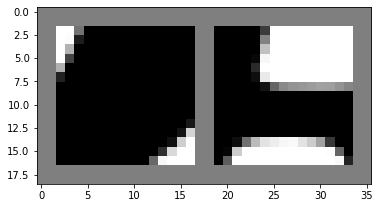


(true_class == predicted_class).item()=True
capR 0.9991717338562012
capR 0.9991717338562012


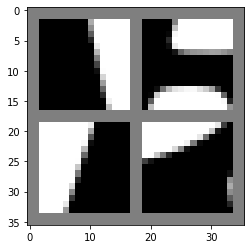


(true_class == predicted_class).item()=True
capR 0.999718964099884
capR 0.999718964099884


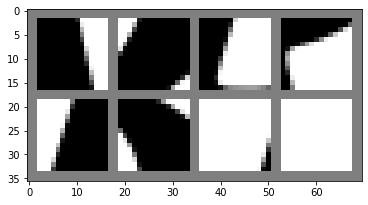


70 AGaramondPro-SemiboldItalic capS


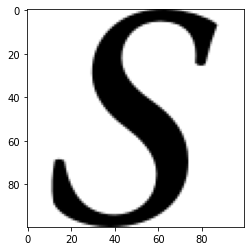


(true_class == predicted_class).item()=True
capS 0.6185957789421082
capS 0.6185957789421082


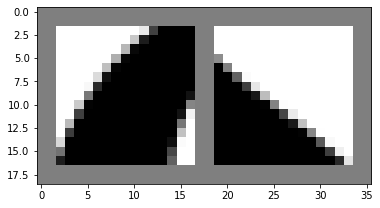


(true_class == predicted_class).item()=True
capS 0.6894168257713318
capS 0.6894168257713318


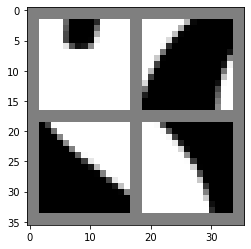


(true_class == predicted_class).item()=True
capS 0.5677648782730103
capS 0.5677648782730103


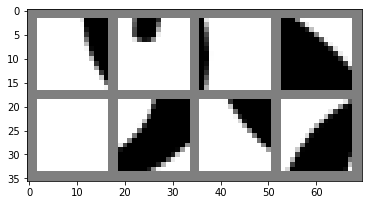


71 AGaramondPro-SemiboldItalic capT


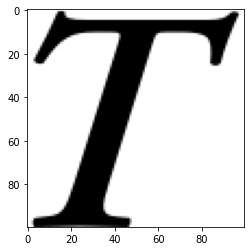


(true_class == predicted_class).item()=False
capT 0.13036729395389557
capE 0.5143823623657227


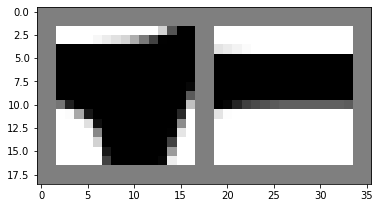


(true_class == predicted_class).item()=True
capT 0.8836491703987122
capT 0.8836491703987122


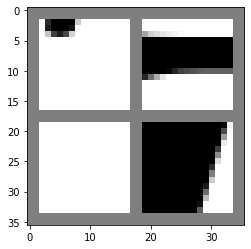


(true_class == predicted_class).item()=True
capT 0.785712480545044
capT 0.785712480545044


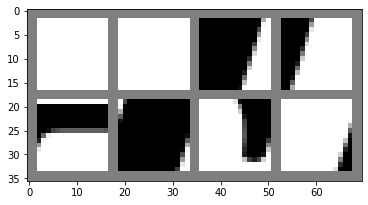


72 AGaramondPro-SemiboldItalic capU


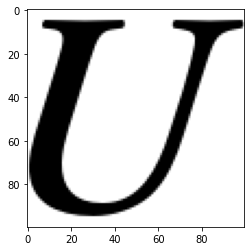


(true_class == predicted_class).item()=True
capU 0.9813949465751648
capU 0.9813949465751648


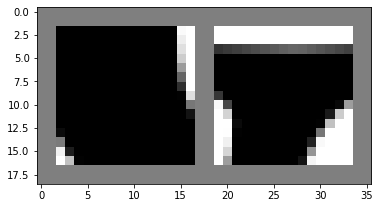


(true_class == predicted_class).item()=True
capU 0.9998979568481445
capU 0.9998979568481445


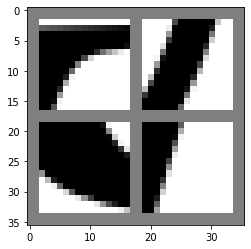


(true_class == predicted_class).item()=True
capU 0.999994158744812
capU 0.999994158744812


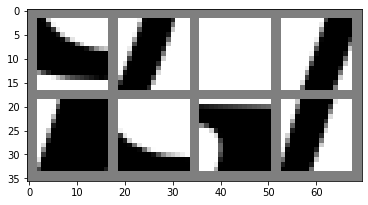


73 AGaramondPro-SemiboldItalic capV


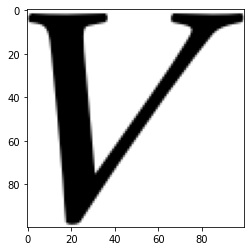


(true_class == predicted_class).item()=True
capV 0.858351469039917
capV 0.858351469039917


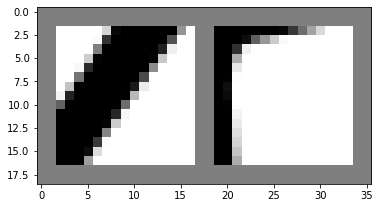


(true_class == predicted_class).item()=True
capV 0.9967225193977356
capV 0.9967225193977356


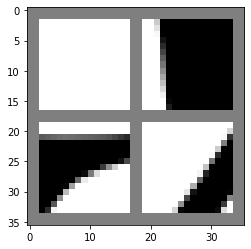


(true_class == predicted_class).item()=True
capV 0.9983056783676147
capV 0.9983056783676147


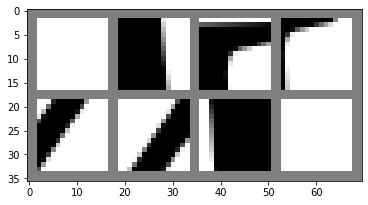


74 AGaramondPro-SemiboldItalic capW


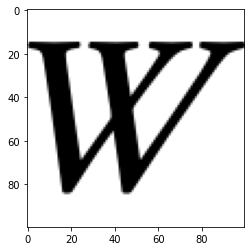


(true_class == predicted_class).item()=True
capW 0.8240240812301636
capW 0.8240240812301636


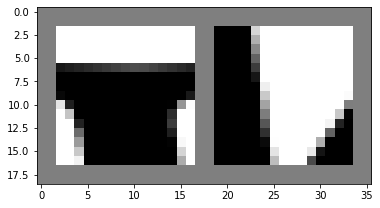


(true_class == predicted_class).item()=True
capW 0.9921184778213501
capW 0.9921184778213501


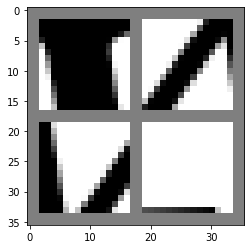


(true_class == predicted_class).item()=True
capW 0.9915875792503357
capW 0.9915875792503357


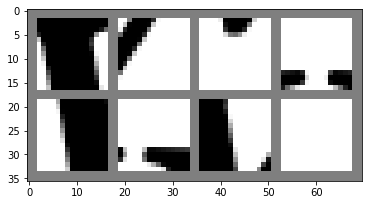


75 AGaramondPro-SemiboldItalic capX


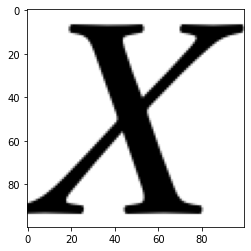


(true_class == predicted_class).item()=True
capX 0.8159485459327698
capX 0.8159485459327698


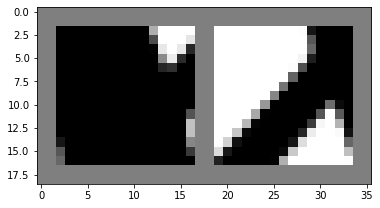


(true_class == predicted_class).item()=True
capX 0.7946734428405762
capX 0.7946734428405762


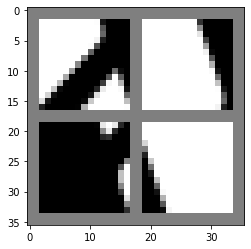


(true_class == predicted_class).item()=True
capX 0.9900615215301514
capX 0.9900615215301514


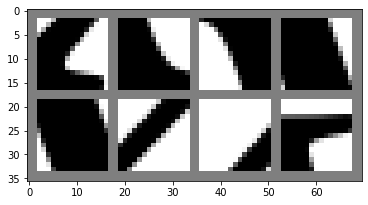


76 AGaramondPro-SemiboldItalic capY


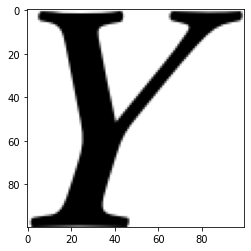


(true_class == predicted_class).item()=True
capY 0.8068920373916626
capY 0.8068920373916626


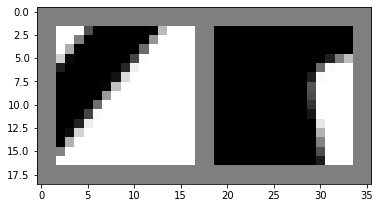


(true_class == predicted_class).item()=True
capY 0.9973490238189697
capY 0.9973490238189697


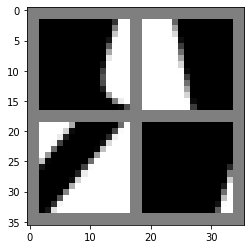


(true_class == predicted_class).item()=True
capY 0.9979065656661987
capY 0.9979065656661987


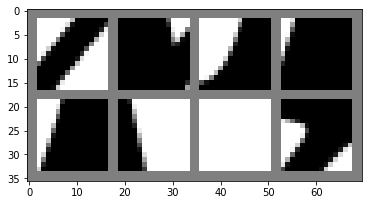


77 AGaramondPro-SemiboldItalic capZ


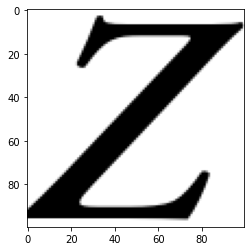


(true_class == predicted_class).item()=True
capZ 0.777859091758728
capZ 0.777859091758728


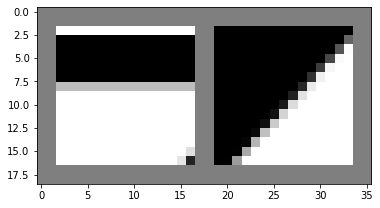


(true_class == predicted_class).item()=True
capZ 0.7683538198471069
capZ 0.7683538198471069


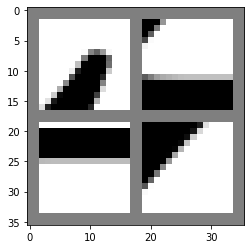


(true_class == predicted_class).item()=True
capZ 0.9823465347290039
capZ 0.9823465347290039


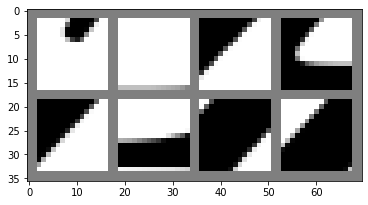


78 AGaramondPro-SemiboldItalic smallA


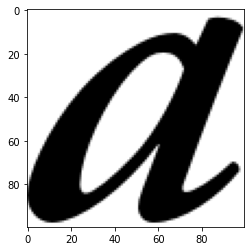


(true_class == predicted_class).item()=True
smallA 0.8033994436264038
smallA 0.8033994436264038


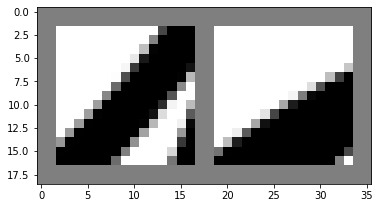


(true_class == predicted_class).item()=True
smallA 0.9913621544837952
smallA 0.9913621544837952


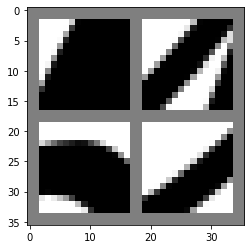


(true_class == predicted_class).item()=True
smallA 0.9975551962852478
smallA 0.9975551962852478


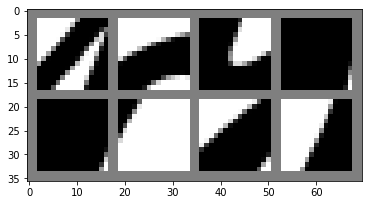


79 AGaramondPro-SemiboldItalic smallB


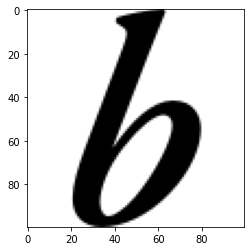


(true_class == predicted_class).item()=False
smallB 0.2839438021183014
smallN 0.30117669701576233


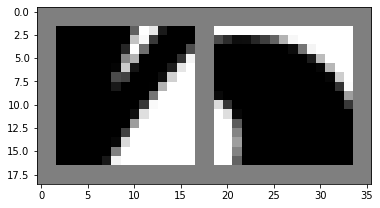


(true_class == predicted_class).item()=True
smallB 0.7641823887825012
smallB 0.7641823887825012


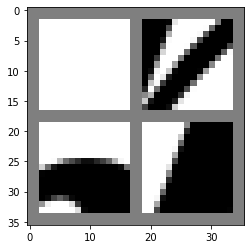


(true_class == predicted_class).item()=True
smallB 0.8861475586891174
smallB 0.8861475586891174


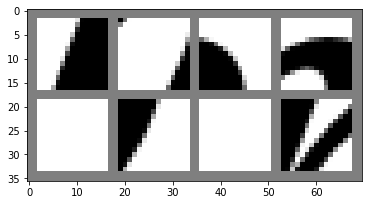


80 AGaramondPro-SemiboldItalic smallC


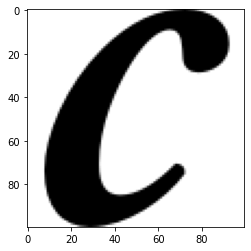


(true_class == predicted_class).item()=True
smallC 0.6185238361358643
smallC 0.6185238361358643


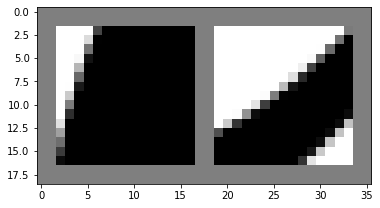


(true_class == predicted_class).item()=True
smallC 0.8807358145713806
smallC 0.8807358145713806


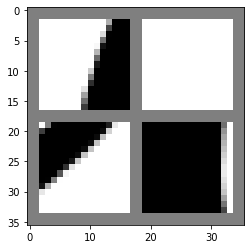


(true_class == predicted_class).item()=True
smallC 0.9983618855476379
smallC 0.9983618855476379


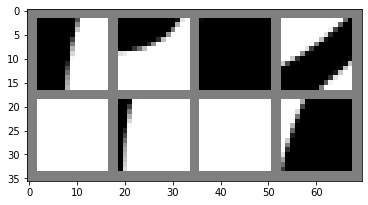


81 AGaramondPro-SemiboldItalic smallD


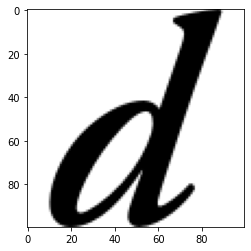


(true_class == predicted_class).item()=True
smallD 0.9993187189102173
smallD 0.9993187189102173


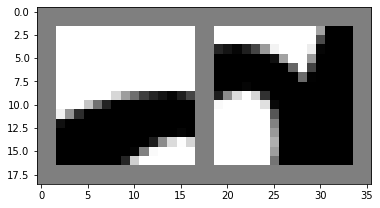


(true_class == predicted_class).item()=True
smallD 0.9843392372131348
smallD 0.9843392372131348


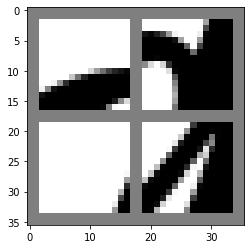


(true_class == predicted_class).item()=True
smallD 0.9999740123748779
smallD 0.9999740123748779


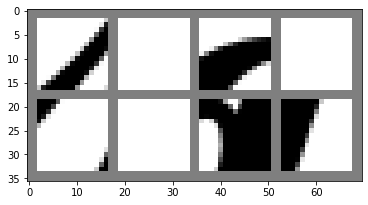


82 AGaramondPro-SemiboldItalic smallE


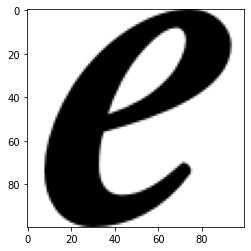


(true_class == predicted_class).item()=True
smallE 0.9997256398200989
smallE 0.9997256398200989


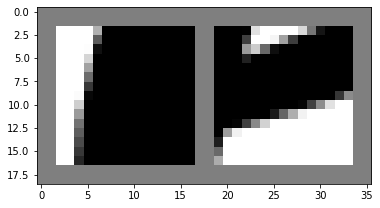


(true_class == predicted_class).item()=True
smallE 0.9995542168617249
smallE 0.9995542168617249


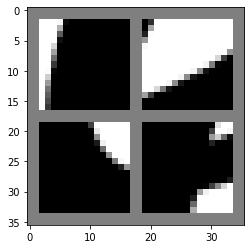


(true_class == predicted_class).item()=True
smallE 0.9999921321868896
smallE 0.9999921321868896


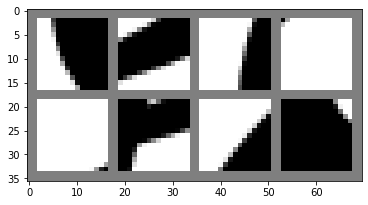


83 AGaramondPro-SemiboldItalic smallF


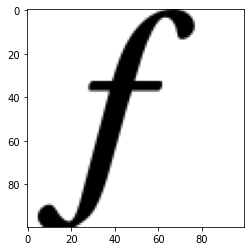


(true_class == predicted_class).item()=True
smallF 0.99920254945755
smallF 0.99920254945755


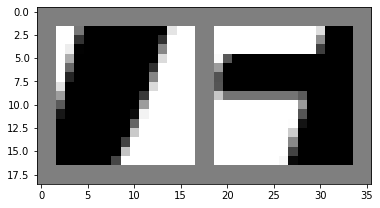


(true_class == predicted_class).item()=True
smallF 0.9997040629386902
smallF 0.9997040629386902


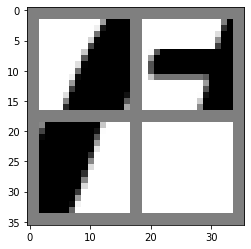


(true_class == predicted_class).item()=True
smallF 0.9999986886978149
smallF 0.9999986886978149


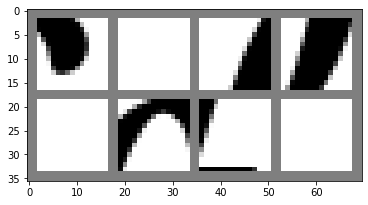


84 AGaramondPro-SemiboldItalic smallG


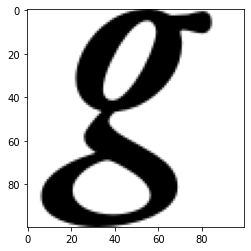


(true_class == predicted_class).item()=True
smallG 0.9999980926513672
smallG 0.9999980926513672


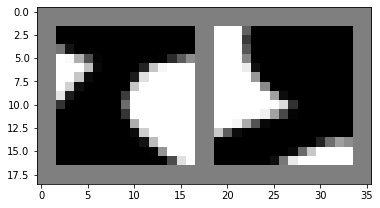


(true_class == predicted_class).item()=True
smallG 0.999971866607666
smallG 0.999971866607666


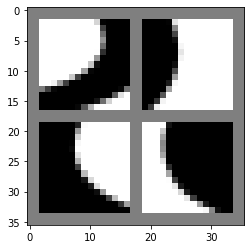


(true_class == predicted_class).item()=True
smallG 0.9999933242797852
smallG 0.9999933242797852


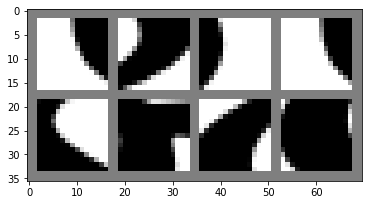


85 AGaramondPro-SemiboldItalic smallH


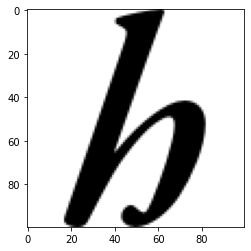


(true_class == predicted_class).item()=False
smallH 0.20248933136463165
smallB 0.7254680395126343


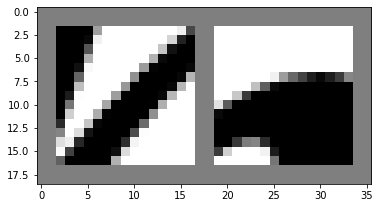


(true_class == predicted_class).item()=True
smallH 0.9131200313568115
smallH 0.9131200313568115


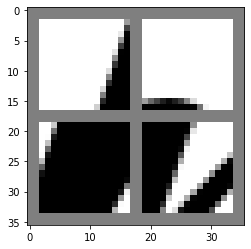


(true_class == predicted_class).item()=True
smallH 0.9899335503578186
smallH 0.9899335503578186


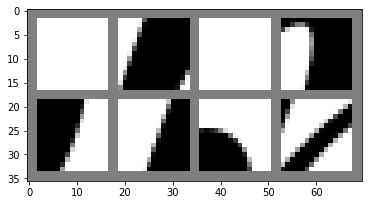


86 AGaramondPro-SemiboldItalic smallI


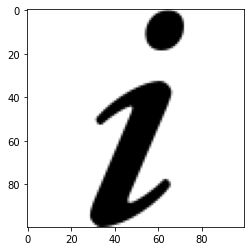


(true_class == predicted_class).item()=True
smallI 0.6283376812934875
smallI 0.6283376812934875


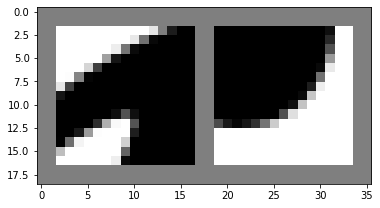


(true_class == predicted_class).item()=True
smallI 0.9830020070075989
smallI 0.9830020070075989


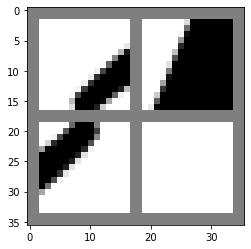


(true_class == predicted_class).item()=True
smallI 0.9619162678718567
smallI 0.9619162678718567


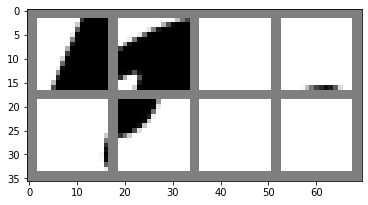


87 AGaramondPro-SemiboldItalic smallJ


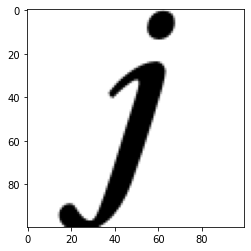


(true_class == predicted_class).item()=True
smallJ 0.9053474068641663
smallJ 0.9053474068641663


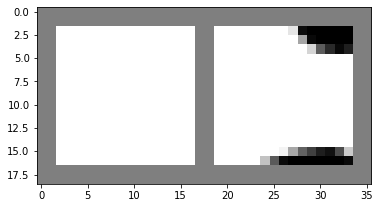


(true_class == predicted_class).item()=True
smallJ 0.8622797727584839
smallJ 0.8622797727584839


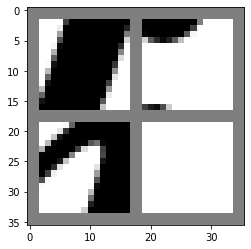


(true_class == predicted_class).item()=True
smallJ 0.9985731840133667
smallJ 0.9985731840133667


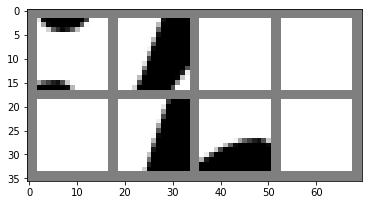


88 AGaramondPro-SemiboldItalic smallK


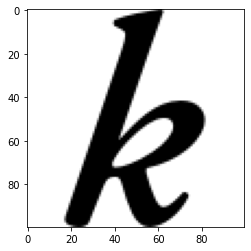


(true_class == predicted_class).item()=True
smallK 0.7219945192337036
smallK 0.7219945192337036


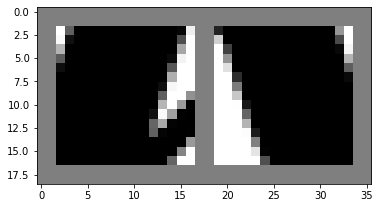


(true_class == predicted_class).item()=True
smallK 0.6423371434211731
smallK 0.6423371434211731


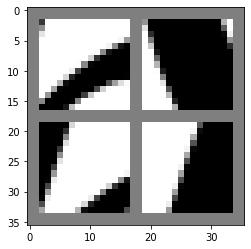


(true_class == predicted_class).item()=True
smallK 0.9651293754577637
smallK 0.9651293754577637


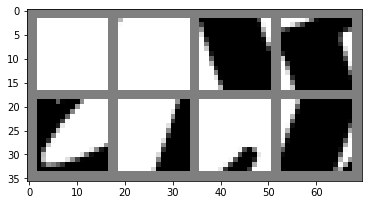


89 AGaramondPro-SemiboldItalic smallL


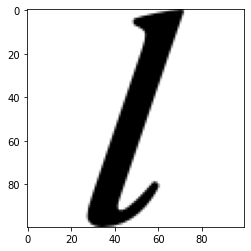


(true_class == predicted_class).item()=True
smallL 0.504125714302063
smallL 0.504125714302063


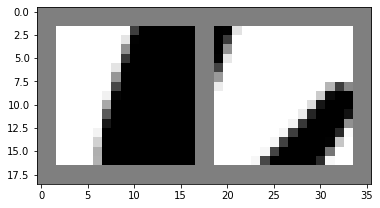


(true_class == predicted_class).item()=True
smallL 0.8567050099372864
smallL 0.8567050099372864


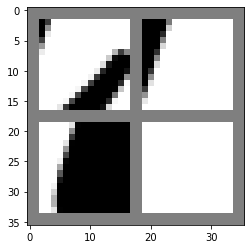


(true_class == predicted_class).item()=True
smallL 0.984700083732605
smallL 0.984700083732605


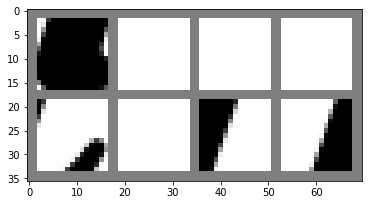


90 AGaramondPro-SemiboldItalic smallM


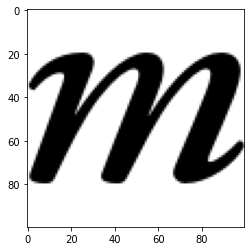


(true_class == predicted_class).item()=True
smallM 0.9982680082321167
smallM 0.9982680082321167


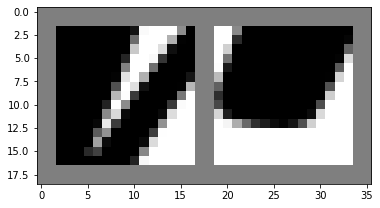


(true_class == predicted_class).item()=True
smallM 0.9990295171737671
smallM 0.9990295171737671


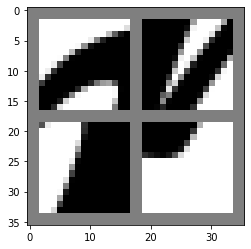


(true_class == predicted_class).item()=True
smallM 0.9999977350234985
smallM 0.9999977350234985


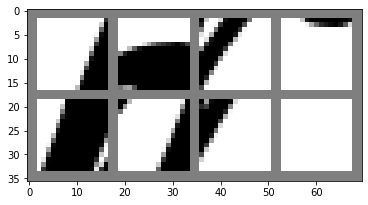


91 AGaramondPro-SemiboldItalic smallN


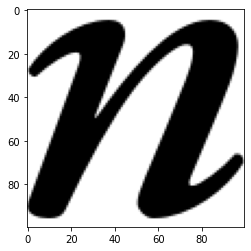


(true_class == predicted_class).item()=True
smallN 0.9611840844154358
smallN 0.9611840844154358


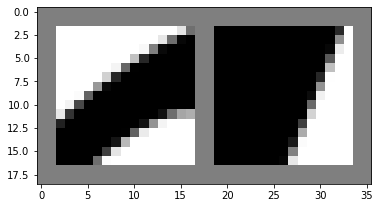


(true_class == predicted_class).item()=True
smallN 0.9948936700820923
smallN 0.9948936700820923


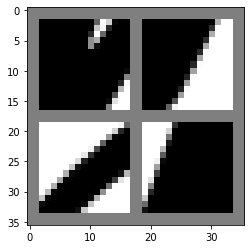


(true_class == predicted_class).item()=True
smallN 0.9998785257339478
smallN 0.9998785257339478


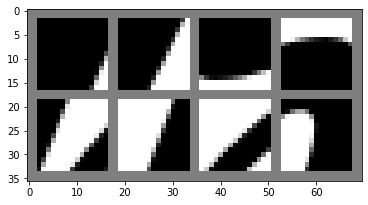


92 AGaramondPro-SemiboldItalic smallO


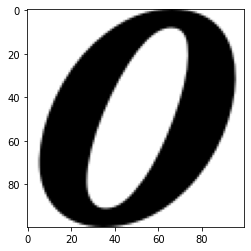


(true_class == predicted_class).item()=True
smallO 0.5247840285301208
smallO 0.5247840285301208


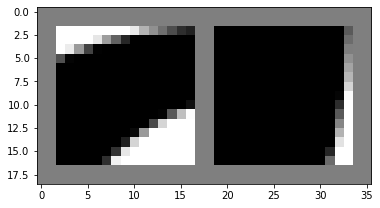


(true_class == predicted_class).item()=False
smallO 0.48084041476249695
capO 0.4930945932865143


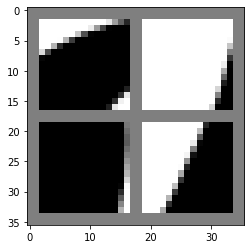


(true_class == predicted_class).item()=True
smallO 0.818205714225769
smallO 0.818205714225769


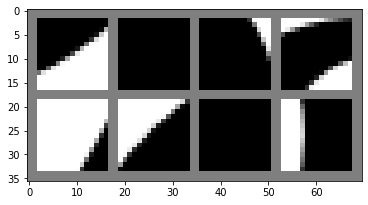


93 AGaramondPro-SemiboldItalic smallP


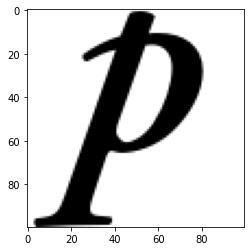


(true_class == predicted_class).item()=True
smallP 0.5583072900772095
smallP 0.5583072900772095


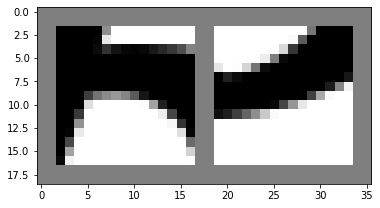


(true_class == predicted_class).item()=True
smallP 0.991524338722229
smallP 0.991524338722229


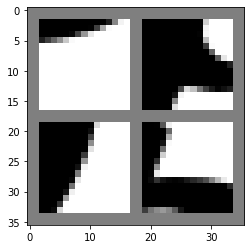


(true_class == predicted_class).item()=True
smallP 0.999675989151001
smallP 0.999675989151001


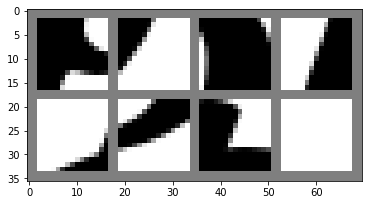


94 AGaramondPro-SemiboldItalic smallQ


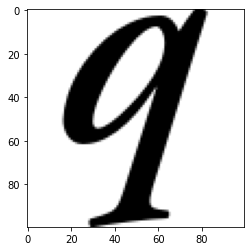


(true_class == predicted_class).item()=True
smallQ 0.5137385725975037
smallQ 0.5137385725975037


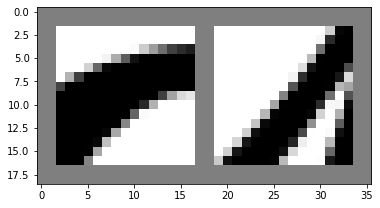


(true_class == predicted_class).item()=True
smallQ 0.9523465037345886
smallQ 0.9523465037345886


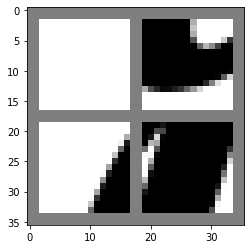


(true_class == predicted_class).item()=True
smallQ 0.8785048127174377
smallQ 0.8785048127174377


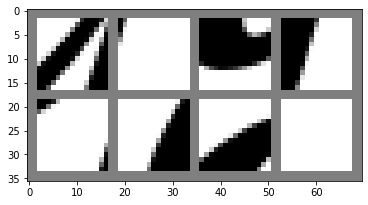


95 AGaramondPro-SemiboldItalic smallR


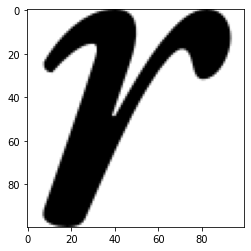


(true_class == predicted_class).item()=True
smallR 0.9832085967063904
smallR 0.9832085967063904


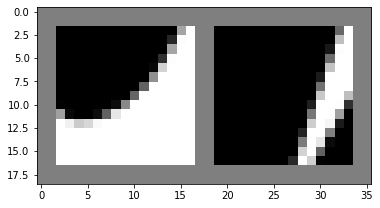


(true_class == predicted_class).item()=True
smallR 0.9979536533355713
smallR 0.9979536533355713


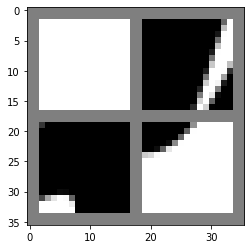


(true_class == predicted_class).item()=True
smallR 0.9999997615814209
smallR 0.9999997615814209


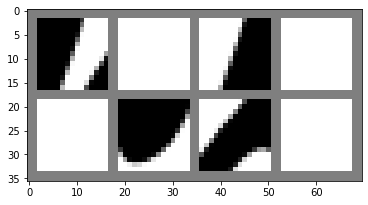


96 AGaramondPro-SemiboldItalic smallS


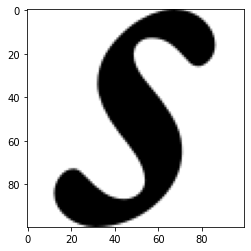


(true_class == predicted_class).item()=True
smallS 0.8642950057983398
smallS 0.8642950057983398


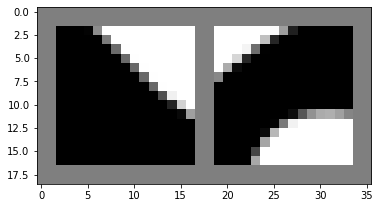


(true_class == predicted_class).item()=True
smallS 0.9780457019805908
smallS 0.9780457019805908


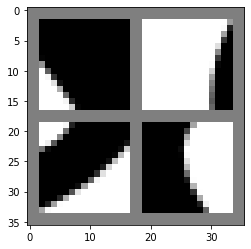


(true_class == predicted_class).item()=True
smallS 0.9967840909957886
smallS 0.9967840909957886


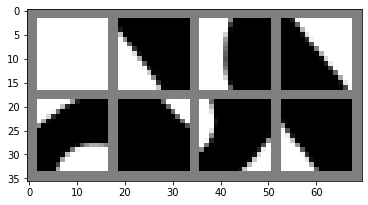


97 AGaramondPro-SemiboldItalic smallT


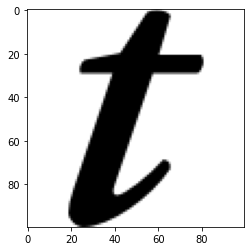


(true_class == predicted_class).item()=False
smallT 0.4142424464225769
smallF 0.5199030637741089


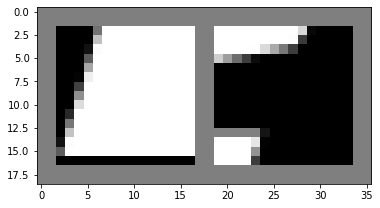


(true_class == predicted_class).item()=True
smallT 0.9286948442459106
smallT 0.9286948442459106


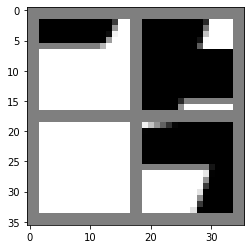


(true_class == predicted_class).item()=True
smallT 0.9998824596405029
smallT 0.9998824596405029


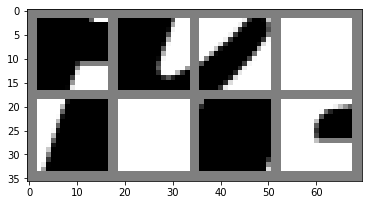


98 AGaramondPro-SemiboldItalic smallU


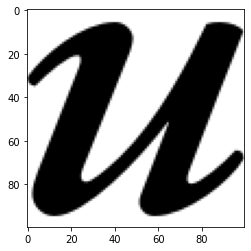


(true_class == predicted_class).item()=True
smallU 0.7678625583648682
smallU 0.7678625583648682


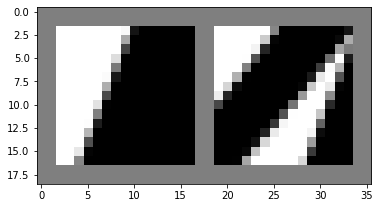


(true_class == predicted_class).item()=True
smallU 0.9949823021888733
smallU 0.9949823021888733


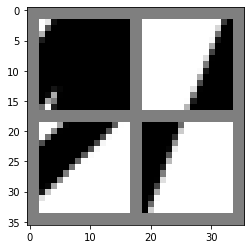


(true_class == predicted_class).item()=True
smallU 0.9987408518791199
smallU 0.9987408518791199


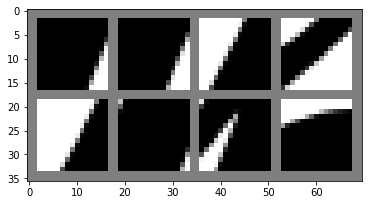


99 AGaramondPro-SemiboldItalic smallV


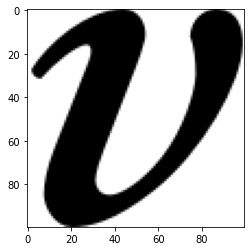


(true_class == predicted_class).item()=False
smallV 0.08260449022054672
capW 0.6296822428703308


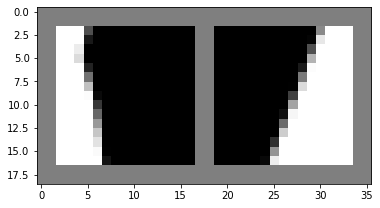


(true_class == predicted_class).item()=True
smallV 0.6086170077323914
smallV 0.6086170077323914


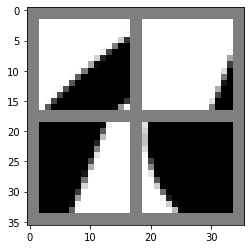


(true_class == predicted_class).item()=True
smallV 0.9993723034858704
smallV 0.9993723034858704


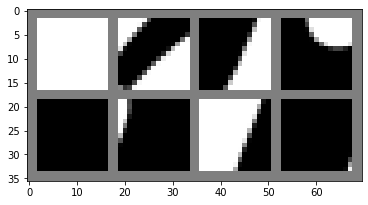


100 AGaramondPro-SemiboldItalic smallW


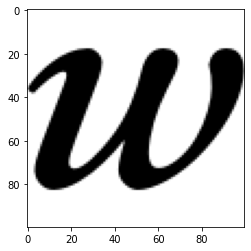


(true_class == predicted_class).item()=True
smallW 0.8539443016052246
smallW 0.8539443016052246


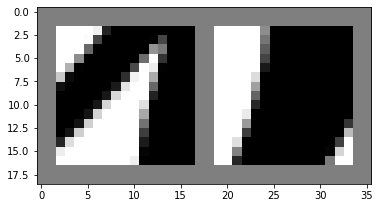


(true_class == predicted_class).item()=True
smallW 0.9728232026100159
smallW 0.9728232026100159


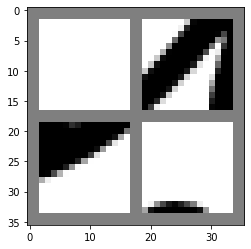


(true_class == predicted_class).item()=True
smallW 0.9991816878318787
smallW 0.9991816878318787


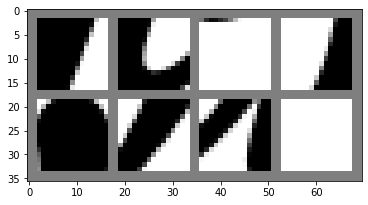


101 AGaramondPro-SemiboldItalic smallX


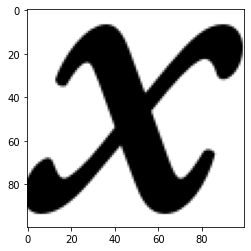


(true_class == predicted_class).item()=False
smallX 0.2686505615711212
capX 0.7311180233955383


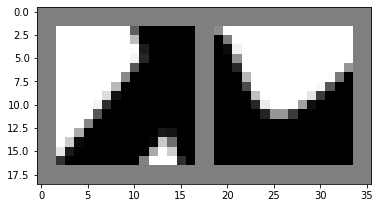


(true_class == predicted_class).item()=True
smallX 0.998696506023407
smallX 0.998696506023407


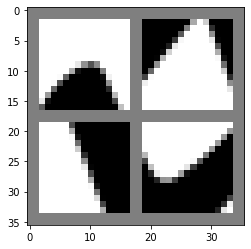


(true_class == predicted_class).item()=True
smallX 0.9990614056587219
smallX 0.9990614056587219


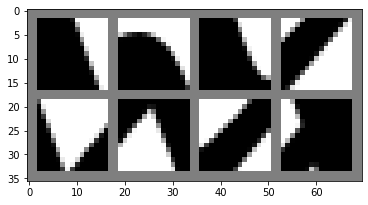


102 AGaramondPro-SemiboldItalic smallY


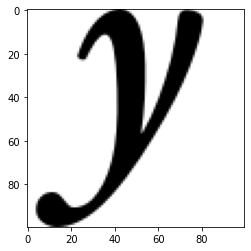


(true_class == predicted_class).item()=True
smallY 0.8061419129371643
smallY 0.8061419129371643


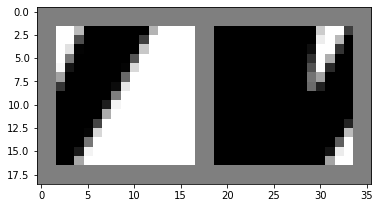


(true_class == predicted_class).item()=True
smallY 0.9552123546600342
smallY 0.9552123546600342


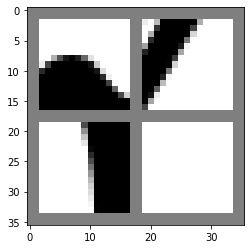


(true_class == predicted_class).item()=True
smallY 0.9999847412109375
smallY 0.9999847412109375


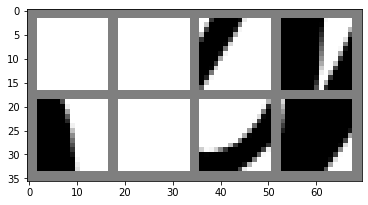


103 AGaramondPro-SemiboldItalic smallZ


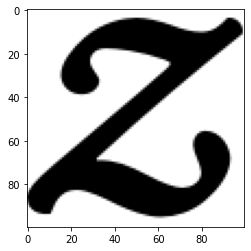


(true_class == predicted_class).item()=True
smallZ 0.9939693212509155
smallZ 0.9939693212509155


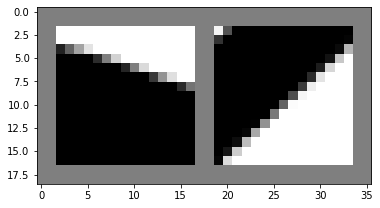


(true_class == predicted_class).item()=True
smallZ 0.9995473027229309
smallZ 0.9995473027229309


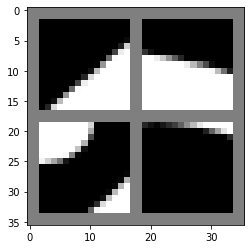


(true_class == predicted_class).item()=True
smallZ 0.9999122619628906
smallZ 0.9999122619628906


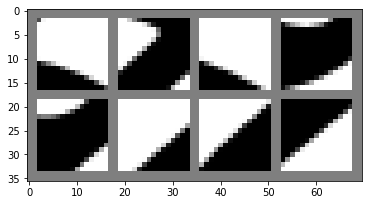


104 AJensonPro-Capt capA


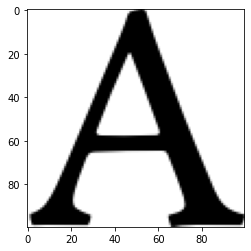


(true_class == predicted_class).item()=True
capA 0.9998062252998352
capA 0.9998062252998352


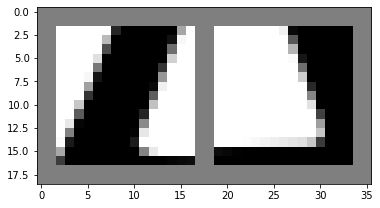


(true_class == predicted_class).item()=True
capA 0.9981716871261597
capA 0.9981716871261597


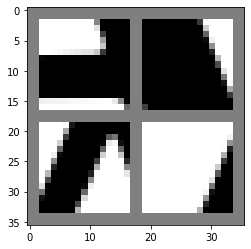


(true_class == predicted_class).item()=True
capA 0.9931157231330872
capA 0.9931157231330872


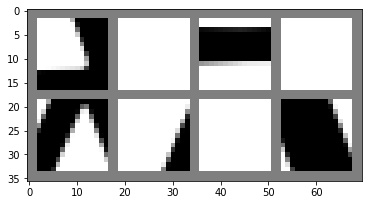


105 AJensonPro-Capt capB


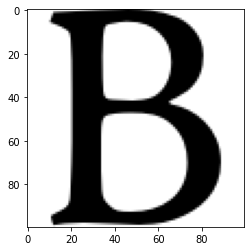


(true_class == predicted_class).item()=True
capB 0.9981167316436768
capB 0.9981167316436768


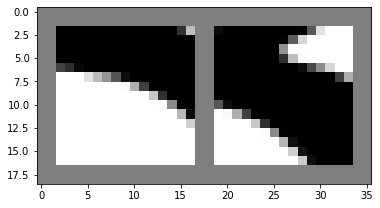


(true_class == predicted_class).item()=True
capB 0.999110758304596
capB 0.999110758304596


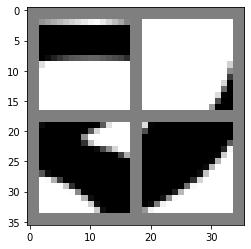


(true_class == predicted_class).item()=True
capB 0.9978395700454712
capB 0.9978395700454712


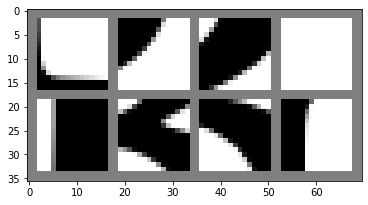


106 AJensonPro-Capt capC


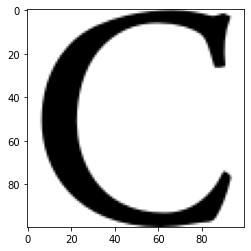


(true_class == predicted_class).item()=True
capC 0.7262232303619385
capC 0.7262232303619385


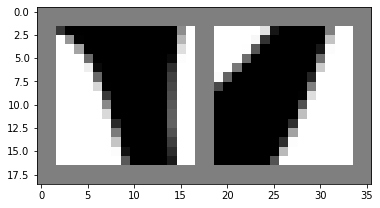


(true_class == predicted_class).item()=False
capC 0.467728853225708
capG 0.5299294590950012


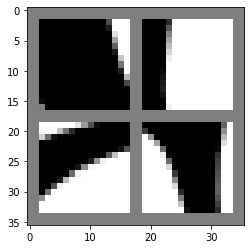


(true_class == predicted_class).item()=True
capC 0.9812316298484802
capC 0.9812316298484802


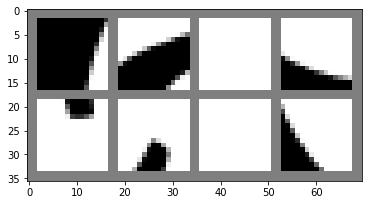


107 AJensonPro-Capt capD


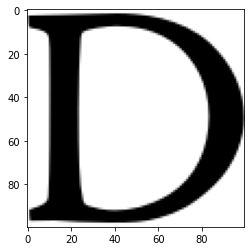


(true_class == predicted_class).item()=True
capD 0.5035703182220459
capD 0.5035703182220459


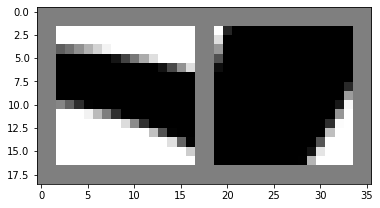


(true_class == predicted_class).item()=True
capD 0.9923545122146606
capD 0.9923545122146606


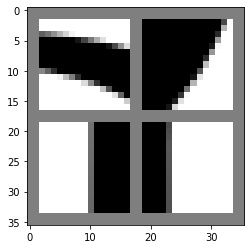


(true_class == predicted_class).item()=True
capD 0.9995405673980713
capD 0.9995405673980713


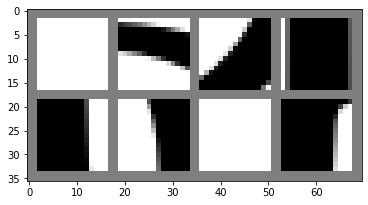


108 AJensonPro-Capt capE


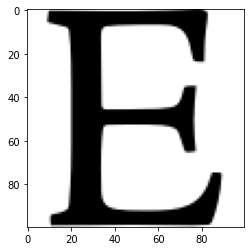


(true_class == predicted_class).item()=True
capE 0.5167924165725708
capE 0.5167924165725708


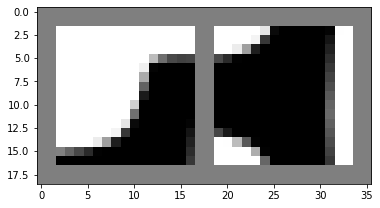


(true_class == predicted_class).item()=True
capE 0.9935708045959473
capE 0.9935708045959473


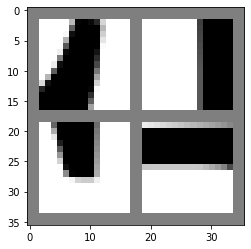


(true_class == predicted_class).item()=True
capE 0.9992111921310425
capE 0.9992111921310425


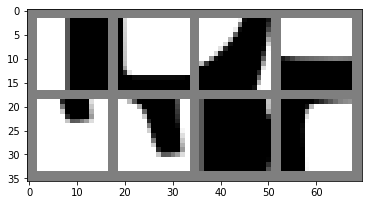


109 AJensonPro-Capt capF


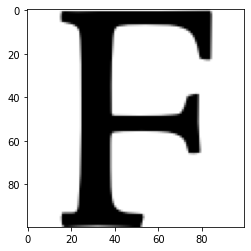


(true_class == predicted_class).item()=False
capF 0.29226812720298767
capE 0.6949610710144043


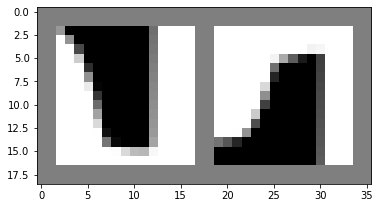


(true_class == predicted_class).item()=True
capF 0.5654585957527161
capF 0.5654585957527161


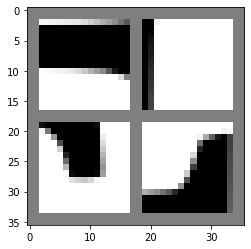


(true_class == predicted_class).item()=False
capF 0.37933382391929626
capE 0.6201038360595703


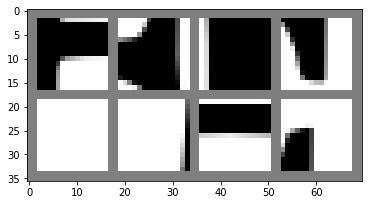


110 AJensonPro-Capt capG


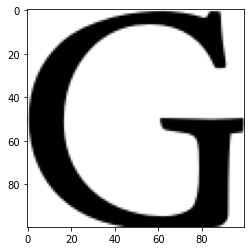


(true_class == predicted_class).item()=True
capG 0.9979689717292786
capG 0.9979689717292786


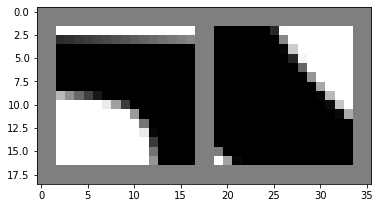


(true_class == predicted_class).item()=True
capG 0.9996412992477417
capG 0.9996412992477417


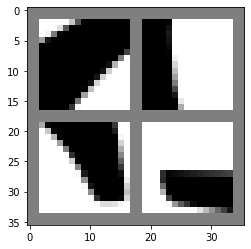


(true_class == predicted_class).item()=True
capG 0.9869446158409119
capG 0.9869446158409119


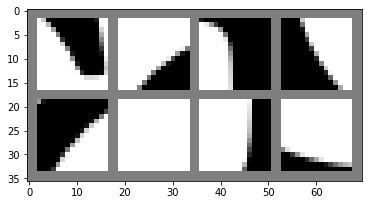


111 AJensonPro-Capt capH


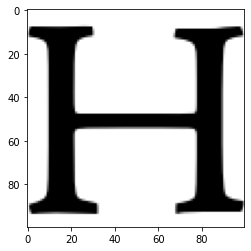


(true_class == predicted_class).item()=True
capH 0.9878453612327576
capH 0.9878453612327576


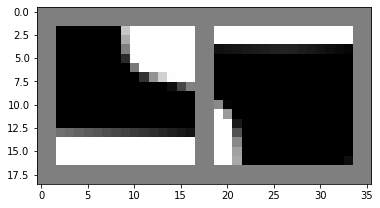


(true_class == predicted_class).item()=True
capH 0.9973811507225037
capH 0.9973811507225037


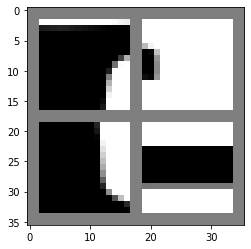


(true_class == predicted_class).item()=True
capH 0.9998408555984497
capH 0.9998408555984497


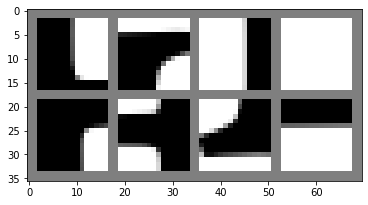


112 AJensonPro-Capt capI


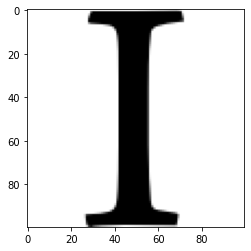


(true_class == predicted_class).item()=False
capI 0.22759470343589783
capH 0.2483275830745697


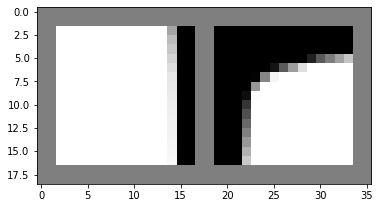


(true_class == predicted_class).item()=False
capI 0.2340497225522995
capH 0.59535813331604


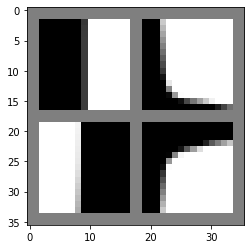


(true_class == predicted_class).item()=True
capI 0.7101209163665771
capI 0.7101209163665771


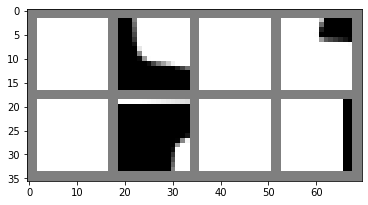


113 AJensonPro-Capt capJ


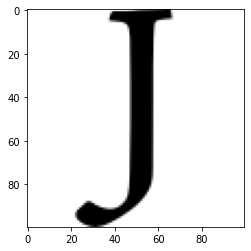


(true_class == predicted_class).item()=True
capJ 0.5632209777832031
capJ 0.5632209777832031


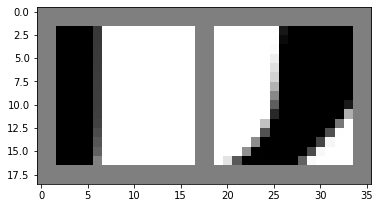


(true_class == predicted_class).item()=False
capJ 0.3088960349559784
smallJ 0.6848676204681396


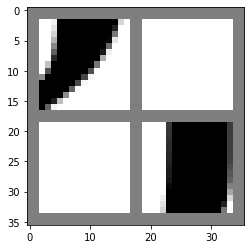


(true_class == predicted_class).item()=True
capJ 0.942148745059967
capJ 0.942148745059967


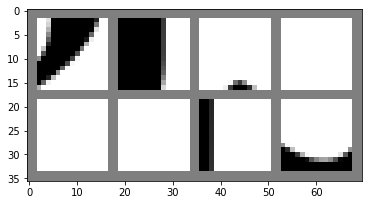


114 AJensonPro-Capt capK


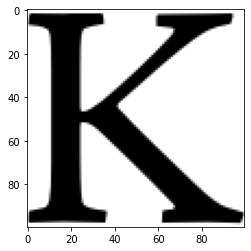


(true_class == predicted_class).item()=True
capK 0.9088566899299622
capK 0.9088566899299622


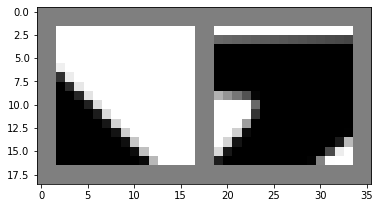


(true_class == predicted_class).item()=True
capK 0.9793053269386292
capK 0.9793053269386292


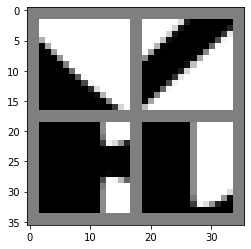


(true_class == predicted_class).item()=True
capK 0.9969078898429871
capK 0.9969078898429871


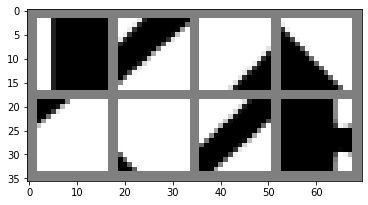


115 AJensonPro-Capt capL


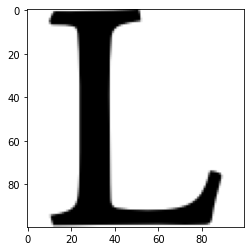


(true_class == predicted_class).item()=False
capL 0.20305421948432922
capE 0.6737930178642273


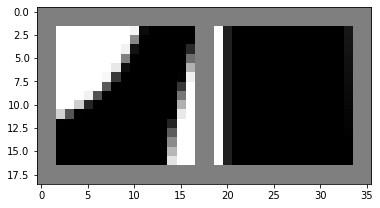


(true_class == predicted_class).item()=True
capL 0.8948450088500977
capL 0.8948450088500977


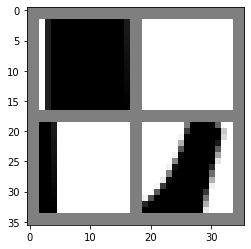


(true_class == predicted_class).item()=True
capL 0.9923572540283203
capL 0.9923572540283203


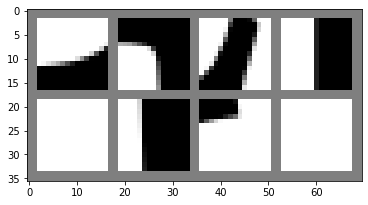


116 AJensonPro-Capt capM


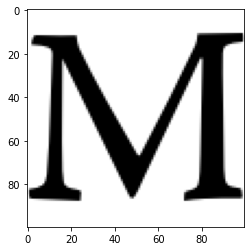


(true_class == predicted_class).item()=True
capM 0.9996488094329834
capM 0.9996488094329834


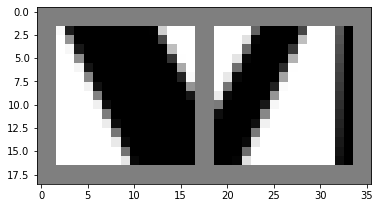


(true_class == predicted_class).item()=True
capM 0.9999768733978271
capM 0.9999768733978271


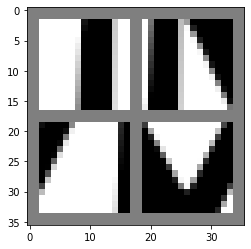


(true_class == predicted_class).item()=True
capM 0.9969923496246338
capM 0.9969923496246338


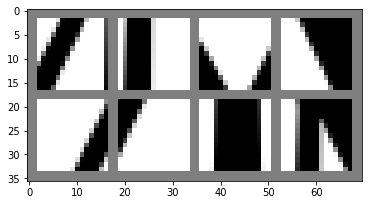


117 AJensonPro-Capt capN


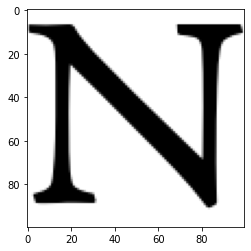


(true_class == predicted_class).item()=True
capN 0.9998220801353455
capN 0.9998220801353455


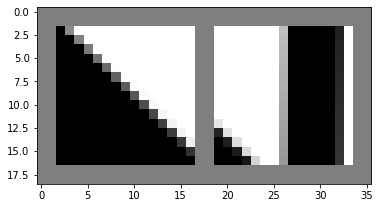


(true_class == predicted_class).item()=True
capN 0.9971044659614563
capN 0.9971044659614563


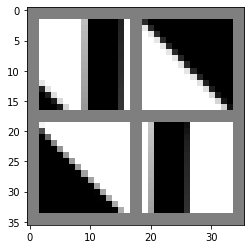


(true_class == predicted_class).item()=True
capN 0.999672532081604
capN 0.999672532081604


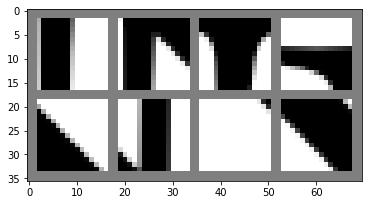


118 AJensonPro-Capt capO


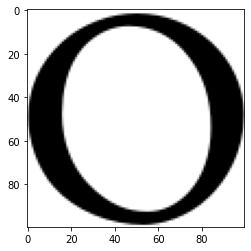


(true_class == predicted_class).item()=True
capO 0.5917641520500183
capO 0.5917641520500183


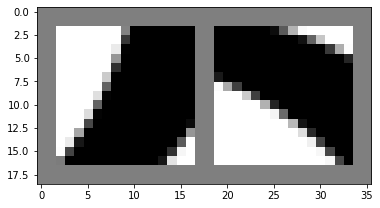


(true_class == predicted_class).item()=True
capO 0.8561349511146545
capO 0.8561349511146545


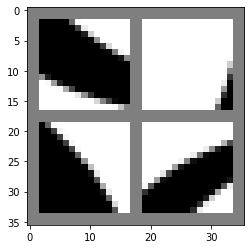


(true_class == predicted_class).item()=True
capO 0.7236806750297546
capO 0.7236806750297546


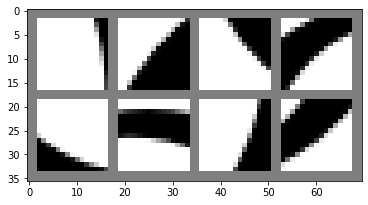


119 AJensonPro-Capt capP


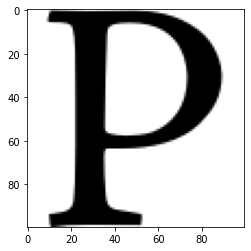


(true_class == predicted_class).item()=True
capP 0.9024280905723572
capP 0.9024280905723572


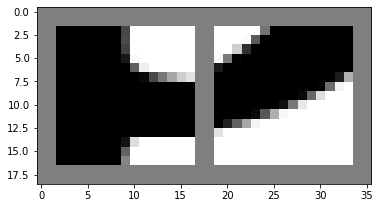


(true_class == predicted_class).item()=True
capP 0.9032262563705444
capP 0.9032262563705444


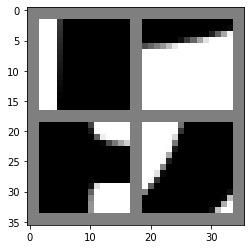


(true_class == predicted_class).item()=True
capP 0.9999033212661743
capP 0.9999033212661743


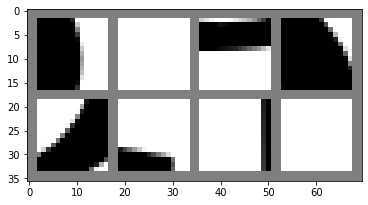


120 AJensonPro-Capt capQ


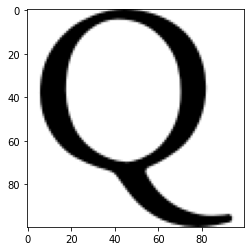


(true_class == predicted_class).item()=True
capQ 0.9474518299102783
capQ 0.9474518299102783


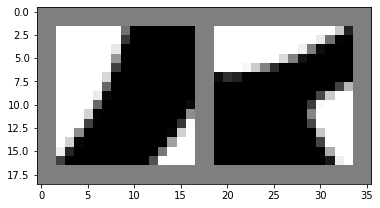


(true_class == predicted_class).item()=True
capQ 0.999895453453064
capQ 0.999895453453064


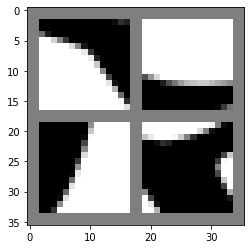


(true_class == predicted_class).item()=True
capQ 0.9998205304145813
capQ 0.9998205304145813


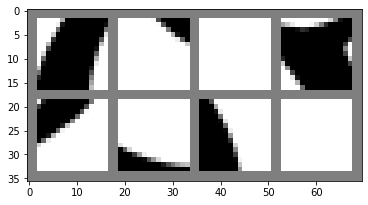


121 AJensonPro-Capt capR


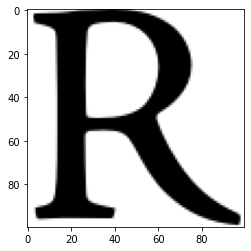


(true_class == predicted_class).item()=True
capR 0.9661789536476135
capR 0.9661789536476135


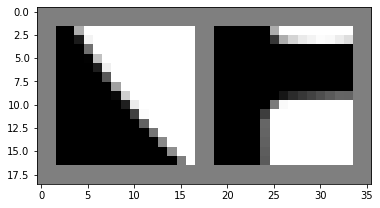


(true_class == predicted_class).item()=True
capR 0.9959794282913208
capR 0.9959794282913208


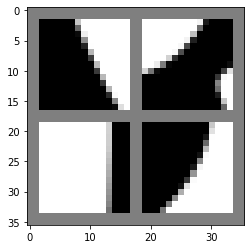


(true_class == predicted_class).item()=True
capR 0.9473668932914734
capR 0.9473668932914734


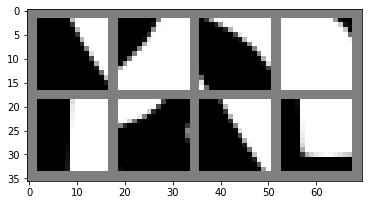


122 AJensonPro-Capt capS


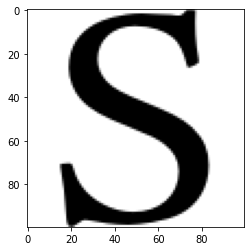


(true_class == predicted_class).item()=False
capS 0.4077713191509247
smallS 0.5915083289146423


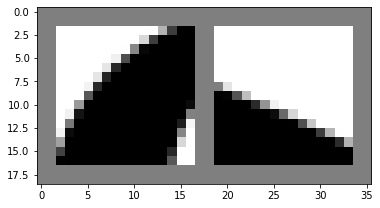


(true_class == predicted_class).item()=True
capS 0.7509185075759888
capS 0.7509185075759888


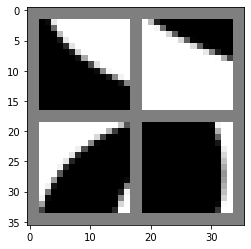


(true_class == predicted_class).item()=True
capS 0.5511343479156494
capS 0.5511343479156494


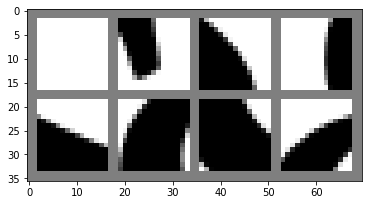


123 AJensonPro-Capt capT


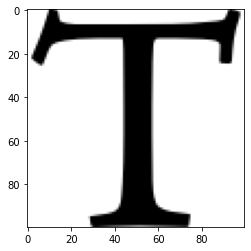


(true_class == predicted_class).item()=False
capT 0.02803153730928898
capF 0.7198779582977295


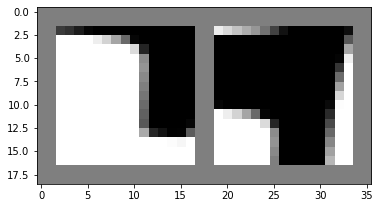


(true_class == predicted_class).item()=True
capT 0.9861292243003845
capT 0.9861292243003845


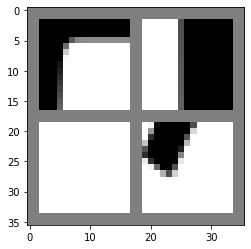


(true_class == predicted_class).item()=True
capT 0.9999966621398926
capT 0.9999966621398926


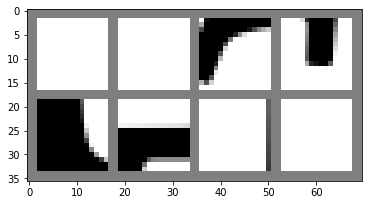


124 AJensonPro-Capt capU


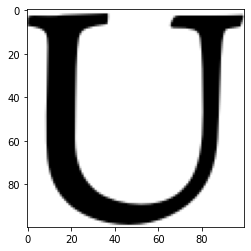


(true_class == predicted_class).item()=True
capU 0.995276927947998
capU 0.995276927947998


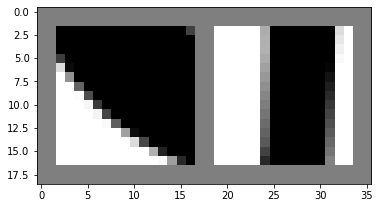


(true_class == predicted_class).item()=True
capU 0.9999475479125977
capU 0.9999475479125977


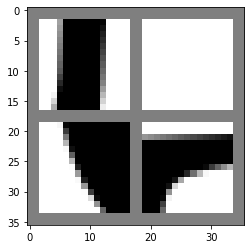


(true_class == predicted_class).item()=True
capU 0.9991752505302429
capU 0.9991752505302429


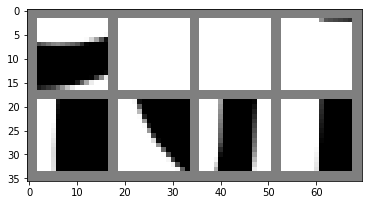


125 AJensonPro-Capt capV


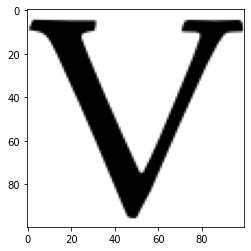


(true_class == predicted_class).item()=True
capV 0.5537437200546265
capV 0.5537437200546265


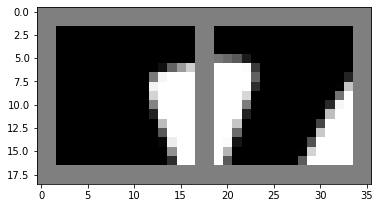


(true_class == predicted_class).item()=True
capV 0.49854594469070435
capV 0.49854594469070435


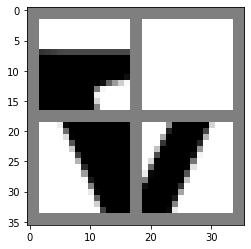


(true_class == predicted_class).item()=True
capV 0.6899275779724121
capV 0.6899275779724121


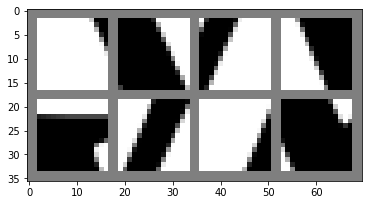


126 AJensonPro-Capt capW


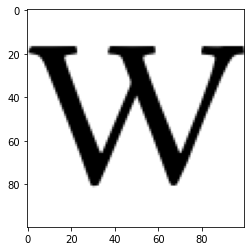


(true_class == predicted_class).item()=True
capW 0.8627989888191223
capW 0.8627989888191223


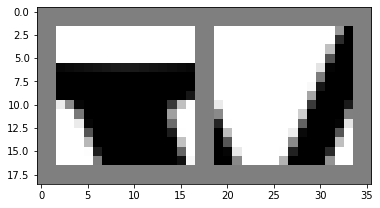


(true_class == predicted_class).item()=True
capW 0.7217831611633301
capW 0.7217831611633301


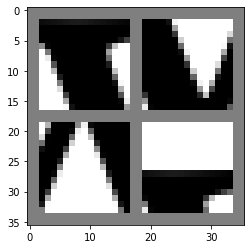


(true_class == predicted_class).item()=True
capW 0.7842989563941956
capW 0.7842989563941956


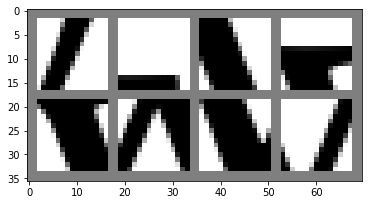


127 AJensonPro-Capt capX


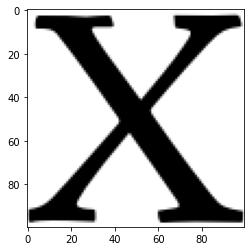


(true_class == predicted_class).item()=True
capX 0.8114072680473328
capX 0.8114072680473328


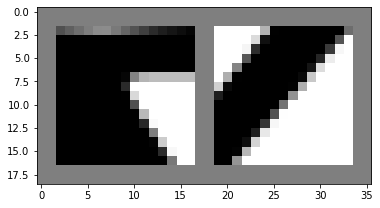


(true_class == predicted_class).item()=True
capX 0.7643343210220337
capX 0.7643343210220337


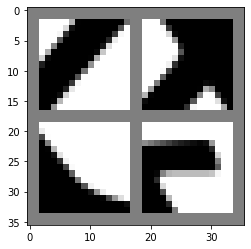


(true_class == predicted_class).item()=True
capX 0.7412548065185547
capX 0.7412548065185547


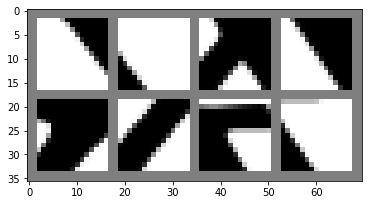


128 AJensonPro-Capt capY


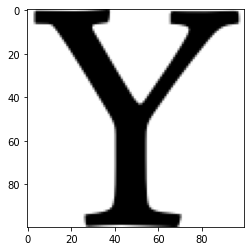


(true_class == predicted_class).item()=True
capY 0.9970667958259583
capY 0.9970667958259583


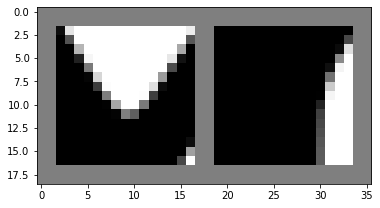


(true_class == predicted_class).item()=True
capY 0.9995989203453064
capY 0.9995989203453064


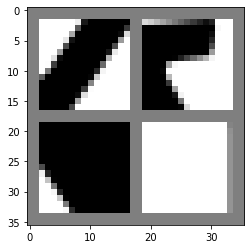


(true_class == predicted_class).item()=True
capY 0.9999032020568848
capY 0.9999032020568848


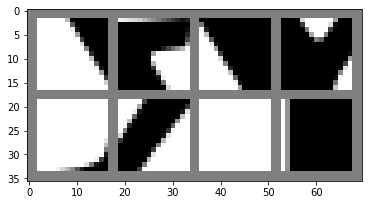


129 AJensonPro-Capt capZ


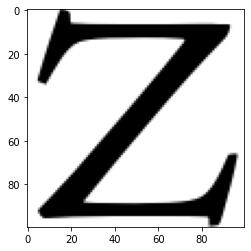


(true_class == predicted_class).item()=True
capZ 0.746029257774353
capZ 0.746029257774353


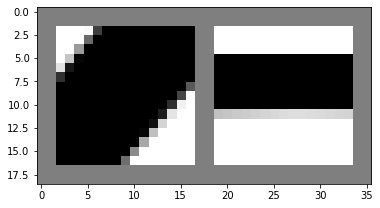


(true_class == predicted_class).item()=True
capZ 0.9982078075408936
capZ 0.9982078075408936


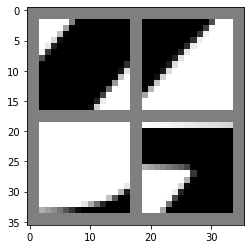


(true_class == predicted_class).item()=True
capZ 0.9802757501602173
capZ 0.9802757501602173


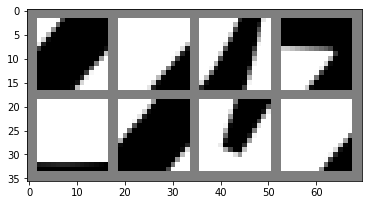


130 AJensonPro-Capt smallA


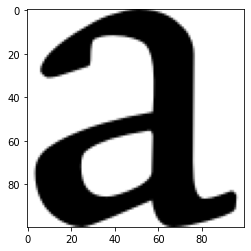


(true_class == predicted_class).item()=True
smallA 0.9962009787559509
smallA 0.9962009787559509


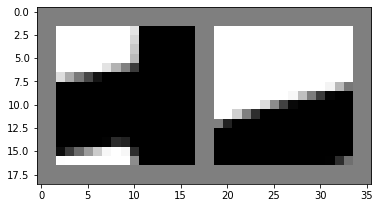


(true_class == predicted_class).item()=True
smallA 0.9999860525131226
smallA 0.9999860525131226


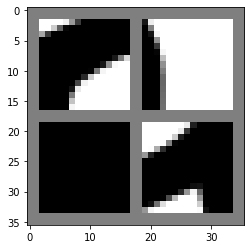


(true_class == predicted_class).item()=True
smallA 1.0
smallA 1.0


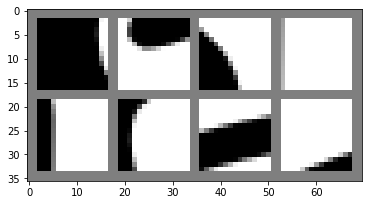


131 AJensonPro-Capt smallB


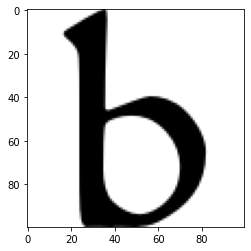


(true_class == predicted_class).item()=True
smallB 0.9923340082168579
smallB 0.9923340082168579


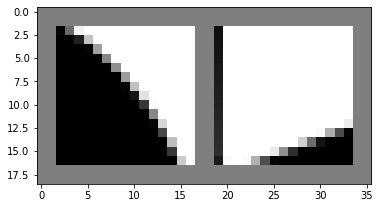


(true_class == predicted_class).item()=True
smallB 0.9124715328216553
smallB 0.9124715328216553


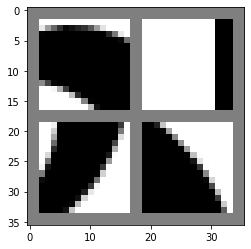


(true_class == predicted_class).item()=True
smallB 0.9998886585235596
smallB 0.9998886585235596


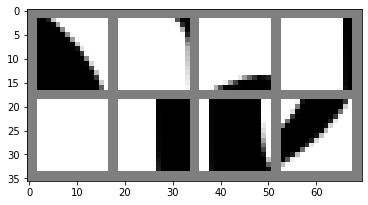


132 AJensonPro-Capt smallC


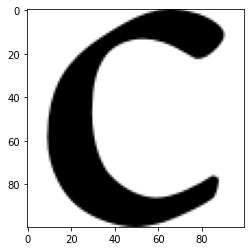


(true_class == predicted_class).item()=True
smallC 0.3823670744895935
smallC 0.3823670744895935


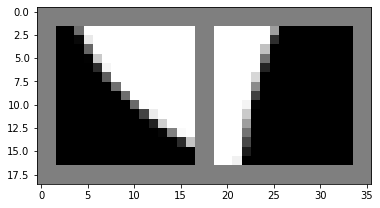


(true_class == predicted_class).item()=False
smallC 0.4413796663284302
capC 0.4518311619758606


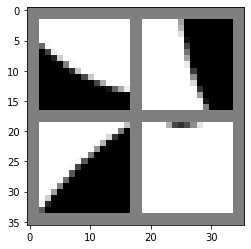


(true_class == predicted_class).item()=True
smallC 0.8902789354324341
smallC 0.8902789354324341


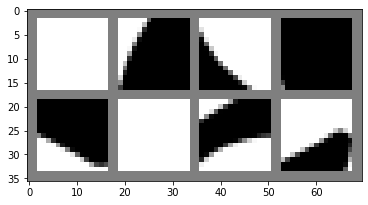


133 AJensonPro-Capt smallD


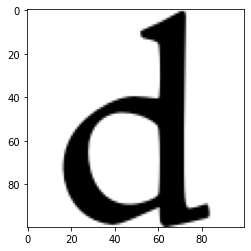


(true_class == predicted_class).item()=True
smallD 0.48652029037475586
smallD 0.48652029037475586


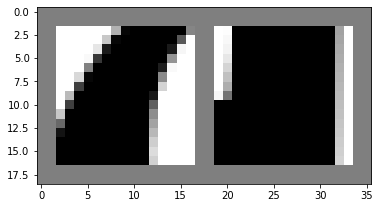


(true_class == predicted_class).item()=True
smallD 0.9929112792015076
smallD 0.9929112792015076


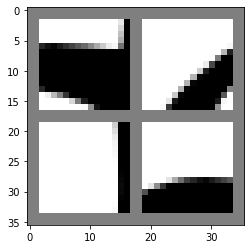


(true_class == predicted_class).item()=True
smallD 0.9999803304672241
smallD 0.9999803304672241


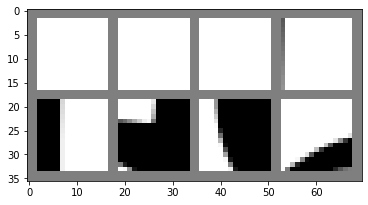


134 AJensonPro-Capt smallE


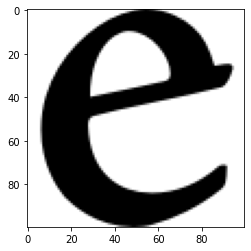


(true_class == predicted_class).item()=True
smallE 0.6831957697868347
smallE 0.6831957697868347


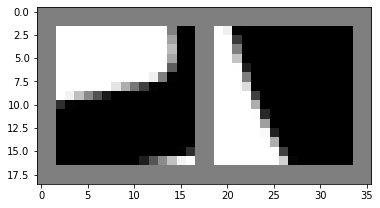


(true_class == predicted_class).item()=True
smallE 0.9999991655349731
smallE 0.9999991655349731


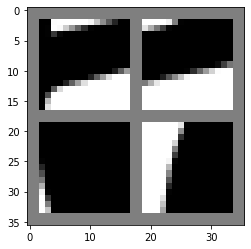


(true_class == predicted_class).item()=True
smallE 0.9999972581863403
smallE 0.9999972581863403


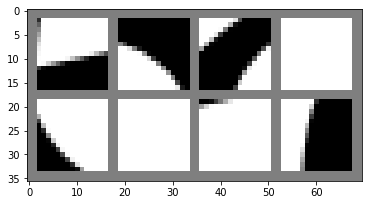


135 AJensonPro-Capt smallF


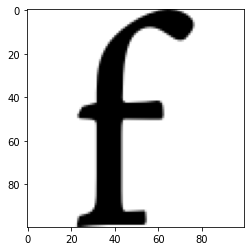


(true_class == predicted_class).item()=True
smallF 0.9375947713851929
smallF 0.9375947713851929


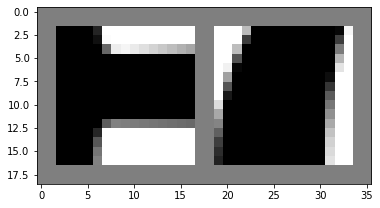


(true_class == predicted_class).item()=True
smallF 0.9998350143432617
smallF 0.9998350143432617


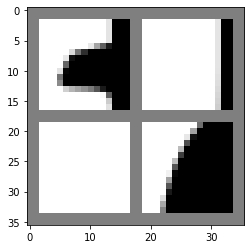


(true_class == predicted_class).item()=True
smallF 0.9999971389770508
smallF 0.9999971389770508


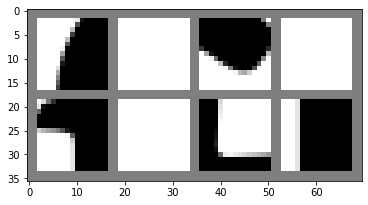


136 AJensonPro-Capt smallG


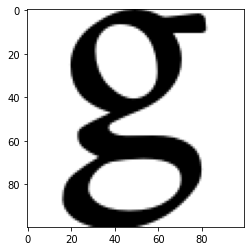


(true_class == predicted_class).item()=True
smallG 0.9999867677688599
smallG 0.9999867677688599


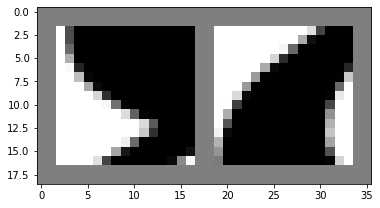


(true_class == predicted_class).item()=True
smallG 0.9999862909317017
smallG 0.9999862909317017


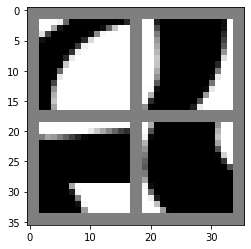


(true_class == predicted_class).item()=True
smallG 0.9999957084655762
smallG 0.9999957084655762


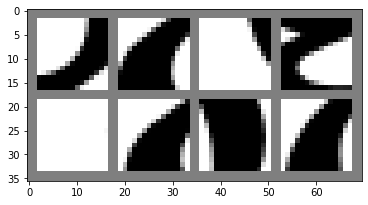


137 AJensonPro-Capt smallH


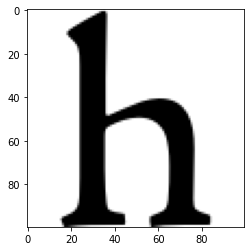


(true_class == predicted_class).item()=False
smallH 0.42330923676490784
smallB 0.5730307698249817


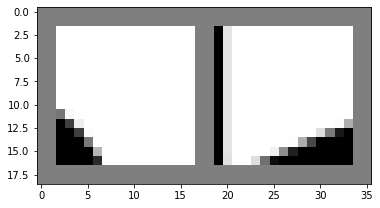


(true_class == predicted_class).item()=False
smallH 0.4649498164653778
smallM 0.5315568447113037


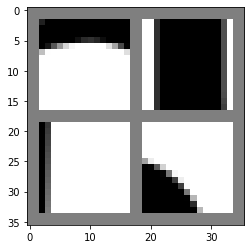


(true_class == predicted_class).item()=True
smallH 0.9651308059692383
smallH 0.9651308059692383


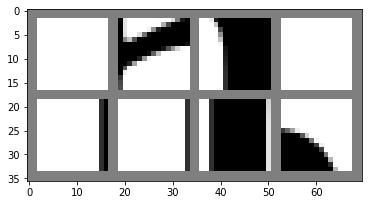


138 AJensonPro-Capt smallI


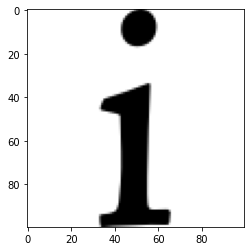


(true_class == predicted_class).item()=True
smallI 0.6258383989334106
smallI 0.6258383989334106


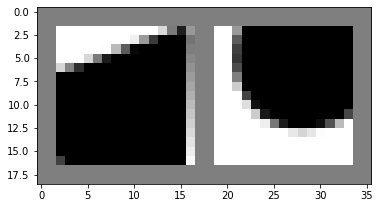


(true_class == predicted_class).item()=True
smallI 0.9696169495582581
smallI 0.9696169495582581


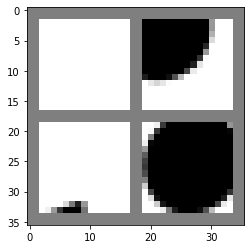


(true_class == predicted_class).item()=True
smallI 0.9190025329589844
smallI 0.9190025329589844


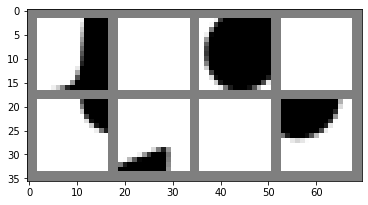


139 AJensonPro-Capt smallJ


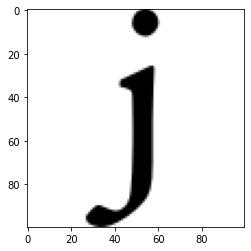


(true_class == predicted_class).item()=True
smallJ 0.6703535318374634
smallJ 0.6703535318374634


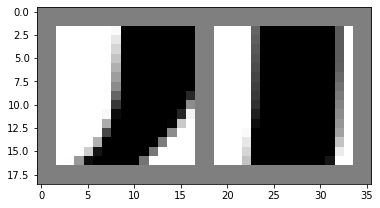


(true_class == predicted_class).item()=True
smallJ 0.9973520040512085
smallJ 0.9973520040512085


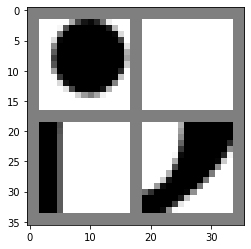


(true_class == predicted_class).item()=True
smallJ 0.9984493255615234
smallJ 0.9984493255615234


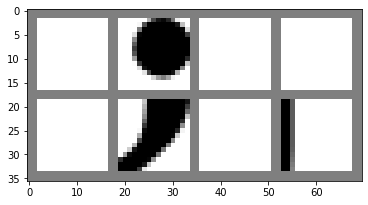


140 AJensonPro-Capt smallK


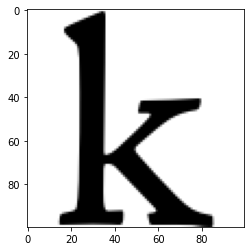


(true_class == predicted_class).item()=True
smallK 0.9418464303016663
smallK 0.9418464303016663


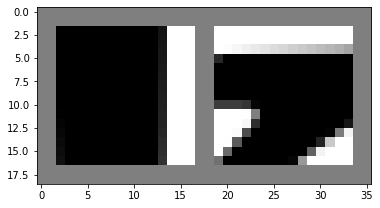


(true_class == predicted_class).item()=True
smallK 0.7883092164993286
smallK 0.7883092164993286


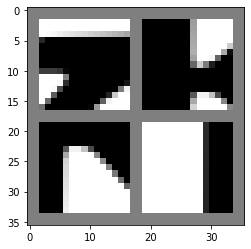


(true_class == predicted_class).item()=True
smallK 0.9999940395355225
smallK 0.9999940395355225


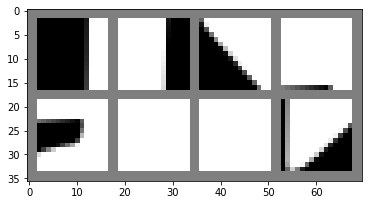


141 AJensonPro-Capt smallL


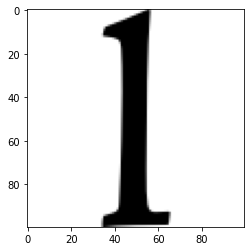


(true_class == predicted_class).item()=False
smallL 0.10958918184041977
smallF 0.4405727684497833


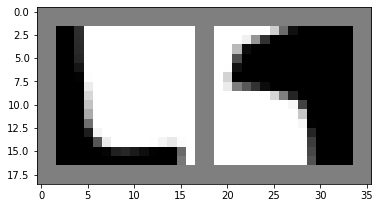


(true_class == predicted_class).item()=True
smallL 0.4783918559551239
smallL 0.4783918559551239


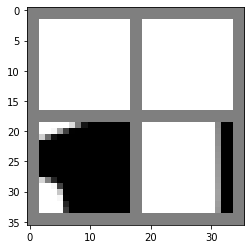


(true_class == predicted_class).item()=True
smallL 0.6275227069854736
smallL 0.6275227069854736


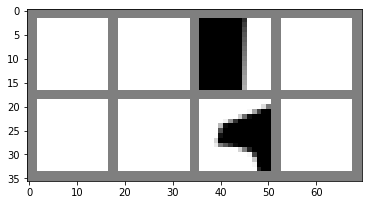


142 AJensonPro-Capt smallM


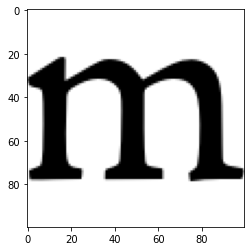


(true_class == predicted_class).item()=True
smallM 0.9996743202209473
smallM 0.9996743202209473


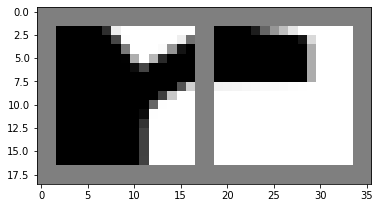


(true_class == predicted_class).item()=True
smallM 0.9993927478790283
smallM 0.9993927478790283


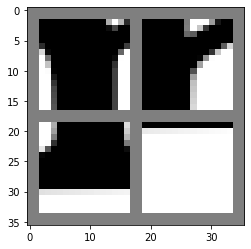


(true_class == predicted_class).item()=True
smallM 0.9999978542327881
smallM 0.9999978542327881


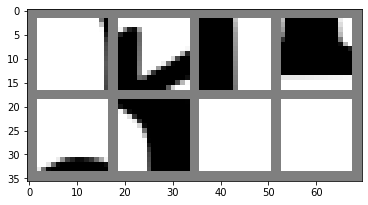


143 AJensonPro-Capt smallN


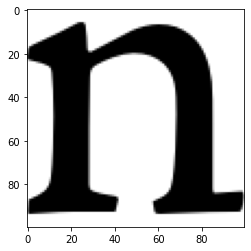


(true_class == predicted_class).item()=True
smallN 0.6017919778823853
smallN 0.6017919778823853


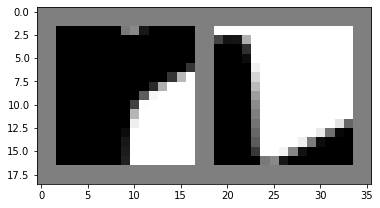


(true_class == predicted_class).item()=True
smallN 0.9952404499053955
smallN 0.9952404499053955


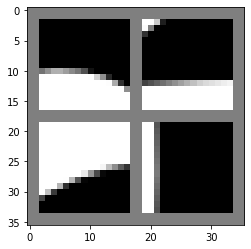


(true_class == predicted_class).item()=True
smallN 0.990670919418335
smallN 0.990670919418335


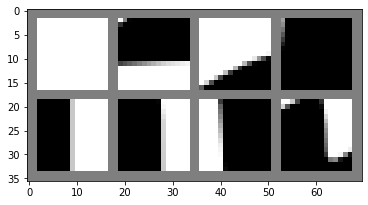


144 AJensonPro-Capt smallO


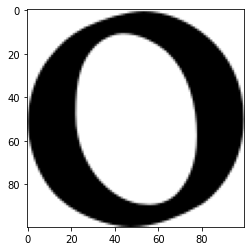


(true_class == predicted_class).item()=True
smallO 0.48829197883605957
smallO 0.48829197883605957


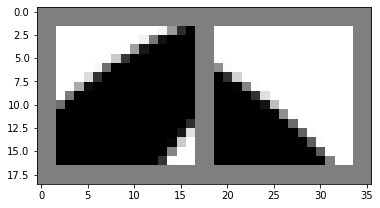


(true_class == predicted_class).item()=False
smallO 0.48276105523109436
capO 0.5099532604217529


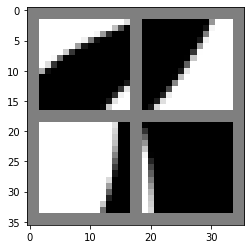


(true_class == predicted_class).item()=True
smallO 0.7862643599510193
smallO 0.7862643599510193


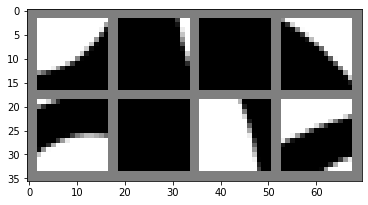


145 AJensonPro-Capt smallP


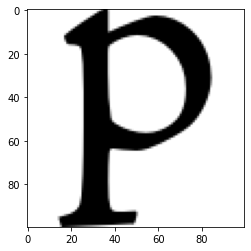


(true_class == predicted_class).item()=True
smallP 0.947821319103241
smallP 0.947821319103241


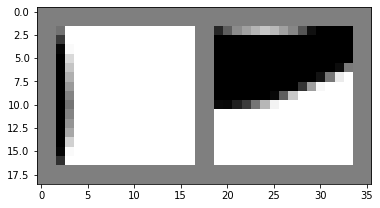


(true_class == predicted_class).item()=True
smallP 0.9931418299674988
smallP 0.9931418299674988


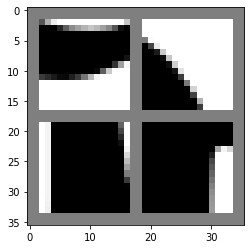


(true_class == predicted_class).item()=True
smallP 0.9994402527809143
smallP 0.9994402527809143


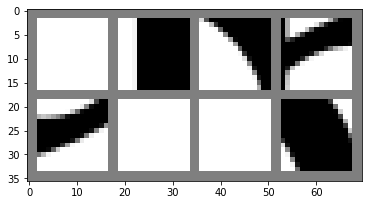


146 AJensonPro-Capt smallQ


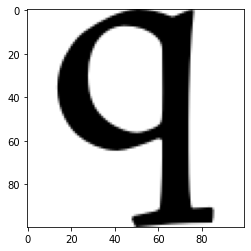


(true_class == predicted_class).item()=True
smallQ 0.9227914214134216
smallQ 0.9227914214134216


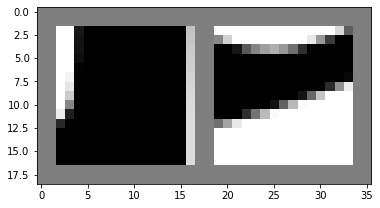


(true_class == predicted_class).item()=True
smallQ 0.9461222290992737
smallQ 0.9461222290992737


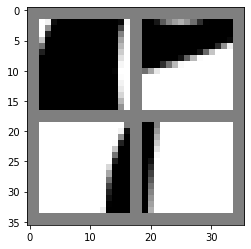


(true_class == predicted_class).item()=True
smallQ 0.9998754262924194
smallQ 0.9998754262924194


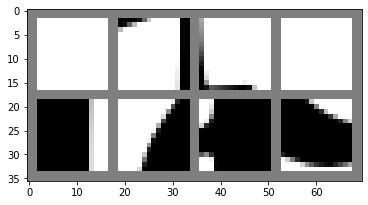


147 AJensonPro-Capt smallR


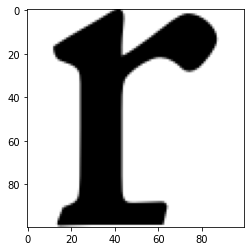


(true_class == predicted_class).item()=True
smallR 0.8439657688140869
smallR 0.8439657688140869


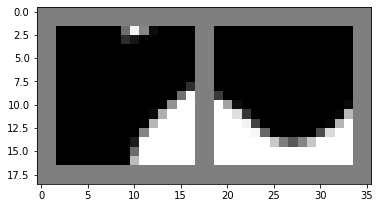


(true_class == predicted_class).item()=True
smallR 0.9868822693824768
smallR 0.9868822693824768


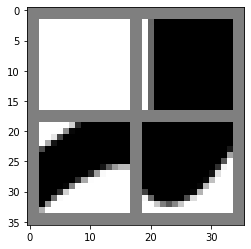


(true_class == predicted_class).item()=True
smallR 0.9994181394577026
smallR 0.9994181394577026


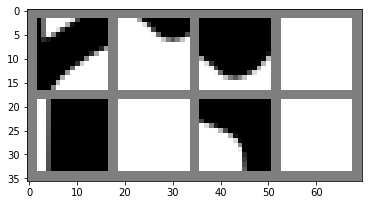


148 AJensonPro-Capt smallS


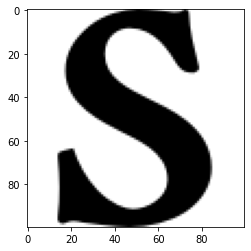


(true_class == predicted_class).item()=False
smallS 0.4042647182941437
capS 0.5956013798713684


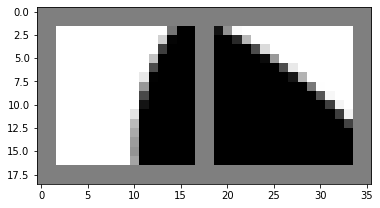


(true_class == predicted_class).item()=False
smallS 0.47353020310401917
capS 0.5264235138893127


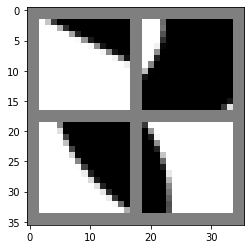


(true_class == predicted_class).item()=True
smallS 0.8048517107963562
smallS 0.8048517107963562


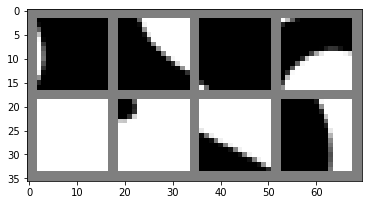


149 AJensonPro-Capt smallT


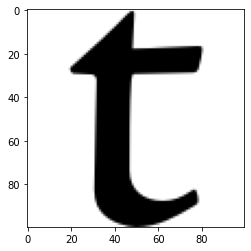


(true_class == predicted_class).item()=True
smallT 0.9579589366912842
smallT 0.9579589366912842


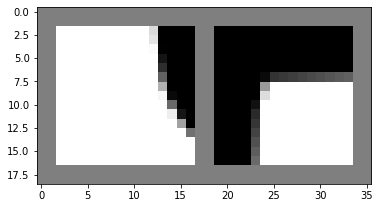


(true_class == predicted_class).item()=True
smallT 0.9852557182312012
smallT 0.9852557182312012


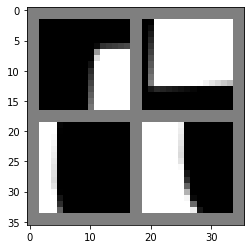


(true_class == predicted_class).item()=True
smallT 0.9997798800468445
smallT 0.9997798800468445


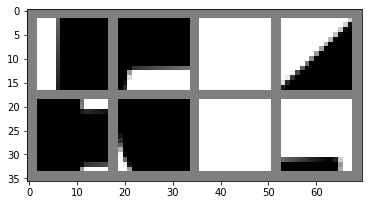


150 AJensonPro-Capt smallU


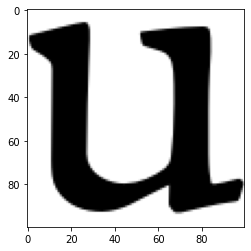


(true_class == predicted_class).item()=True
smallU 0.9946523904800415
smallU 0.9946523904800415


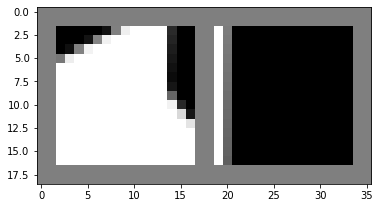


(true_class == predicted_class).item()=True
smallU 0.9997218251228333
smallU 0.9997218251228333


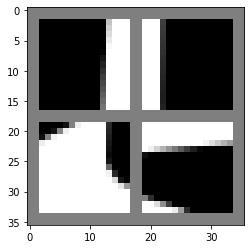


(true_class == predicted_class).item()=True
smallU 0.9993332028388977
smallU 0.9993332028388977


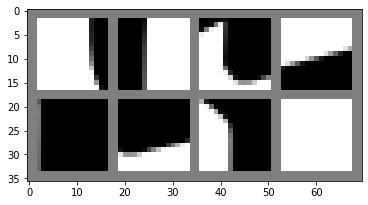


151 AJensonPro-Capt smallV


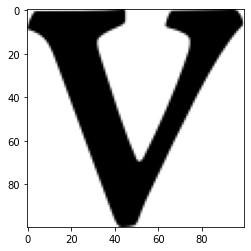


(true_class == predicted_class).item()=False
smallV 0.2945844233036041
capV 0.3248613178730011


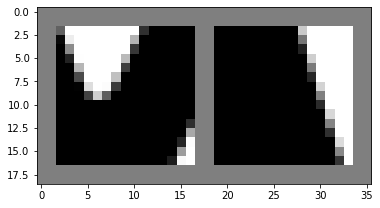


(true_class == predicted_class).item()=False
smallV 0.4749867916107178
capV 0.5029339790344238


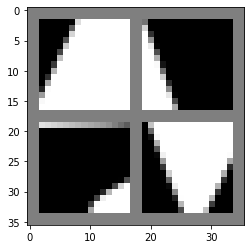


(true_class == predicted_class).item()=True
smallV 0.5539043545722961
smallV 0.5539043545722961


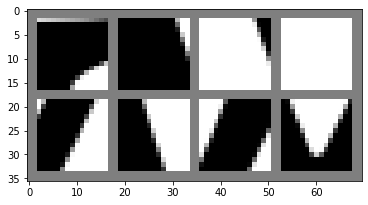


152 AJensonPro-Capt smallW


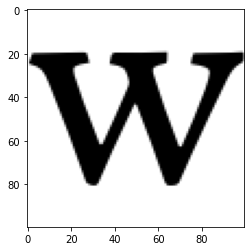


(true_class == predicted_class).item()=False
smallW 0.4741249680519104
capW 0.4993317723274231


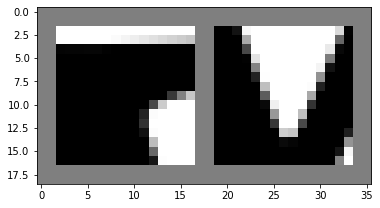


(true_class == predicted_class).item()=False
smallW 0.4688427448272705
capW 0.5311235785484314


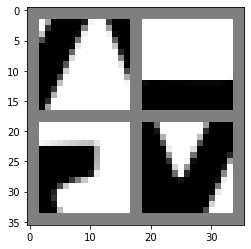


(true_class == predicted_class).item()=True
smallW 0.7253935933113098
smallW 0.7253935933113098


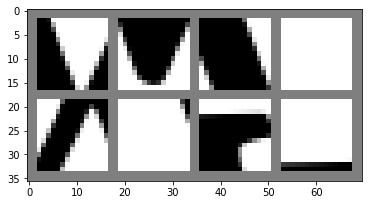


153 AJensonPro-Capt smallX


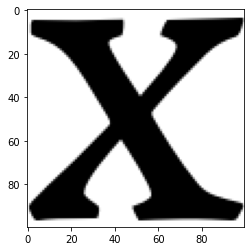


(true_class == predicted_class).item()=False
smallX 0.4273104965686798
capX 0.5725773572921753


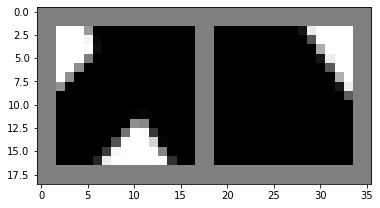


(true_class == predicted_class).item()=False
smallX 0.41004467010498047
capX 0.589931309223175


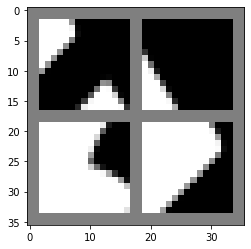


(true_class == predicted_class).item()=True
smallX 0.7241721749305725
smallX 0.7241721749305725


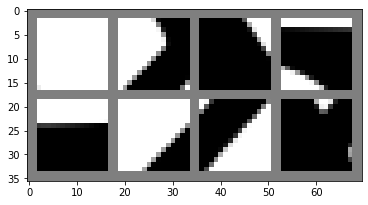


154 AJensonPro-Capt smallY


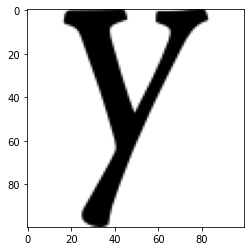


(true_class == predicted_class).item()=True
smallY 0.9728978276252747
smallY 0.9728978276252747


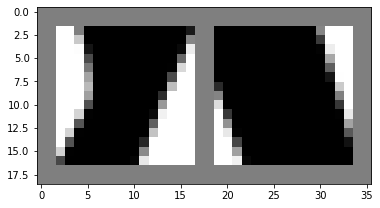


(true_class == predicted_class).item()=True
smallY 0.9994556307792664
smallY 0.9994556307792664


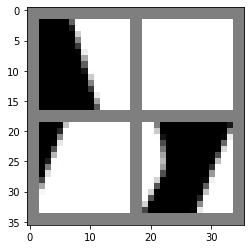


(true_class == predicted_class).item()=True
smallY 0.9999762773513794
smallY 0.9999762773513794


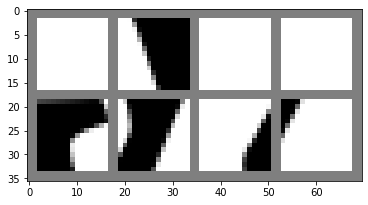


155 AJensonPro-Capt smallZ


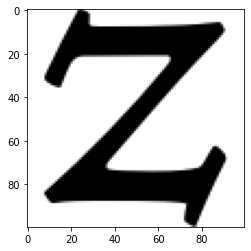


(true_class == predicted_class).item()=True
smallZ 0.7553848624229431
smallZ 0.7553848624229431


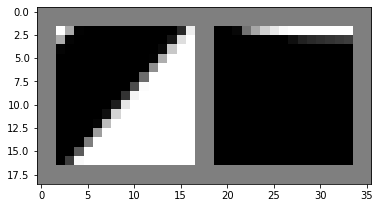


(true_class == predicted_class).item()=True
smallZ 0.5954900979995728
smallZ 0.5954900979995728


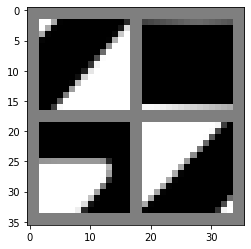


(true_class == predicted_class).item()=False
smallZ 0.49084770679473877
capZ 0.5091519355773926


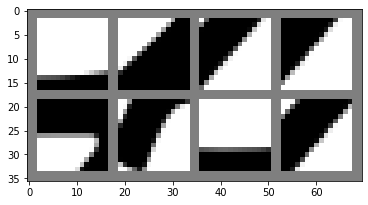


156 AJensonPro-Disp capA


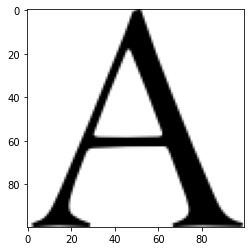


(true_class == predicted_class).item()=True
capA 0.9994874000549316
capA 0.9994874000549316


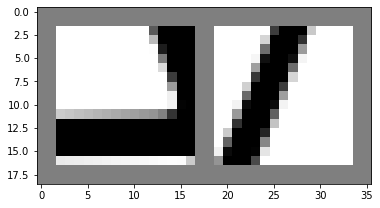


(true_class == predicted_class).item()=True
capA 0.997149646282196
capA 0.997149646282196


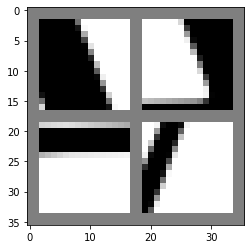


(true_class == predicted_class).item()=True
capA 0.9991875290870667
capA 0.9991875290870667


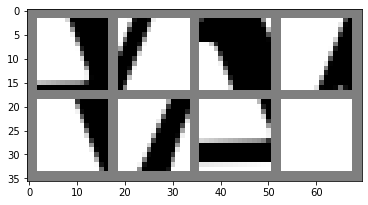


157 AJensonPro-Disp capB


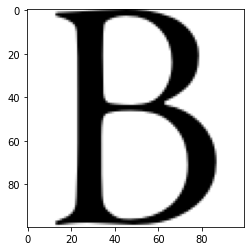


(true_class == predicted_class).item()=True
capB 0.9925520420074463
capB 0.9925520420074463


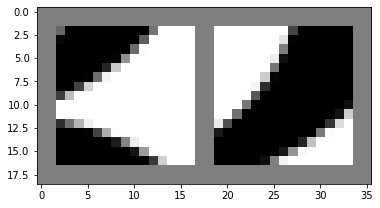


(true_class == predicted_class).item()=True
capB 0.9954267144203186
capB 0.9954267144203186


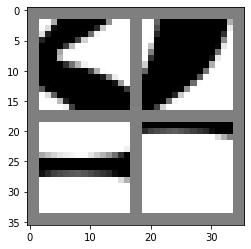


(true_class == predicted_class).item()=True
capB 0.9964659214019775
capB 0.9964659214019775


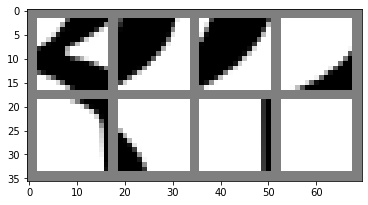


158 AJensonPro-Disp capC


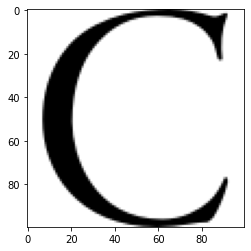


(true_class == predicted_class).item()=True
capC 0.5311890244483948
capC 0.5311890244483948


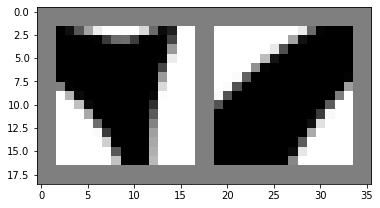


(true_class == predicted_class).item()=True
capC 0.7056190967559814
capC 0.7056190967559814


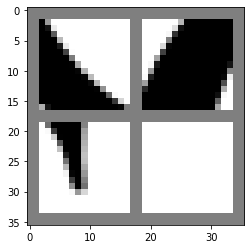


(true_class == predicted_class).item()=True
capC 0.951328694820404
capC 0.951328694820404


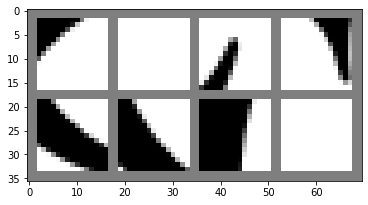


159 AJensonPro-Disp capD


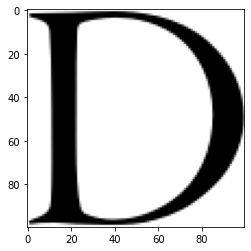


(true_class == predicted_class).item()=True
capD 0.9147308468818665
capD 0.9147308468818665


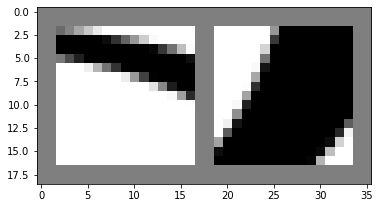


(true_class == predicted_class).item()=True
capD 0.9306372404098511
capD 0.9306372404098511


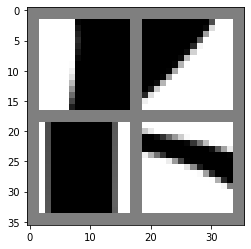


(true_class == predicted_class).item()=True
capD 0.9655009508132935
capD 0.9655009508132935


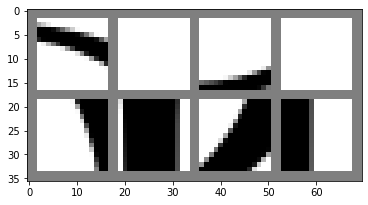


160 AJensonPro-Disp capE


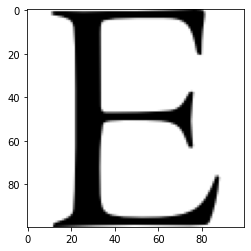


(true_class == predicted_class).item()=True
capE 0.7024418115615845
capE 0.7024418115615845


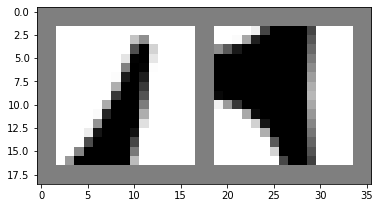


(true_class == predicted_class).item()=True
capE 0.9714531898498535
capE 0.9714531898498535


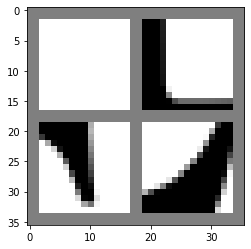


(true_class == predicted_class).item()=True
capE 0.9962635636329651
capE 0.9962635636329651


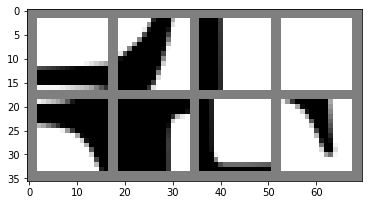


161 AJensonPro-Disp capF


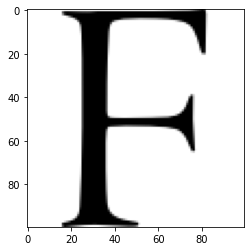


(true_class == predicted_class).item()=True
capF 0.523826539516449
capF 0.523826539516449


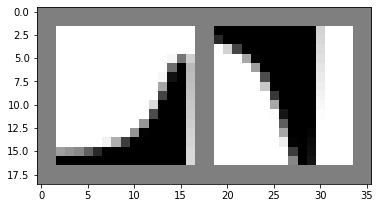


(true_class == predicted_class).item()=False
capF 0.15677089989185333
capE 0.8422598242759705


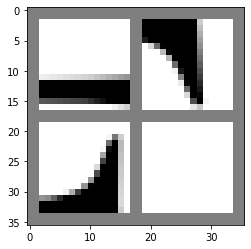


(true_class == predicted_class).item()=True
capF 0.5959115624427795
capF 0.5959115624427795


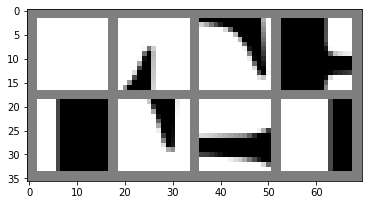


162 AJensonPro-Disp capG


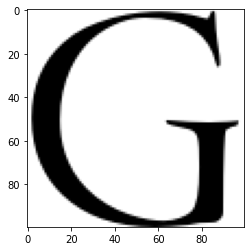


(true_class == predicted_class).item()=True
capG 0.9936075210571289
capG 0.9936075210571289


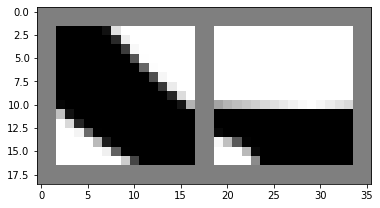


(true_class == predicted_class).item()=True
capG 0.5409197807312012
capG 0.5409197807312012


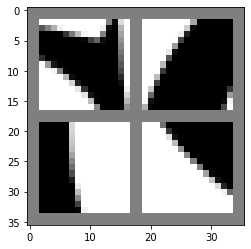


(true_class == predicted_class).item()=True
capG 0.9913699626922607
capG 0.9913699626922607


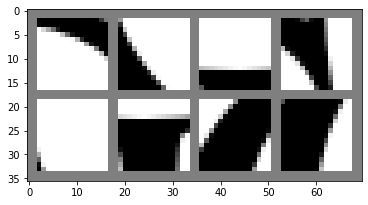


163 AJensonPro-Disp capH


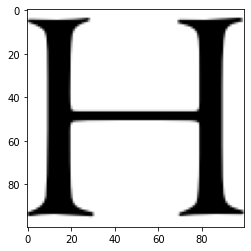


(true_class == predicted_class).item()=True
capH 0.5246086120605469
capH 0.5246086120605469


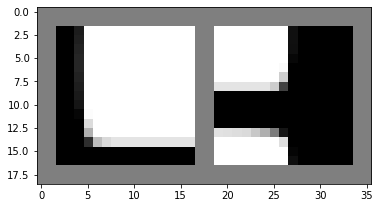


(true_class == predicted_class).item()=True
capH 0.9982942938804626
capH 0.9982942938804626


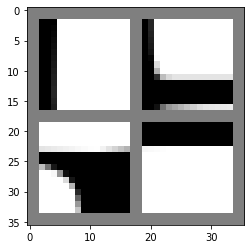


(true_class == predicted_class).item()=True
capH 0.9941492080688477
capH 0.9941492080688477


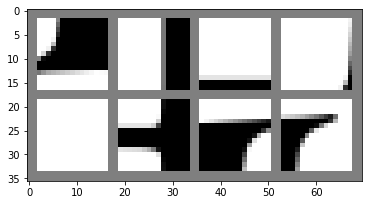


164 AJensonPro-Disp capI


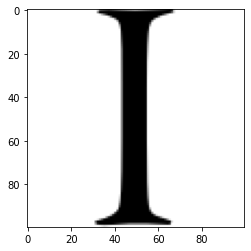


(true_class == predicted_class).item()=False
capI 0.19036062061786652
capU 0.24608354270458221


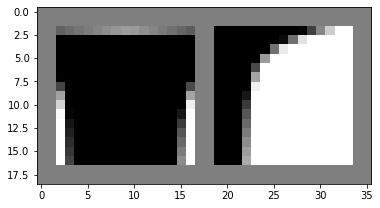


(true_class == predicted_class).item()=True
capI 0.4110848009586334
capI 0.4110848009586334


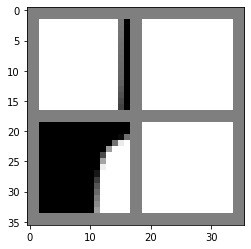


(true_class == predicted_class).item()=False
capI 0.44555437564849854
smallL 0.4519219696521759


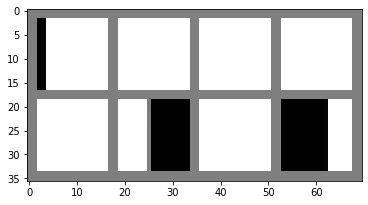


165 AJensonPro-Disp capJ


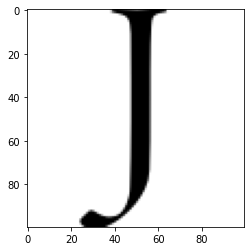


(true_class == predicted_class).item()=False
capJ 0.19300739467144012
smallJ 0.793544590473175


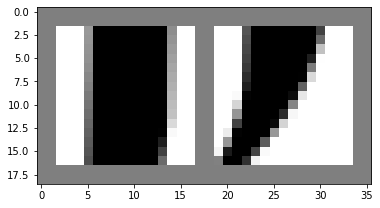


(true_class == predicted_class).item()=True
capJ 0.948206901550293
capJ 0.948206901550293


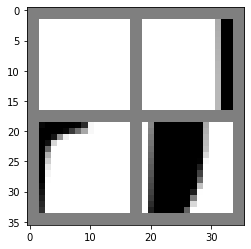


(true_class == predicted_class).item()=False
capJ 0.3885248899459839
smallJ 0.6026263236999512


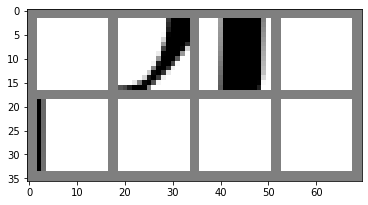


166 AJensonPro-Disp capK


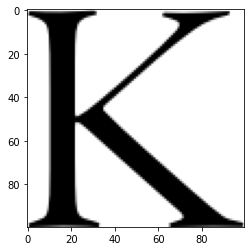


(true_class == predicted_class).item()=True
capK 0.8503615856170654
capK 0.8503615856170654


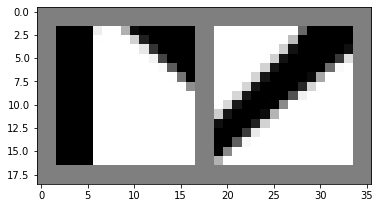


(true_class == predicted_class).item()=True
capK 0.9898217916488647
capK 0.9898217916488647


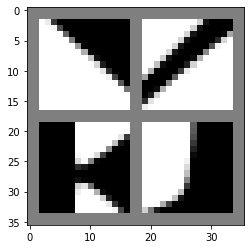


(true_class == predicted_class).item()=True
capK 0.9904329776763916
capK 0.9904329776763916


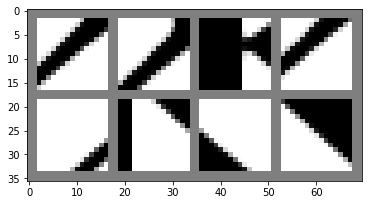


167 AJensonPro-Disp capL


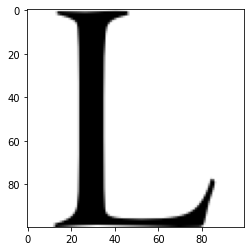


(true_class == predicted_class).item()=True
capL 0.44064798951148987
capL 0.44064798951148987


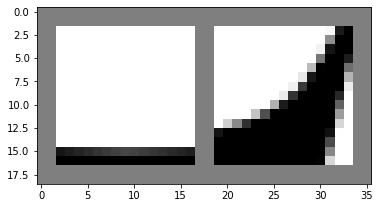


(true_class == predicted_class).item()=True
capL 0.6047747135162354
capL 0.6047747135162354


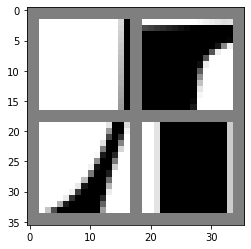


(true_class == predicted_class).item()=True
capL 0.9663541316986084
capL 0.9663541316986084


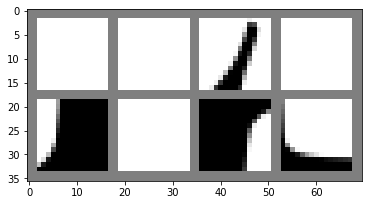


168 AJensonPro-Disp capM


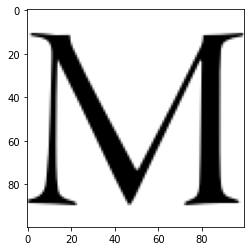


(true_class == predicted_class).item()=True
capM 0.9999927282333374
capM 0.9999927282333374


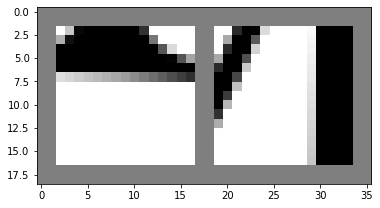


(true_class == predicted_class).item()=True
capM 0.9973506927490234
capM 0.9973506927490234


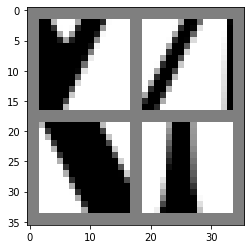


(true_class == predicted_class).item()=True
capM 0.9999505281448364
capM 0.9999505281448364


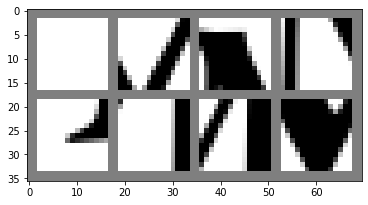


169 AJensonPro-Disp capN


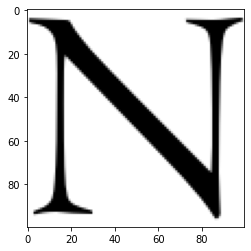


(true_class == predicted_class).item()=True
capN 0.9875247478485107
capN 0.9875247478485107


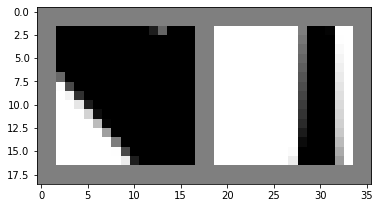


(true_class == predicted_class).item()=True
capN 0.9066874384880066
capN 0.9066874384880066


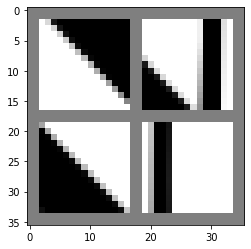


(true_class == predicted_class).item()=True
capN 0.9854845404624939
capN 0.9854845404624939


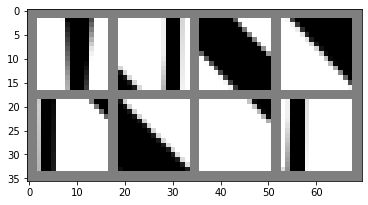


170 AJensonPro-Disp capO


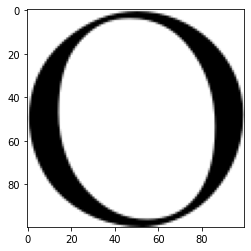


(true_class == predicted_class).item()=True
capO 0.6368662714958191
capO 0.6368662714958191


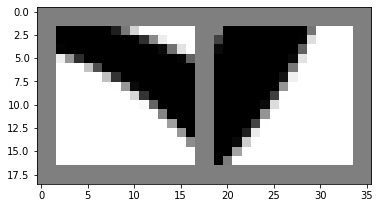


(true_class == predicted_class).item()=True
capO 0.8192291259765625
capO 0.8192291259765625


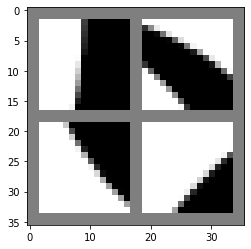


(true_class == predicted_class).item()=True
capO 0.8461909294128418
capO 0.8461909294128418


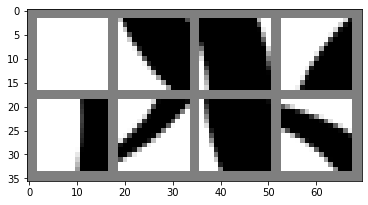


171 AJensonPro-Disp capP


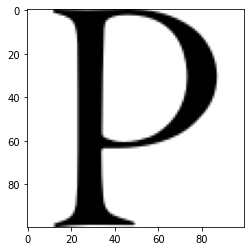


(true_class == predicted_class).item()=True
capP 0.7422139048576355
capP 0.7422139048576355


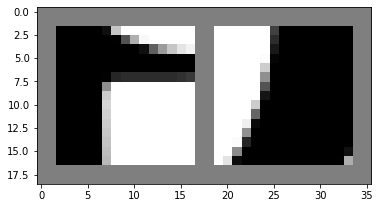


(true_class == predicted_class).item()=True
capP 0.905501663684845
capP 0.905501663684845


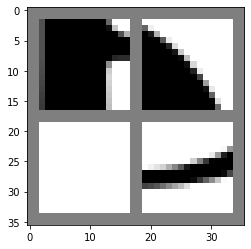


(true_class == predicted_class).item()=True
capP 0.998875081539154
capP 0.998875081539154


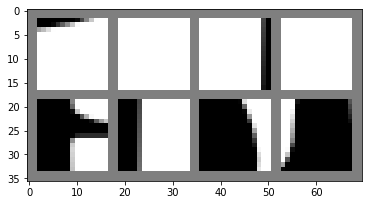


172 AJensonPro-Disp capQ


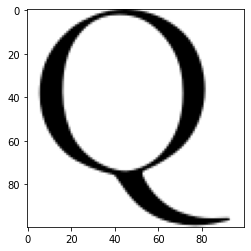


(true_class == predicted_class).item()=True
capQ 0.9491110444068909
capQ 0.9491110444068909


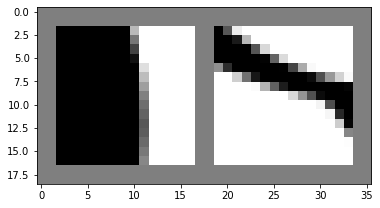


(true_class == predicted_class).item()=True
capQ 0.9505764245986938
capQ 0.9505764245986938


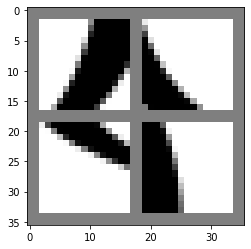


(true_class == predicted_class).item()=True
capQ 0.9990020394325256
capQ 0.9990020394325256


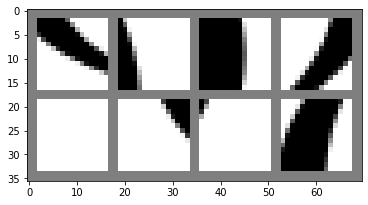


173 AJensonPro-Disp capR


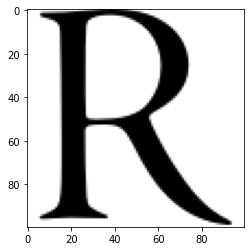


(true_class == predicted_class).item()=True
capR 0.9886423945426941
capR 0.9886423945426941


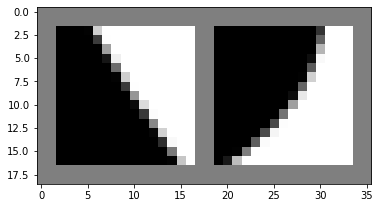


(true_class == predicted_class).item()=True
capR 0.9937981963157654
capR 0.9937981963157654


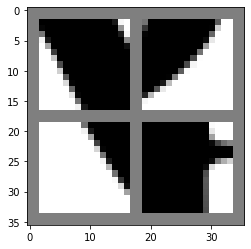


(true_class == predicted_class).item()=True
capR 0.9734272956848145
capR 0.9734272956848145


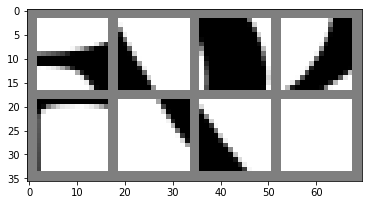


174 AJensonPro-Disp capS


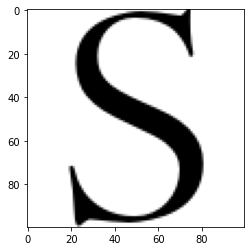


(true_class == predicted_class).item()=True
capS 0.6247637271881104
capS 0.6247637271881104


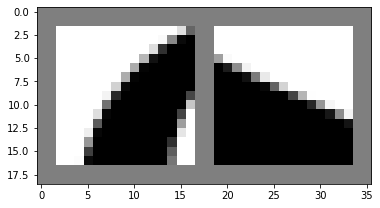


(true_class == predicted_class).item()=True
capS 0.796264111995697
capS 0.796264111995697


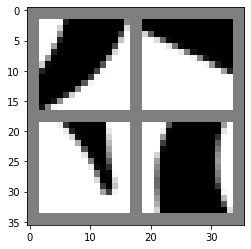


(true_class == predicted_class).item()=True
capS 0.8327358365058899
capS 0.8327358365058899


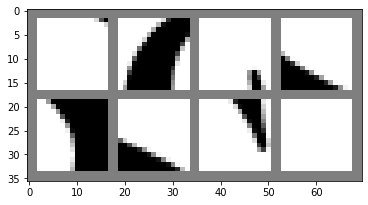


175 AJensonPro-Disp capT


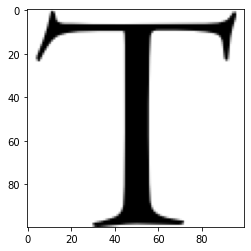


(true_class == predicted_class).item()=False
capT 0.028075354173779488
capF 0.556764543056488


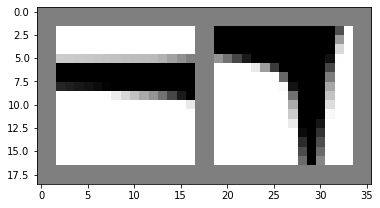


(true_class == predicted_class).item()=True
capT 0.9596761465072632
capT 0.9596761465072632


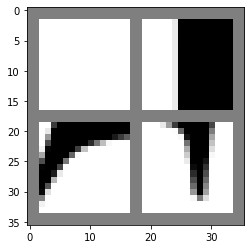


(true_class == predicted_class).item()=True
capT 0.9982688426971436
capT 0.9982688426971436


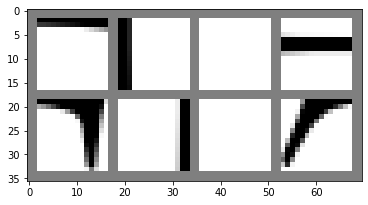


176 AJensonPro-Disp capU


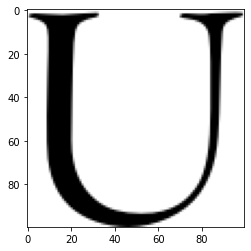


(true_class == predicted_class).item()=True
capU 0.9967458248138428
capU 0.9967458248138428


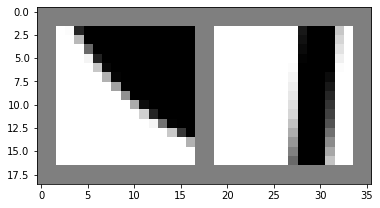


(true_class == predicted_class).item()=True
capU 0.9996147155761719
capU 0.9996147155761719


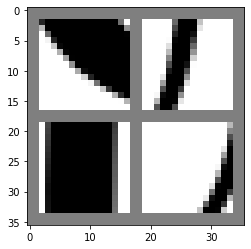


(true_class == predicted_class).item()=True
capU 0.9999854564666748
capU 0.9999854564666748


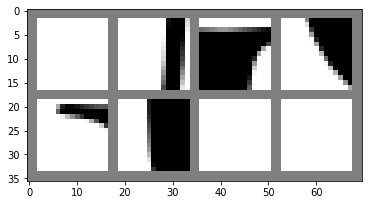


177 AJensonPro-Disp capV


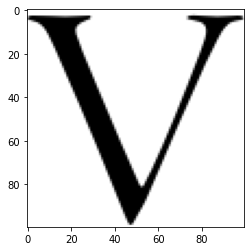


(true_class == predicted_class).item()=False
capV 0.161188006401062
capW 0.4773711860179901


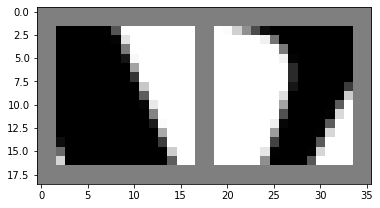


(true_class == predicted_class).item()=True
capV 0.8019164800643921
capV 0.8019164800643921


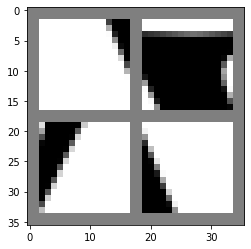


(true_class == predicted_class).item()=True
capV 0.6748814582824707
capV 0.6748814582824707


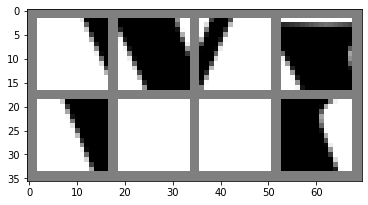


178 AJensonPro-Disp capW


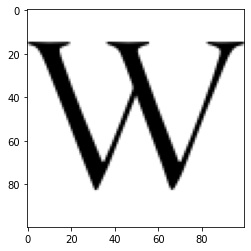


(true_class == predicted_class).item()=True
capW 0.8599262237548828
capW 0.8599262237548828


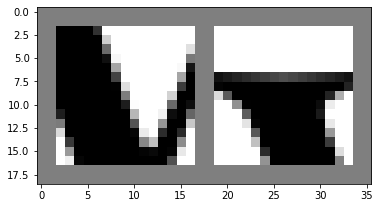


(true_class == predicted_class).item()=True
capW 0.913138210773468
capW 0.913138210773468


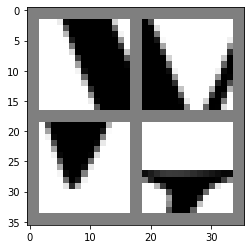


(true_class == predicted_class).item()=True
capW 0.8238014578819275
capW 0.8238014578819275


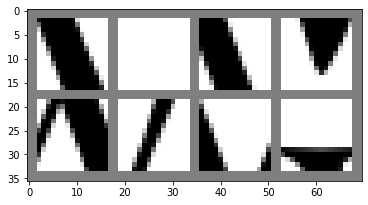


179 AJensonPro-Disp capX


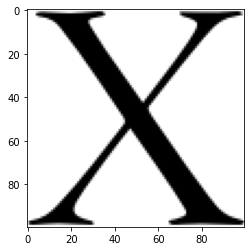


(true_class == predicted_class).item()=True
capX 0.6508655548095703
capX 0.6508655548095703


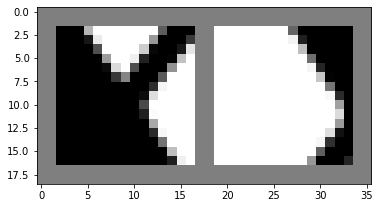


(true_class == predicted_class).item()=True
capX 0.709751546382904
capX 0.709751546382904


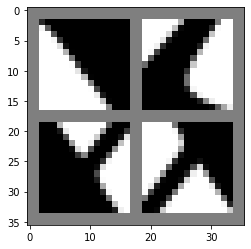


(true_class == predicted_class).item()=True
capX 0.8182377815246582
capX 0.8182377815246582


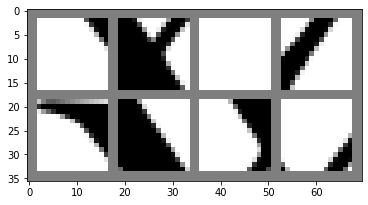


180 AJensonPro-Disp capY


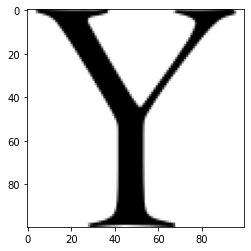


(true_class == predicted_class).item()=True
capY 0.9644088745117188
capY 0.9644088745117188


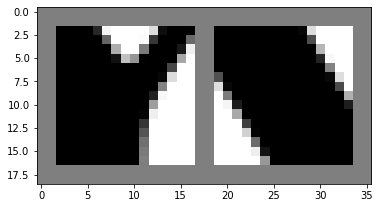


(true_class == predicted_class).item()=True
capY 0.9955134987831116
capY 0.9955134987831116


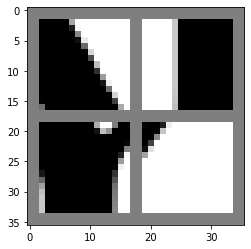


(true_class == predicted_class).item()=True
capY 0.999847412109375
capY 0.999847412109375


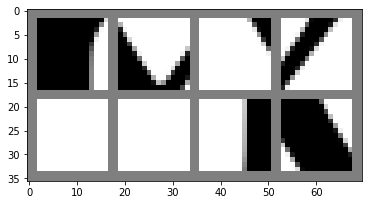


181 AJensonPro-Disp capZ


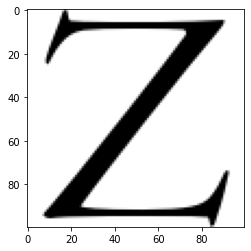


(true_class == predicted_class).item()=True
capZ 0.5025941729545593
capZ 0.5025941729545593


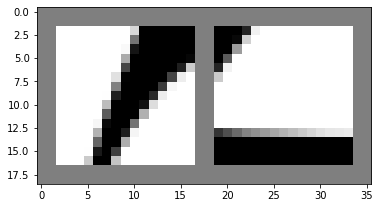


(true_class == predicted_class).item()=True
capZ 0.9646076560020447
capZ 0.9646076560020447


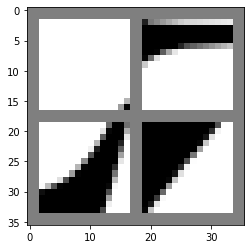


(true_class == predicted_class).item()=True
capZ 0.9456952214241028
capZ 0.9456952214241028


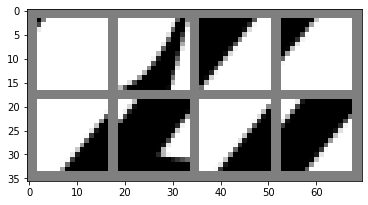


182 AJensonPro-Disp smallA


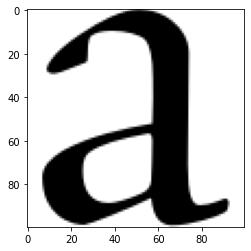


(true_class == predicted_class).item()=True
smallA 0.999771773815155
smallA 0.999771773815155


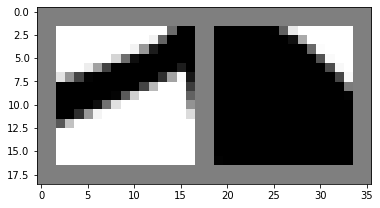


(true_class == predicted_class).item()=True
smallA 0.9954878687858582
smallA 0.9954878687858582


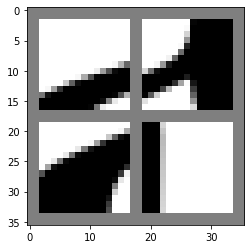


(true_class == predicted_class).item()=True
smallA 0.9999994039535522
smallA 0.9999994039535522


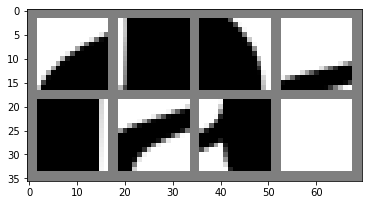


183 AJensonPro-Disp smallB


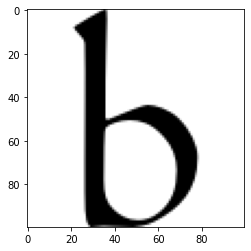


(true_class == predicted_class).item()=True
smallB 0.9902503490447998
smallB 0.9902503490447998


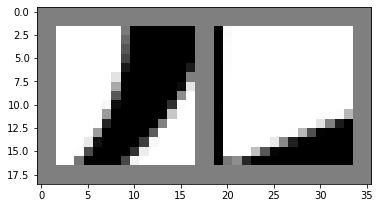


(true_class == predicted_class).item()=True
smallB 0.9809255003929138
smallB 0.9809255003929138


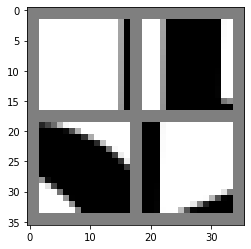


(true_class == predicted_class).item()=True
smallB 0.9843021631240845
smallB 0.9843021631240845


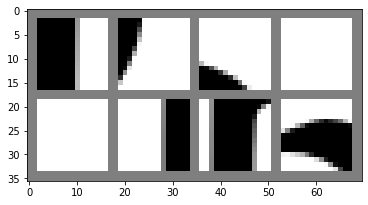


184 AJensonPro-Disp smallC


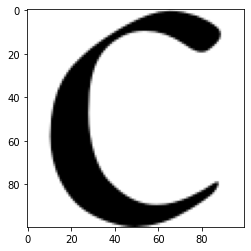


(true_class == predicted_class).item()=True
smallC 0.3322142958641052
smallC 0.3322142958641052


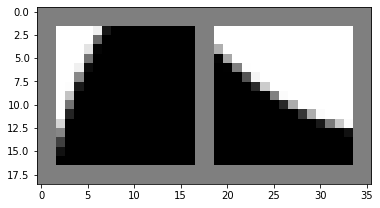


(true_class == predicted_class).item()=True
smallC 0.7055637240409851
smallC 0.7055637240409851


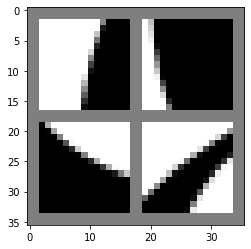


(true_class == predicted_class).item()=True
smallC 0.8926490545272827
smallC 0.8926490545272827


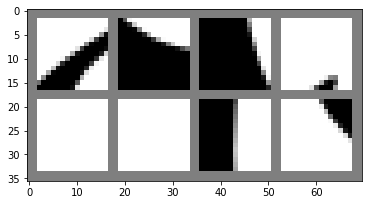


185 AJensonPro-Disp smallD


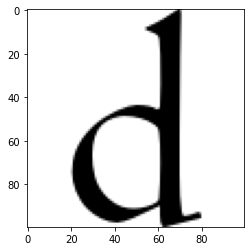


(true_class == predicted_class).item()=True
smallD 0.9980541467666626
smallD 0.9980541467666626


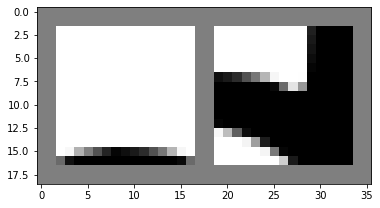


(true_class == predicted_class).item()=True
smallD 0.9937906861305237
smallD 0.9937906861305237


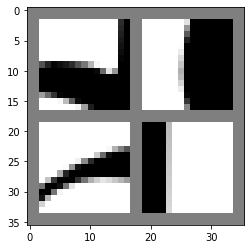


(true_class == predicted_class).item()=True
smallD 0.9999310970306396
smallD 0.9999310970306396


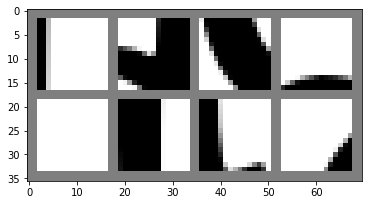


186 AJensonPro-Disp smallE


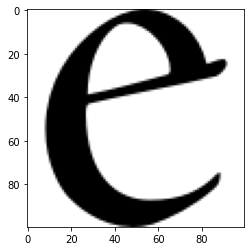


(true_class == predicted_class).item()=True
smallE 0.9985266923904419
smallE 0.9985266923904419


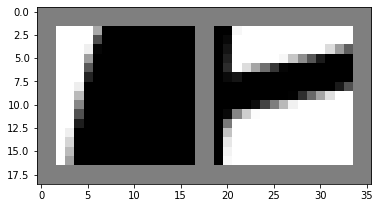


(true_class == predicted_class).item()=True
smallE 0.9999897480010986
smallE 0.9999897480010986


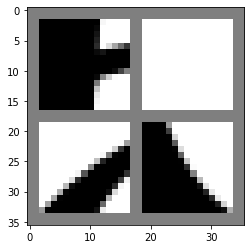


(true_class == predicted_class).item()=True
smallE 0.9999912977218628
smallE 0.9999912977218628


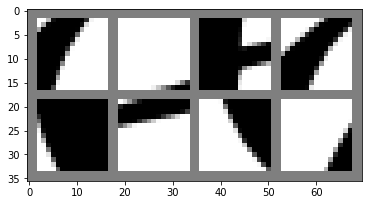


187 AJensonPro-Disp smallF


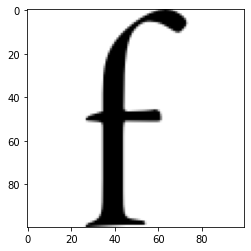


(true_class == predicted_class).item()=True
smallF 0.9853942394256592
smallF 0.9853942394256592


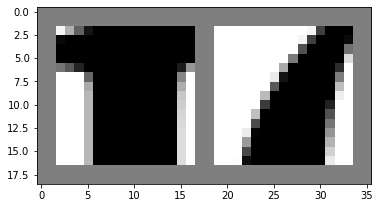


(true_class == predicted_class).item()=True
smallF 0.9996654987335205
smallF 0.9996654987335205


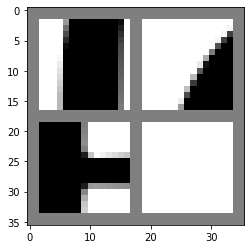


(true_class == predicted_class).item()=True
smallF 0.9999912977218628
smallF 0.9999912977218628


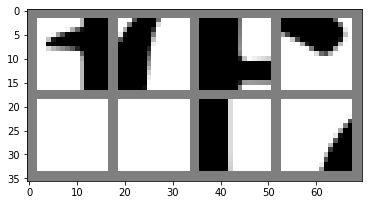


188 AJensonPro-Disp smallG


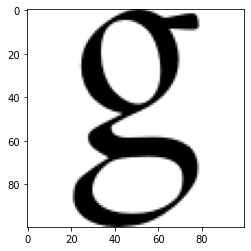


(true_class == predicted_class).item()=True
smallG 0.9999247789382935
smallG 0.9999247789382935


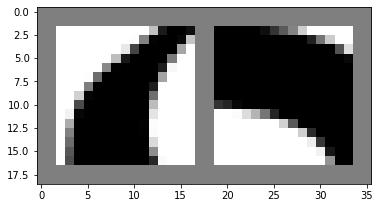


(true_class == predicted_class).item()=True
smallG 0.9999934434890747
smallG 0.9999934434890747


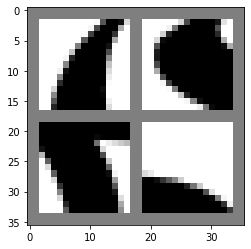


(true_class == predicted_class).item()=True
smallG 0.9999998807907104
smallG 0.9999998807907104


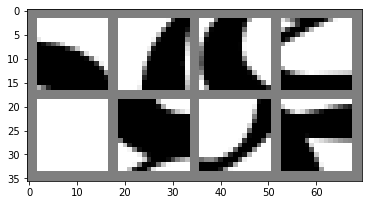


189 AJensonPro-Disp smallH


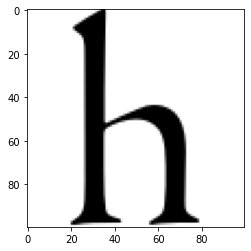


(true_class == predicted_class).item()=True
smallH 0.7360215187072754
smallH 0.7360215187072754


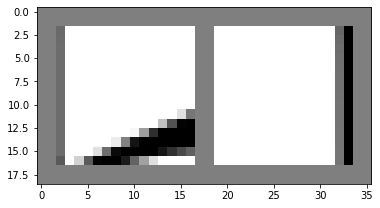


(true_class == predicted_class).item()=True
smallH 0.7814094424247742
smallH 0.7814094424247742


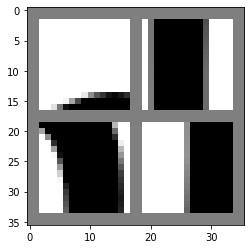


(true_class == predicted_class).item()=True
smallH 0.9509851932525635
smallH 0.9509851932525635


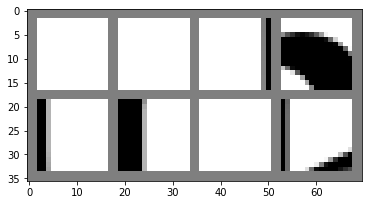


190 AJensonPro-Disp smallI


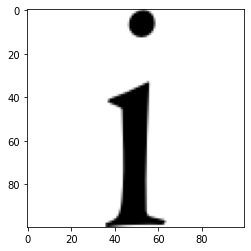


(true_class == predicted_class).item()=False
smallI 0.3566679358482361
smallJ 0.560178279876709


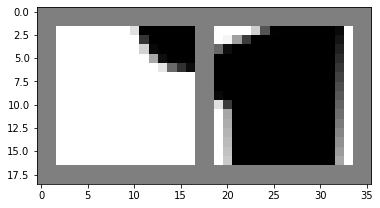


(true_class == predicted_class).item()=False
smallI 0.4256073534488678
smallJ 0.5428279638290405


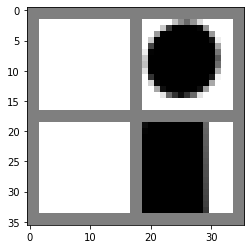


(true_class == predicted_class).item()=True
smallI 0.8698288202285767
smallI 0.8698288202285767


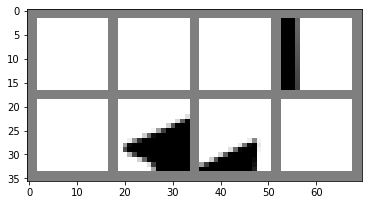


191 AJensonPro-Disp smallJ


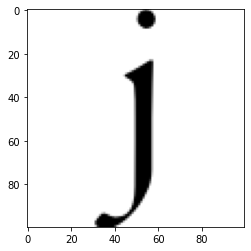


(true_class == predicted_class).item()=True
smallJ 0.9729120135307312
smallJ 0.9729120135307312


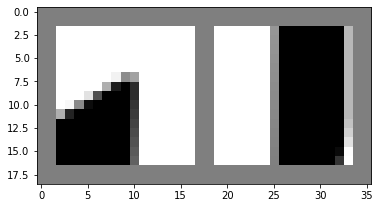


(true_class == predicted_class).item()=True
smallJ 0.9970741271972656
smallJ 0.9970741271972656


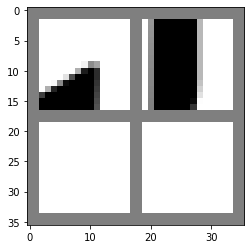


(true_class == predicted_class).item()=True
smallJ 0.9983465671539307
smallJ 0.9983465671539307


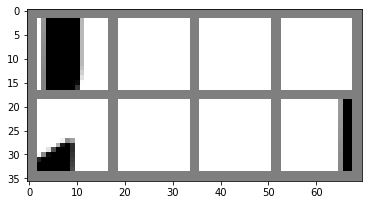


192 AJensonPro-Disp smallK


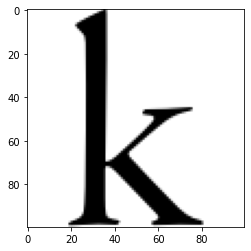


(true_class == predicted_class).item()=False
smallK 0.32702314853668213
capK 0.6728278398513794


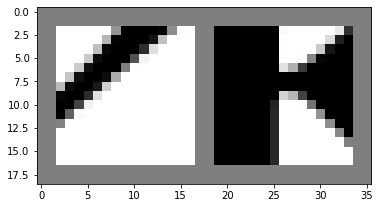


(true_class == predicted_class).item()=True
smallK 0.9999116659164429
smallK 0.9999116659164429


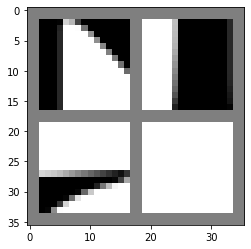


(true_class == predicted_class).item()=True
smallK 0.9999995231628418
smallK 0.9999995231628418


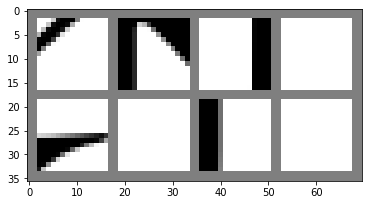


193 AJensonPro-Disp smallL


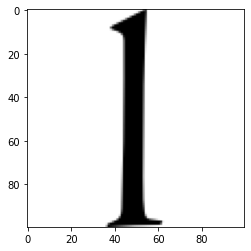


(true_class == predicted_class).item()=False
smallL 0.10500499606132507
smallD 0.2107786238193512


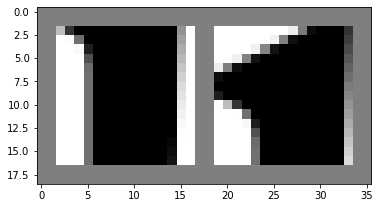


(true_class == predicted_class).item()=True
smallL 0.3123677670955658
smallL 0.3123677670955658


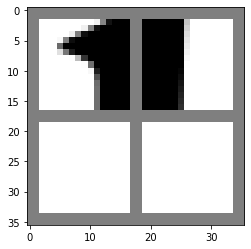


(true_class == predicted_class).item()=True
smallL 0.707038164138794
smallL 0.707038164138794


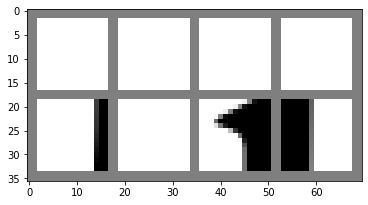


194 AJensonPro-Disp smallM


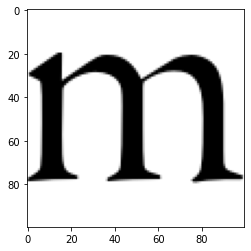


(true_class == predicted_class).item()=True
smallM 0.9326862096786499
smallM 0.9326862096786499


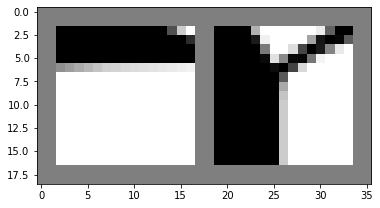


(true_class == predicted_class).item()=True
smallM 0.9994266033172607
smallM 0.9994266033172607


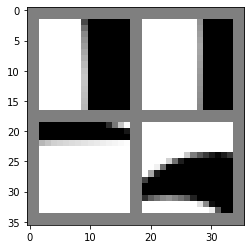


(true_class == predicted_class).item()=True
smallM 0.9999209642410278
smallM 0.9999209642410278


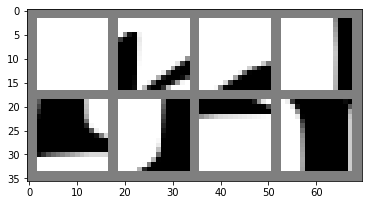


195 AJensonPro-Disp smallN


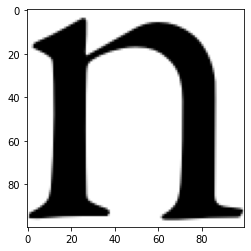


(true_class == predicted_class).item()=True
smallN 0.7605432271957397
smallN 0.7605432271957397


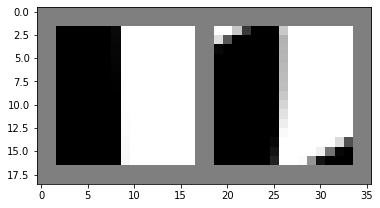


(true_class == predicted_class).item()=True
smallN 0.9973474740982056
smallN 0.9973474740982056


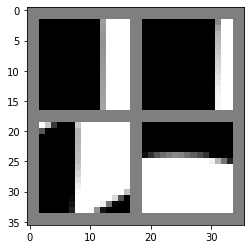


(true_class == predicted_class).item()=True
smallN 0.9400033950805664
smallN 0.9400033950805664


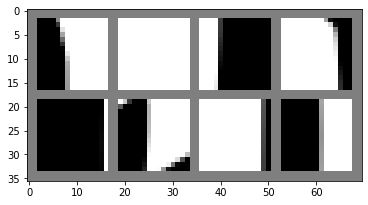


196 AJensonPro-Disp smallO


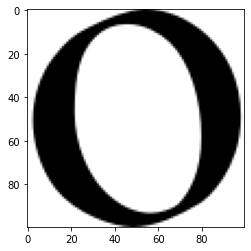


(true_class == predicted_class).item()=True
smallO 0.4025001525878906
smallO 0.4025001525878906


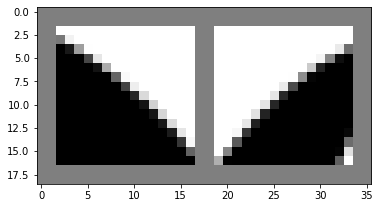


(true_class == predicted_class).item()=True
smallO 0.5866726636886597
smallO 0.5866726636886597


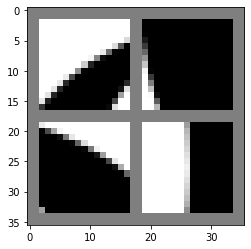


(true_class == predicted_class).item()=True
smallO 0.6379271745681763
smallO 0.6379271745681763


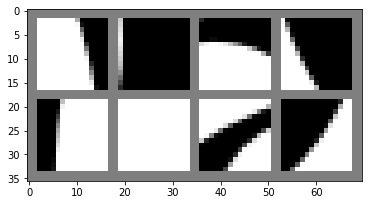


197 AJensonPro-Disp smallP


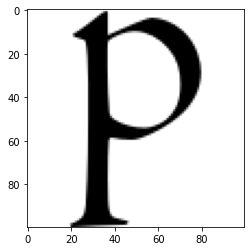


(true_class == predicted_class).item()=True
smallP 0.9463908672332764
smallP 0.9463908672332764


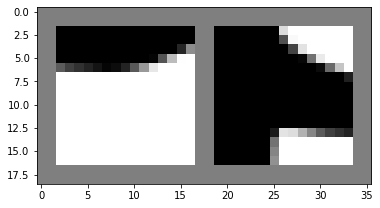


(true_class == predicted_class).item()=True
smallP 0.9688338041305542
smallP 0.9688338041305542


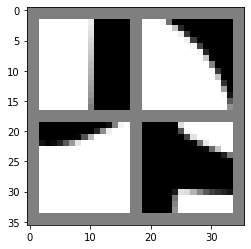


(true_class == predicted_class).item()=True
smallP 0.9986554384231567
smallP 0.9986554384231567


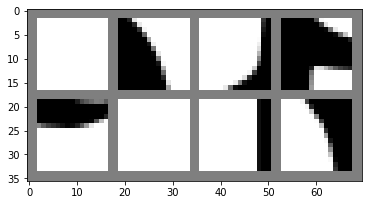


198 AJensonPro-Disp smallQ


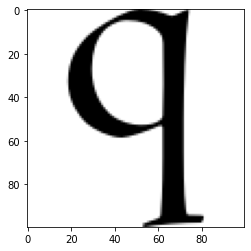


(true_class == predicted_class).item()=True
smallQ 0.8052686452865601
smallQ 0.8052686452865601


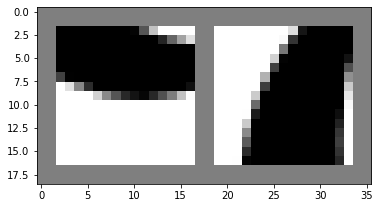


(true_class == predicted_class).item()=True
smallQ 0.9880678653717041
smallQ 0.9880678653717041


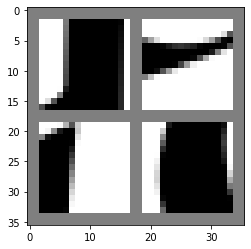


(true_class == predicted_class).item()=True
smallQ 0.9927608966827393
smallQ 0.9927608966827393


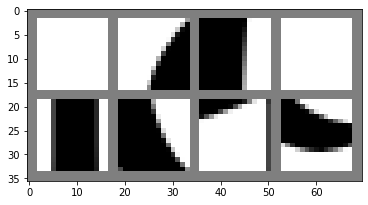


199 AJensonPro-Disp smallR


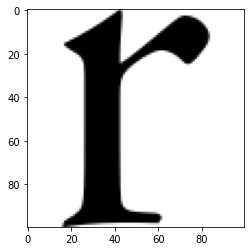


(true_class == predicted_class).item()=True
smallR 0.8143242597579956
smallR 0.8143242597579956


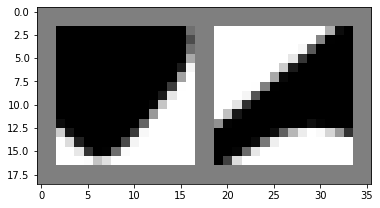


(true_class == predicted_class).item()=True
smallR 0.9875515103340149
smallR 0.9875515103340149


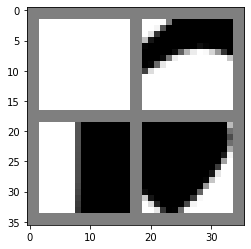


(true_class == predicted_class).item()=True
smallR 0.9967939257621765
smallR 0.9967939257621765


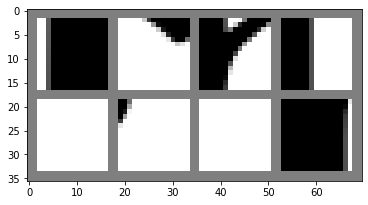


200 AJensonPro-Disp smallS


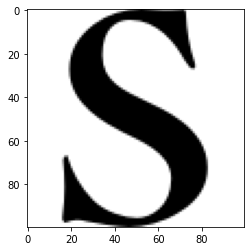


(true_class == predicted_class).item()=False
smallS 0.43449705839157104
capS 0.565240204334259


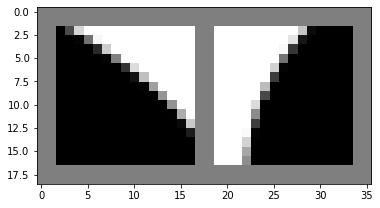


(true_class == predicted_class).item()=False
smallS 0.395480751991272
capS 0.6044818758964539


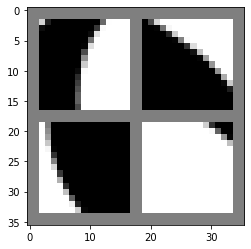


(true_class == predicted_class).item()=True
smallS 0.5852491855621338
smallS 0.5852491855621338


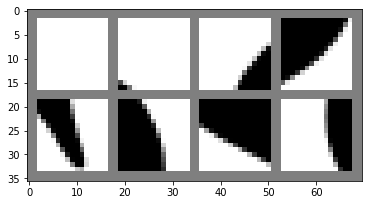


201 AJensonPro-Disp smallT


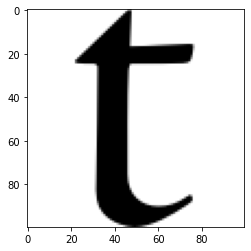


(true_class == predicted_class).item()=True
smallT 0.8736051917076111
smallT 0.8736051917076111


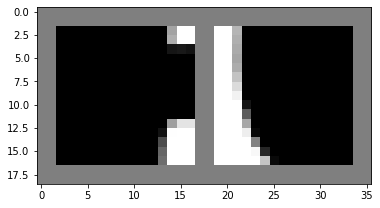


(true_class == predicted_class).item()=True
smallT 0.9992702603340149
smallT 0.9992702603340149


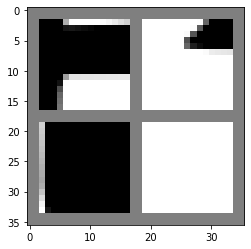


(true_class == predicted_class).item()=True
smallT 0.9998947381973267
smallT 0.9998947381973267


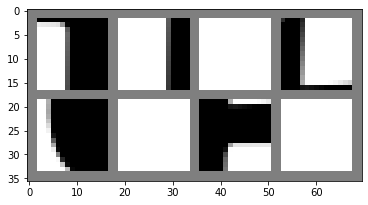


202 AJensonPro-Disp smallU


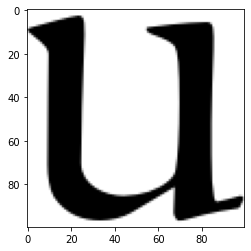


(true_class == predicted_class).item()=True
smallU 0.9875304698944092
smallU 0.9875304698944092


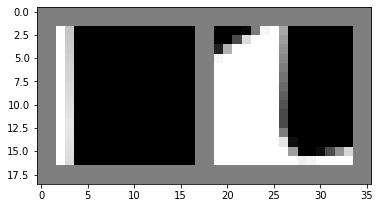


(true_class == predicted_class).item()=True
smallU 0.9995073080062866
smallU 0.9995073080062866


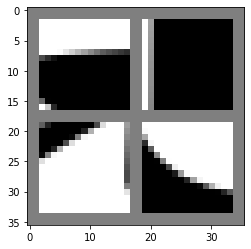


(true_class == predicted_class).item()=True
smallU 0.9997774958610535
smallU 0.9997774958610535


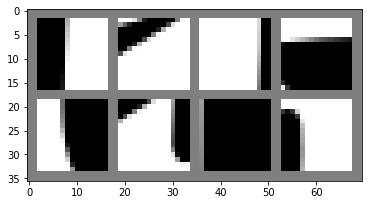


203 AJensonPro-Disp smallV


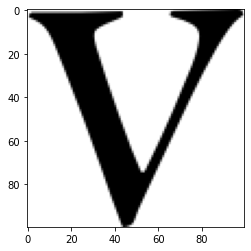


(true_class == predicted_class).item()=False
smallV 0.3222561776638031
capV 0.6065704226493835


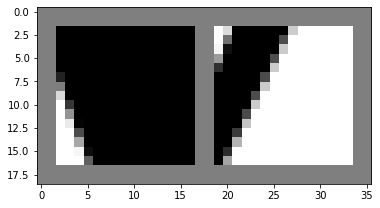


(true_class == predicted_class).item()=False
smallV 0.4262729585170746
capV 0.56220942735672


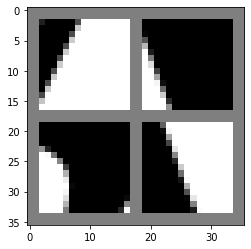


(true_class == predicted_class).item()=False
smallV 0.22882036864757538
capV 0.7704899907112122


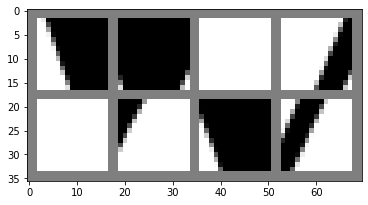


204 AJensonPro-Disp smallW


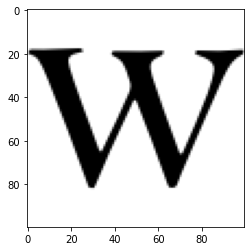


(true_class == predicted_class).item()=False
smallW 0.13676129281520844
capW 0.8607698082923889


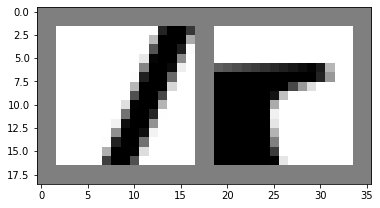


(true_class == predicted_class).item()=False
smallW 0.3631342649459839
capW 0.6366462111473083


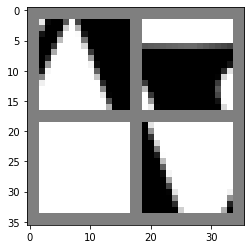


(true_class == predicted_class).item()=False
smallW 0.2996123433113098
capW 0.70026034116745


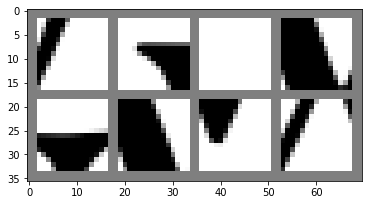


205 AJensonPro-Disp smallX


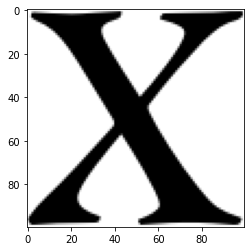


(true_class == predicted_class).item()=False
smallX 0.3890402317047119
capX 0.6109580397605896


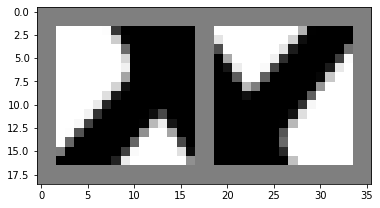


(true_class == predicted_class).item()=False
smallX 0.27053502202033997
capX 0.7293782234191895


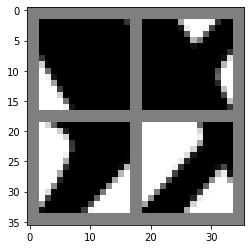


(true_class == predicted_class).item()=False
smallX 0.3783135414123535
capX 0.6216824650764465


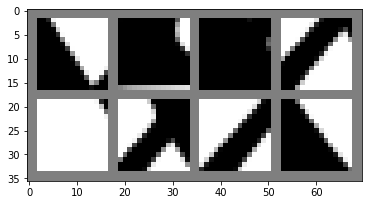


206 AJensonPro-Disp smallY


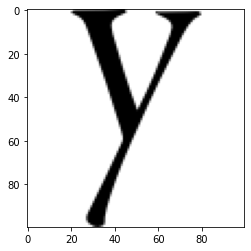


(true_class == predicted_class).item()=True
smallY 0.9929475784301758
smallY 0.9929475784301758


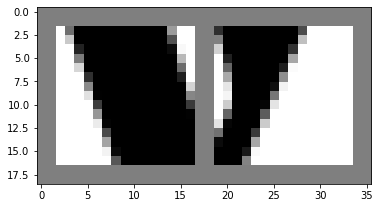


(true_class == predicted_class).item()=True
smallY 0.9991347193717957
smallY 0.9991347193717957


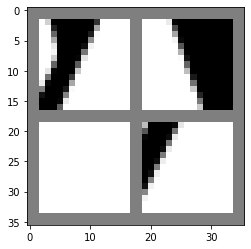


(true_class == predicted_class).item()=True
smallY 0.9999936819076538
smallY 0.9999936819076538


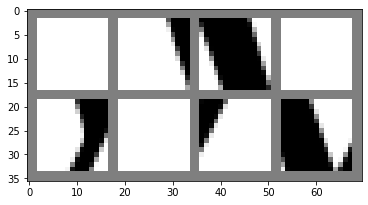


207 AJensonPro-Disp smallZ


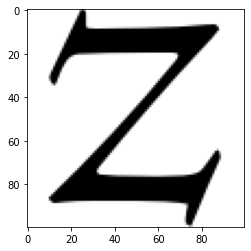


(true_class == predicted_class).item()=False
smallZ 0.3588332235813141
capZ 0.5851563215255737


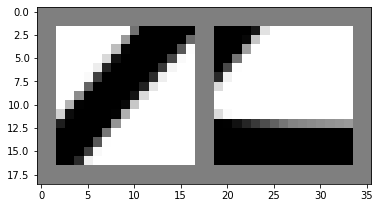


(true_class == predicted_class).item()=True
smallZ 0.9016116261482239
smallZ 0.9016116261482239


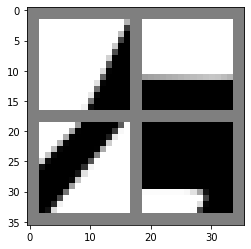


(true_class == predicted_class).item()=True
smallZ 0.5587916970252991
smallZ 0.5587916970252991


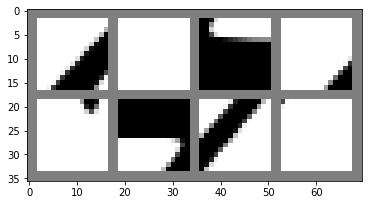

In [10]:
print(len(dataset) / 52)
with torch.no_grad():
    for i, (image, t) in zip(range(52 * 4), dataset):
        font = t['font']
        class_ = t['alphabet']
        print(i, dataset.unique_font[font], dataset.unique_alphabet[class_])
        plt.imshow(to_pil_image(image), 'gray')
        plt.show()
        print()
        x = image.cuda()[None].expand([2**16, -1, -1, -1])
        for patch_n, nrow in zip(*zip([2, 2], [4, 2], [8, 4])):
            patch = make_patch2d(x, config.hparams.patch_size, patch_n)
            y = model(patch)
            max_index = y[:, class_].argmax()

            true_class = class_
            true_prob = y[max_index].softmax(0)[class_].item()
            predicted_class = y[max_index].argmax(0)
            predicted_prob = y[max_index].softmax(0)[predicted_class].item()
            
            print(f'(true_class == predicted_class).item()={(true_class == predicted_class).item()}')
            print(dataset.unique_alphabet[true_class], true_prob)
            print(dataset.unique_alphabet[predicted_class], predicted_prob)
            plt.imshow(to_pil_image(make_grid(patch[max_index].cpu(), nrow=nrow, pad_value=0.5)))
            plt.show()
            print()